## VEGETATION INDEX AVERAGE PLOTTING

This is only for exploring the values of the different vegetation indexes overtime.

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image
import glob
import os

In [3]:
BASE_PATH = '/home/miebakso/Desktop/PROJECT/Good_Crop_Bad_Crop'

In [4]:
# x 7680,  y 1024 
def get_tile_path(x, y, band, date):
    path = f'{BASE_PATH}/model/satelite_data/phase-01/data/sentinel-2a-tile-{x}x-{y}y/timeseries/{x}-{y}-{band}-{date}.png'
    return path

In [5]:
# get the dates
paths = glob.glob(get_tile_path('7680','10240','B01','*'))
dates = []
for path in paths:
    x = len(path)
    dates.append(path[x-14:x-4])
    
# sort date  
dates.sort(key= lambda x: int(''.join(x.split('-'))))

dates[0:5]

['2016-12-22', '2017-01-01', '2017-01-11', '2017-02-10', '2017-02-20']

In [6]:
# BAND 2 BLUE
# BAND 3 GREEN
# BAND 4 RED
# BAND 5 VEGETATION RED EDGE
# BAND 6 VEGETATION RED EDGE
# BAND 7 VEGETATION RED EDGE
# BAND 8 NIR
# BAND 8A VEGETATION RED EDGE
# BAND 9 WATER VAPOUR
# BAND 10 SWIR CIRRUS
# BAND 11 SWIR
# BAND 12 SWIR
BLUE = 'B02'
GREEN = 'B03'
RED = 'B04'
NIR = 'B08'

In [7]:
# get the picture
def get_image(x, y, band, date):
    path = get_tile_path(x,y,band,date)
    im = image.imread(path)
    return im

In [8]:
temp = get_image('7680','10240','B02','2016-12-22')

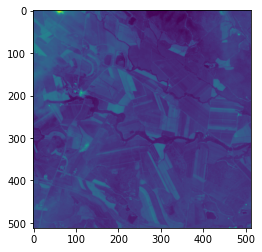

In [9]:
plt.imshow(temp)

In [10]:
temp

array([[0.04678416, 0.04773022, 0.0449836 , ..., 0.03936828, 0.03952087,
        0.04028382],
       [0.04797437, 0.04754711, 0.04544137, ..., 0.03894103, 0.0395819 ,
        0.03887999],
       [0.04776074, 0.04647898, 0.04577707, ..., 0.03942931, 0.03936828,
        0.03869688],
       ...,
       [0.04156557, 0.04129091, 0.04104677, ..., 0.04150454, 0.0421149 ,
        0.04171817],
       [0.04116884, 0.0411078 , 0.04034485, ..., 0.04174868, 0.04095522,
        0.04028382],
       [0.04113832, 0.04055848, 0.03982605, ..., 0.04107729, 0.04046693,
        0.04031434]], dtype=float32)

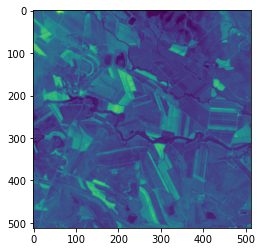

In [11]:
temp = get_image('7680','10240','B04','2016-12-22')
plt.imshow(temp)

In [12]:
def calulcate_NVDI(NIR, RED):
    return (NIR - RED) / (NIR + RED)

In [13]:
red = get_image('7680','10240',RED,'2016-12-22')
nir = get_image('7680','10240',NIR,'2016-12-22')
temp = calulcate_NVDI(nir,red)

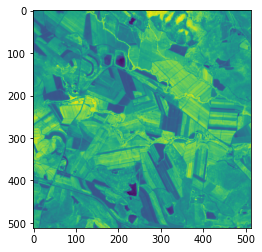

In [14]:
plt.imshow(temp)

In [15]:
def calculate_ENVDI(NIR, GREEN, BLUE):
    return ((NIR+GREEN) - (2*BLUE)) / ((NIR+GREEN) + (2*BLUE)) 

-0.2173333
0.4710091


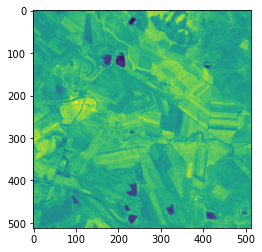

In [16]:
nir = get_image('7680','10240',NIR,'2016-12-22')
green = get_image('7680','10240',GREEN,'2016-12-22')
blue = get_image('7680','10240',BLUE,'2016-12-22')
temp = calculate_ENVDI(nir,green, blue)
print(np.min(temp))
print(np.max(temp))

plt.imshow(temp)

In [17]:
def calulcate_GNDVI(NIR, GREEN):
    
    return (NIR - GREEN) / (NIR + GREEN)

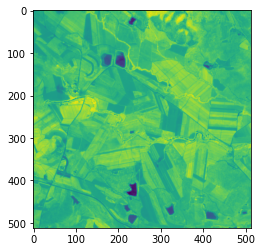

In [18]:
nir = get_image('7680','10240',NIR,'2016-12-22')
green = get_image('7680','10240',GREEN,'2016-12-22')
temp = calulcate_GNDVI(nir,green)
plt.imshow(temp)

In [19]:
def calculate_SIPI(NIR, RED, BLUE):
    division = NIR - RED
    for i in range(0, len(division)):
        for j in range(0, len(division[i])):
            if division[i,j] == 0:
                division[i,j] = np.min(division[i])
    print(NIR -BLUE)
    print(division)
    result = ((NIR - BLUE) / (division))
    return result

[[0.02792401 0.02572671 0.02526894 ... 0.0446479  0.04287785 0.0421149 ]
 [0.02764935 0.02618448 0.02523842 ... 0.04367132 0.04266422 0.04531929]
 [0.02929732 0.02804609 0.02490272 ... 0.04428168 0.04440376 0.04696726]
 ...
 [0.05804532 0.05490196 0.05557336 ... 0.04834058 0.05535973 0.06182956]
 [0.05438315 0.05160601 0.05172809 ... 0.06109713 0.06671245 0.06909285]
 [0.04968337 0.04806592 0.04806592 ... 0.06903182 0.06970321 0.07037461]]
[[0.03253223 0.03189135 0.03265431 ... 0.04953079 0.04705882 0.0471809 ]
 [0.03210498 0.03277638 0.03244068 ... 0.04760815 0.04730297 0.05017166]
 [0.03360037 0.03472954 0.03183032 ... 0.04946975 0.04953079 0.05163653]
 ...
 [0.06738384 0.06433204 0.06662089 ... 0.05337606 0.06131075 0.06860456]
 [0.06283665 0.0612192  0.06182956 ... 0.06762799 0.07486077 0.07684444]
 [0.05804532 0.05697719 0.05700771 ... 0.07736325 0.07769895 0.07843138]]
0.02603189
0.017578393
0.028290227
-0.26714814

0.022919051
0.016784925
0.028198672
-0.8606965

0.027222095
0.01

<ipython-input-19-9823828ab090>:9: RuntimeWarning: divide by zero encountered in true_divide
  result = ((NIR - BLUE) / (division))


0.031586174
0.018280309
0.03341726
-0.13761483

0.033630885
0.018768597
0.03369192
-0.0041067135

0.03414969
0.020874342
0.035004195
-0.064367674

0.034607463
0.01904326
0.03463798
-0.0019607542

0.030182345
0.017914092
0.03338674
-0.26119417

0.03106737
0.018127719
0.033142596
-0.16037735

0.030945297
0.01983673
0.034119174
-0.2857143

0.030243382
0.019134814
0.034699015
-0.40109882

0.030243382
0.018310826
0.034241244
-0.33503824

0.028656444
0.017975127
0.033600368
-0.4628572

0.028961623
0.01763943
0.03350881
-0.40161726

0.032196537
0.018036164
0.03341726
-0.0862069

0.025940338
0.0180972
0.033783473
-0.9999995

0.02511635
0.017700465
0.03323415
-1.09465

0.026123445
0.016906997
0.033173114
-0.7649008

0.02697795
0.016754406
0.033295184
-0.61791027

0.03198291
0.017822538
0.033661403
-0.11853451

0.03817807
0.025543602
0.038941026
-0.060386736

0.03790341
0.02511635
0.0383917
-0.038186163

0.035553522
0.02496376
0.03744564
-0.17867409

0.03604181
0.02542153
0.037354086
-0.12356306

0.01855497
0.032715343
-6.138463

0.020355536
0.018493935
0.03183032
-6.163935

0.02090486
0.018860152
0.03183032
-5.343287

0.021179523
0.01950103
0.03234913
-6.6545444

0.02136263
0.020294499
0.032593273
-10.514283

0.021759365
0.020569162
0.03274586
-9.23078

0.022369726
0.021423668
0.03305104
-11.2903385

0.022400245
0.023041124
0.033966582
18.04763

0.023620967
0.0243534
0.03524834
15.874997

0.024719616
0.02542153
0.036560617
16.869598

0.025818266
0.026642252
0.037262533
13.888913

0.02560464
0.025818266
0.036682688
51.857025

0.02432288
0.02340734
0.035461966
-12.166678

0.023376822
0.022339208
0.033844512
-10.088226

0.022705425
0.022034029
0.03308156
-15.45457

0.02154574
0.020569162
0.03186084
-10.562501

0.020477608
0.018371863
0.030090792
-4.5652184

0.021118486
0.017914092
0.028534371
-2.3142862

0.032104984
0.022735942
0.035858702
-0.40065122

0.030395972
0.02246128
0.035980772
-0.703846

0.029449912
0.021667812
0.036011294
-0.8431377

0.029266804
0.02136263
0.035919737


0.088502325
0.08242924
0.07565423
2.1155787

0.03216602
0.019592585
0.032532234
-0.029126065

0.0317998
0.019287404
0.032806896
-0.08048777

0.032501716
0.01919585
0.03308156
-0.043578155

0.034027617
0.021820402
0.03448539
-0.037500042

0.0317998
0.020233463
0.03356985
-0.15303457

0.030853743
0.019256886
0.032837417
-0.17105275

0.031250477
0.018951705
0.03262379
-0.11166264

0.032013427
0.01919585
0.032806896
-0.061904687

0.0321355
0.019775692
0.03256275
-0.034567673

0.03225757
0.021393148
0.03427176
-0.18539317

0.03088426
0.020141909
0.033447776
-0.23863636

0.03106737
0.01919585
0.033173114
-0.17737783

0.031128405
0.018860152
0.032593273
-0.119403146

0.031280994
0.018768597
0.033020522
-0.13902436

0.03216602
0.01934844
0.03262379
-0.03571432

0.03228809
0.019897765
0.032806896
-0.041871887

0.03152514
0.019867247
0.032990005
-0.12565446

0.030792706
0.01904326
0.032501716
-0.14545456

0.030609598
0.019073777
0.03262379
-0.17460324

0.035034716
0.027985046
0.037842374
-0.3982

0.026153963
0.036713205
-0.9999993

0.02822919
0.025726711
0.036682688
-3.3780499

0.027679866
0.025909819
0.037628748
-5.620686

0.026825361
0.026825361
0.0383917
-inf

0.02996872
0.028381782
0.040802624
-6.8269224

0.03311208
0.031128405
0.042786296
-4.8769183

0.035156786
0.033478294
0.044373237
-5.490908

0.03576715
0.033844512
0.04528878
-4.9523797

0.03216602
0.02932784
0.041565575
-3.3118258

0.029297322
0.027222095
0.037811857
-4.1029415

0.033630885
0.029480431
0.037506677
-0.93382365

0.038971543
0.029816128
0.03930724
-0.036666505

0.035828184
0.029633021
0.040192265
-0.7044335

0.03256275
0.030853743
0.041596092
-5.28572

0.032318607
0.030151827
0.04055848
-3.8028197

0.03311208
0.028778516
0.039734494
-1.5281686

0.0321355
0.028442817
0.037537195
-1.4628092

0.036743727
0.026916916
0.036774244
-0.0031055424

0.03607233
0.026398107
0.036499582
-0.04416413

0.035828184
0.025696194
0.03637751
-0.054216776

0.036102846
0.025665674
0.036499582
-0.038011827

0.07345693
0.0625314


0.026276035
0.022583352
0.034241244
-2.1570249

0.025635157
0.02169833
0.033020522
-1.8759689

0.026123445
0.021393148
0.03274586
-1.3999997

0.026092928
0.021271076
0.032959487
-1.4240502

0.026337072
0.021820402
0.033325706
-1.5472976

0.027222095
0.02185092
0.033295184
-1.1306815

0.032104984
0.021881437
0.0321355
-0.0029850283

0.026672771
0.021087969
0.03228809
-1.0054641

0.027557794
0.022095064
0.033264667
-1.0446924

0.028595407
0.022369726
0.03353933
-0.7941175

0.027283132
0.020965897
0.032715343
-0.85990316

0.028595407
0.020813307
0.03256275
-0.5098039

0.037811857
0.029053178
0.039215688
-0.16027884

0.035461966
0.029388877
0.039063096
-0.5929651

0.033600368
0.029205767
0.03823911
-1.0555551

0.0321355
0.027710384
0.038300145
-1.3931028

0.0302739
0.026886396
0.037079424
-2.009009

0.02978561
0.026337072
0.036713205
-2.0088494

0.028778516
0.025360495
0.03607233
-2.1339288

0.027496757
0.024261845
0.035034716
-2.3301902

0.026398107
0.023285268
0.034210727
-2.5098047

0.

0.028534371
0.021087969
0.03198291
-0.46311468

0.027496757
0.021240558
0.03186084
-0.6975614

0.026611734
0.021179523
0.03186084
-0.9662926

0.025757229
0.021057451
0.0317998
-1.2857144

0.02603189
0.02075227
0.031555656
-1.0462428

0.025391012
0.020569162
0.031647213
-1.2974689

0.02606241
0.020630198
0.031555656
-1.0112355

0.026276035
0.02075227
0.032318607
-1.0939226

0.026153963
0.020965897
0.0321355
-1.1529417

0.02716106
0.020935379
0.032196537
-0.80882347

0.026489662
0.020843824
0.032501716
-1.0648649

0.026001373
0.020691235
0.03183032
-1.0977011

0.026123445
0.020813307
0.031738766
-1.0574714

0.026489662
0.020935379
0.032074463
-1.0054945

0.027008468
0.021240558
0.032043945
-0.8730159

0.027344167
0.022034029
0.03198291
-0.87356335

0.027283132
0.021759365
0.031586174
-0.77900493

0.028900588
0.021728847
0.031708248
-0.39148933

0.028381782
0.021972992
0.032043945
-0.5714282

0.029602503
0.020721752
0.03256275
-0.33333305

0.028198672
0.020294499
0.032837417
-0.5868728

0

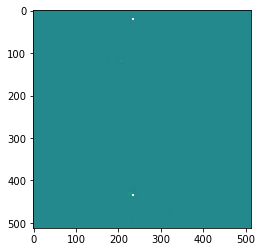

In [20]:
nir = get_image('7680','10240',NIR,'2016-12-22')
red = get_image('7680','10240',RED,'2016-12-22')
blue = get_image('7680','10240',BLUE,'2016-12-22')
temp = calculate_SIPI(nir,red, blue)
plt.imshow(temp)
for i in range(0, len(temp)):
        for j in range(0, len(temp[i])):
            if temp[i,j] <0 or temp[i,j] >2:
                print(nir[i,j])
                print(red[i,j])
                print(blue[i,j])
                print(temp[i,j])
                print()
                


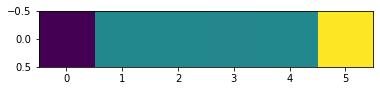

In [21]:
plt.imshow([[-409,-2,-3,-4,-1, 463]])

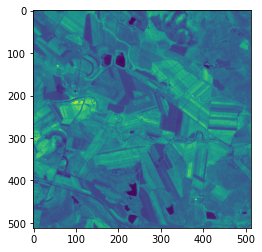

In [22]:
plt.imshow(nir-red)

In [23]:
temp  = Image.open(get_tile_path('7680','10240','B04','2016-12-22'))
pixels = np.array(temp.getdata()).reshape(512,512)
pixels

array([[2764, 2724, 2464, ..., 2260, 2316, 2308],
       [2852, 2684, 2506, ..., 2294, 2290, 2230],
       [2848, 2608, 2546, ..., 2244, 2244, 2230],
       ...,
       [2112, 2088, 1966, ..., 2390, 2370, 2290],
       [2144, 2064, 1982, ..., 2308, 2150, 2132],
       [2148, 2074, 2024, ..., 2146, 2128, 2114]])

In [24]:
def get_wavelength(x, y, band, date):
    im = Image.open(get_tile_path(x,y,band,date))
    arr = np.array(im.getdata()).reshape(512,512)
    return arr

In [25]:
red = get_wavelength('7680','10240',RED,'2016-12-22')
nir = get_wavelength('7680','10240',NIR,'2016-12-22')
temp = calulcate_NVDI(nir,red)

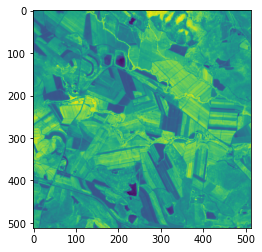

In [26]:
plt.imshow(temp)

In [27]:
mask_path = '/home/miebakso/Desktop/PROJECT/Good_Crop_Bad_Crop/model/satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/masks/sugarcane-region-mask.png'
def get_mask():
    im = Image.open(mask_path)
    pixels = im.load()
    return pixels

In [28]:
mask = get_mask()
mask[0,0]


(0, 0, 0, 255)

In [29]:
# method to get the average of the tile divided by n * n filtered by mask
def get_average(image1, mask, n):
    results = []
    length = int(512/n)
    for i in range(0,n):
        for j in range(0,n):
            count = 0;
            result = 0;
            for x in range(0,length):
                for y in range(0,length):
                    x_index = (i*length) + x
                    y_index = (j* length) + y
                    if mask[x_index,y_index] == (0, 0, 0, 255):
                        pixel = image1[x_index,y_index]
                        result += pixel
                        count +=1
            if count == 0:
                results.append(0)
            else:
                results.append(result/count)
    return np.array(results)
        

In [30]:
# testing
red = get_wavelength('7680','10240',RED,'2016-12-22')
nir = get_wavelength('7680','10240',NIR,'2016-12-22')
temp = calulcate_NVDI(nir,red)
get_average(temp,get_mask(),4)

array([0.36023773, 0.38354102, 0.48695122, 0.43254447, 0.41975651,
       0.38064966, 0.47832251, 0.43727836, 0.40535662, 0.48521604,
       0.43111619, 0.46870213, 0.3685879 , 0.34769142, 0.35680675,
       0.42956313])

In [31]:
X = '7680'
Y = '10240'
n = 8
IS_IN_MASK = (0, 0, 0, 255)
nvdis = []
envdis = []
gnvdis = []
for date in dates:
    red = get_wavelength(X,Y,RED,date)
    blue = get_wavelength(X,Y,BLUE,date)
    green = get_wavelength(X,Y,GREEN,date)
    nir = get_wavelength(X,Y,NIR,date)
    
    nvdi = calulcate_NVDI(nir, red)
    envdi = calculate_ENVDI(nir, green, blue)
    gnvdi = calulcate_GNDVI(nir, green)
    
    mask = get_mask()
    result = get_average(nvdi,mask,n)
    nvdis.append(result)
    
    result = get_average(envdi,mask,n)
    envdis.append(result)
    
    result = get_average(gnvdi,mask,n)
    gnvdis.append(result)
    
    

In [32]:
nvdis

[array([0.31803784, 0.41575056, 0.41322971, 0.37498693, 0.50661155,
        0.51945094, 0.45433347, 0.3729538 , 0.35970063, 0.35749184,
        0.32235627, 0.40395877, 0.49638909, 0.42615685, 0.45573519,
        0.42740245, 0.3886236 , 0.42670458, 0.35338799, 0.31933893,
        0.46732724, 0.5754429 , 0.43527941, 0.42425449, 0.31136268,
        0.53572926, 0.4706619 , 0.36885462, 0.4212065 , 0.45545849,
        0.51005308, 0.40131019, 0.48410642, 0.37645966, 0.47222726,
        0.51360488, 0.44269266, 0.43106895, 0.51064938, 0.42648535,
        0.        , 0.41440944, 0.47498588, 0.47873239, 0.38009274,
        0.48387734, 0.47775522, 0.44355689, 0.41590486, 0.37215798,
        0.3663771 , 0.33702562, 0.35669473, 0.40339005, 0.43910519,
        0.38239141, 0.33742702, 0.40094067, 0.41405035, 0.33902784,
        0.31386809, 0.37086917, 0.41151969, 0.44422159]),
 array([0.43937056, 0.58480503, 0.53811257, 0.45062187, 0.34729333,
        0.55316182, 0.49981906, 0.35007051, 0.54249865, 0.

In [33]:
xtick_loc = [i for i in range(0, len(dates))]

def plot_field_average(results, x):
    
    
    for i in range(0,len(results[0])):
        plt.figure(figsize=(12,4), dpi=100)
        result = []
        for tile in results:
            avg = tile[i]
            result.append(avg)
        plt.bar(dates, result, label = str(i))
        plt.xticks(rotation=90)
        plt.legend([str(i)])
        plt.title('Average Sub-tile Value')
        plt.grid(axis='y')
        plt.xlabel('Dates')
        plt.ylabel('VALUE')
        plt.show()
    

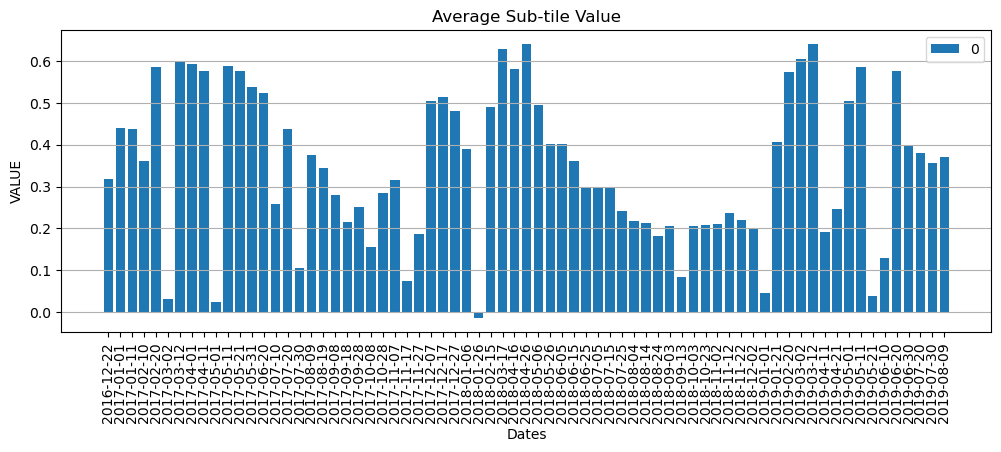

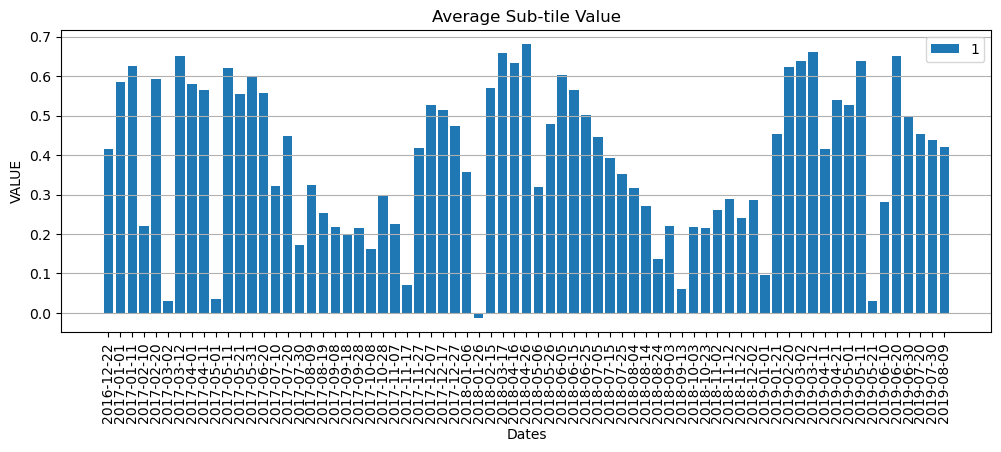

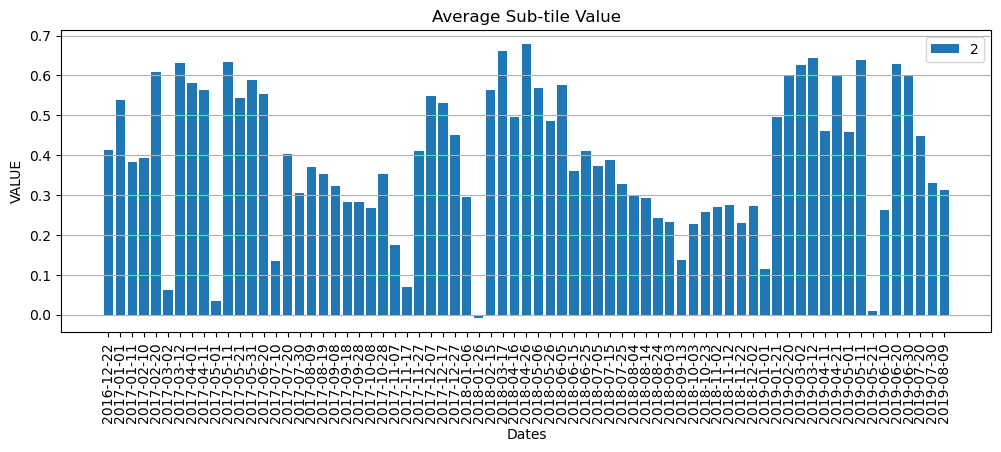

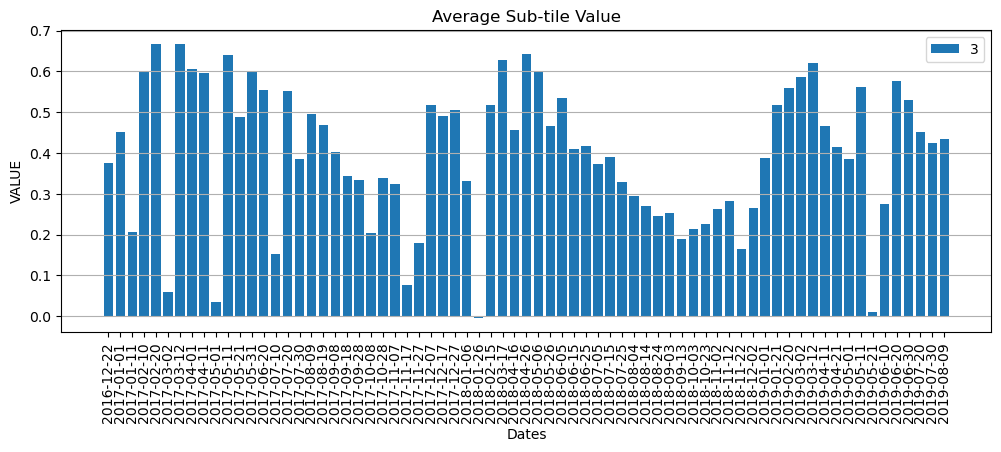

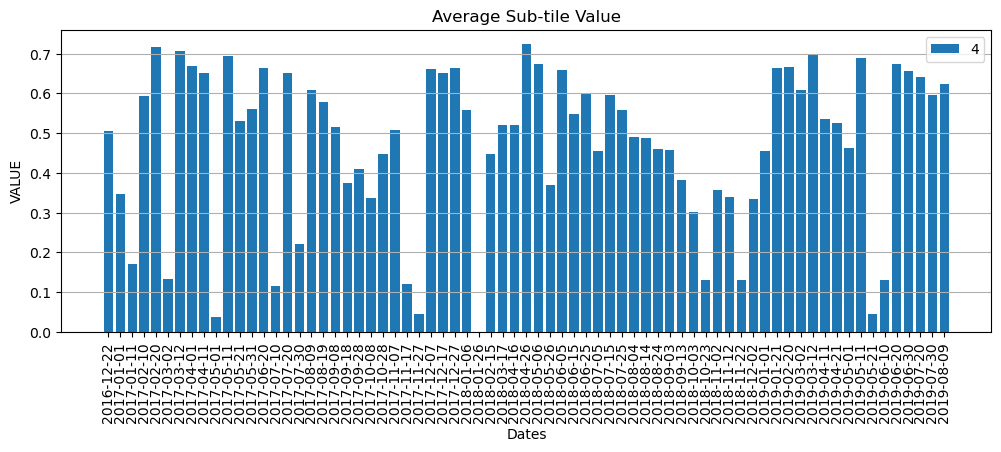

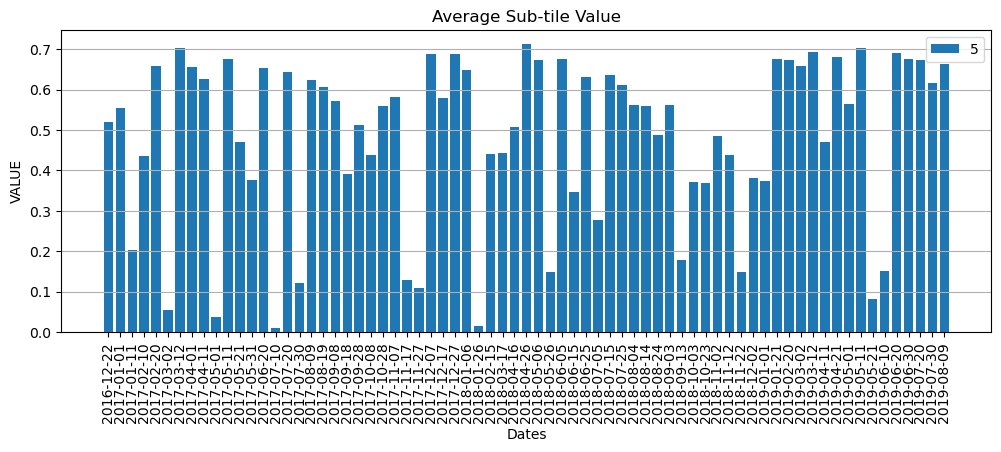

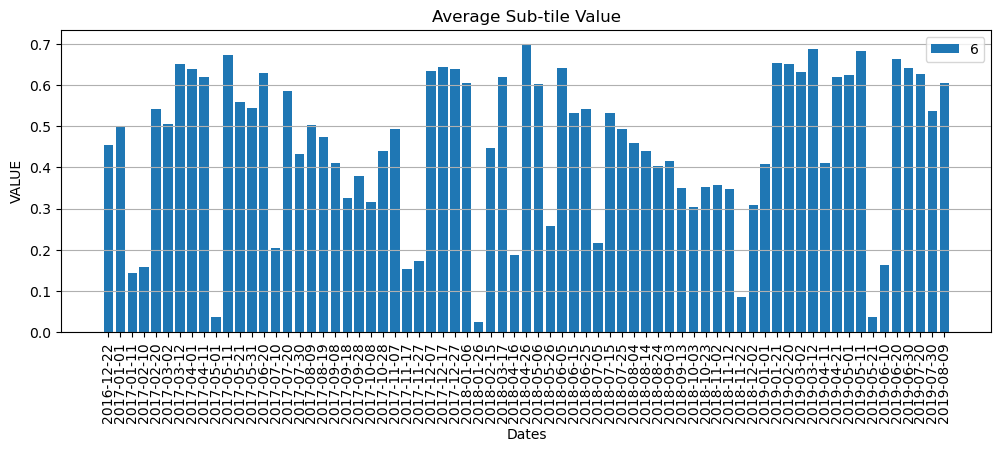

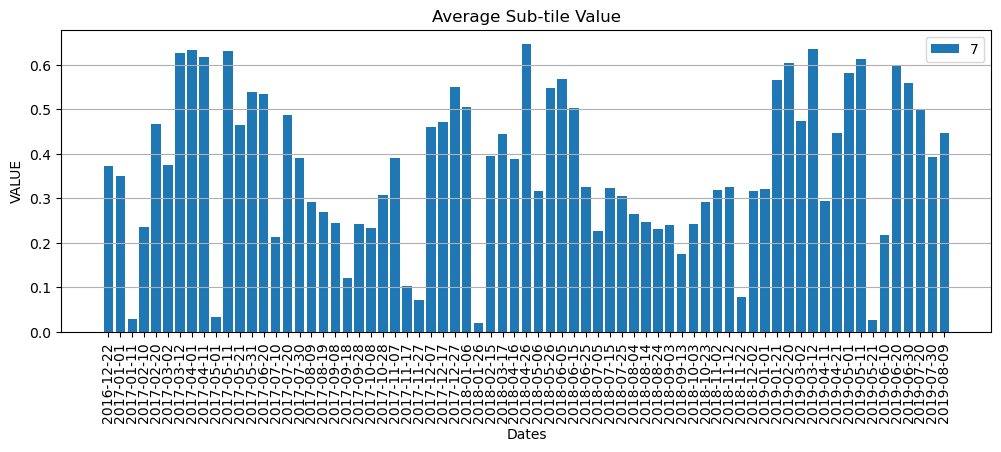

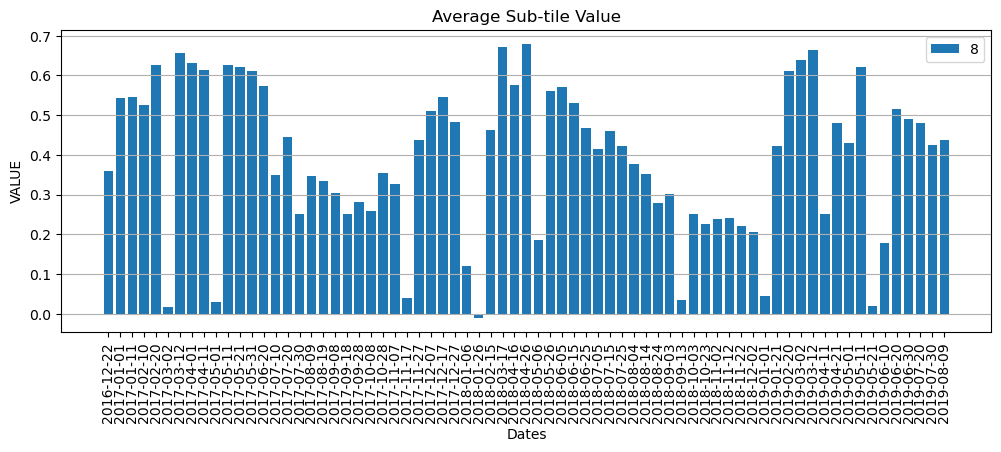

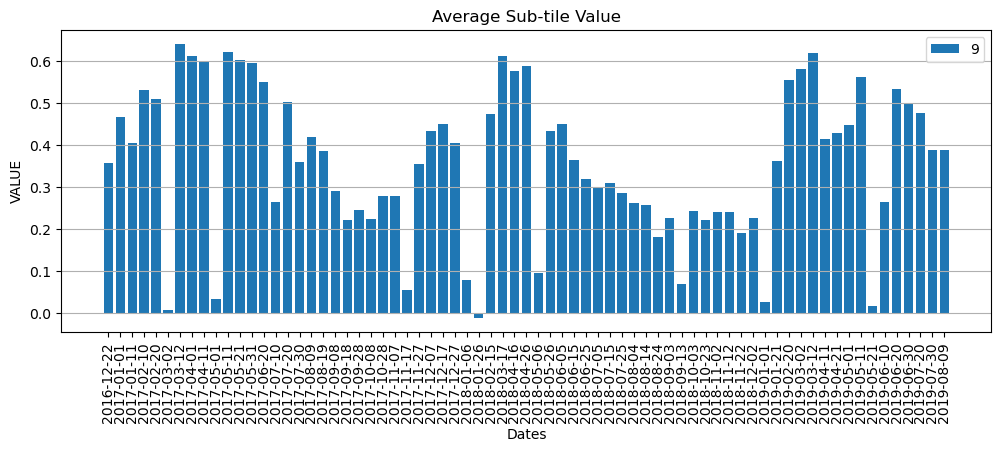

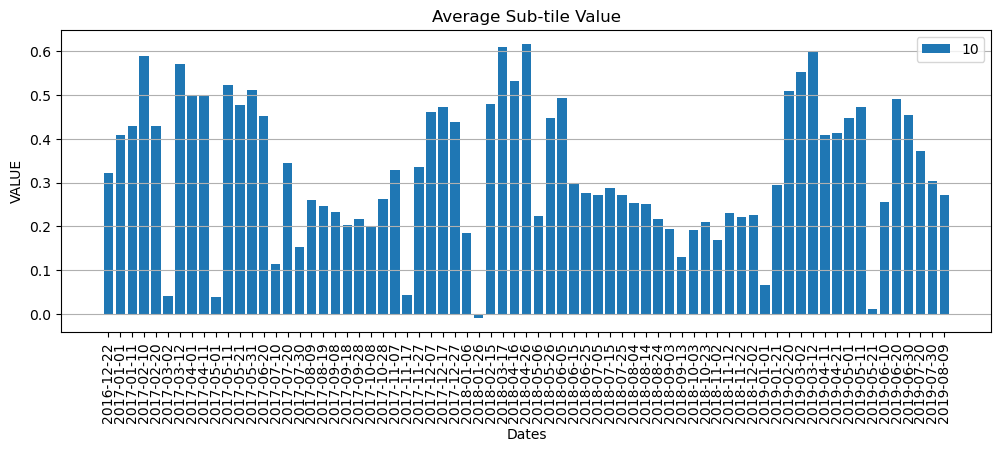

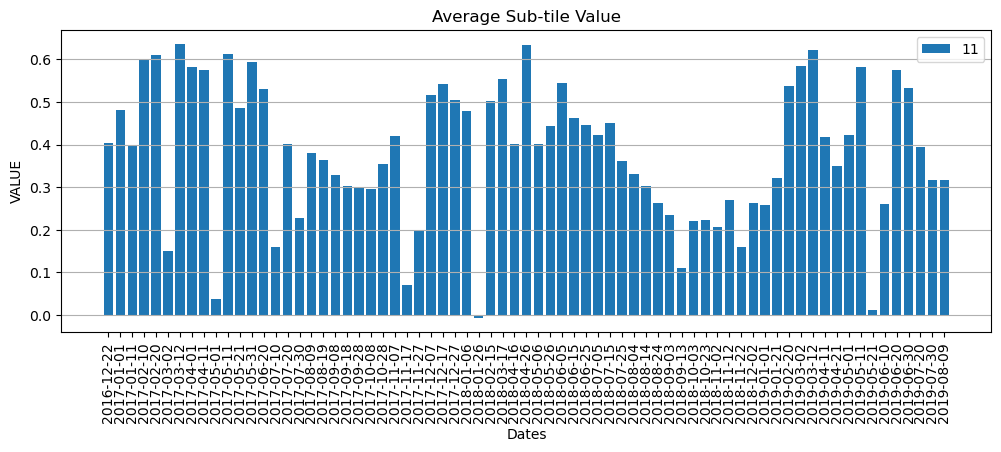

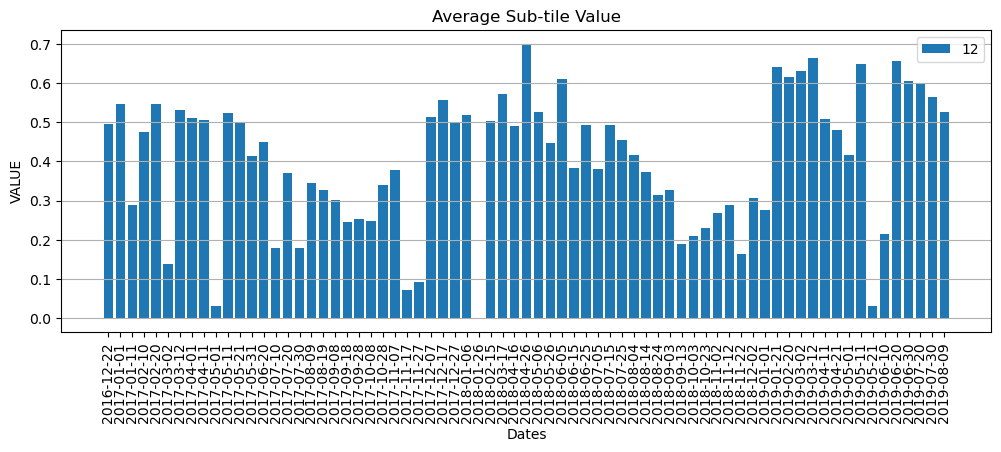

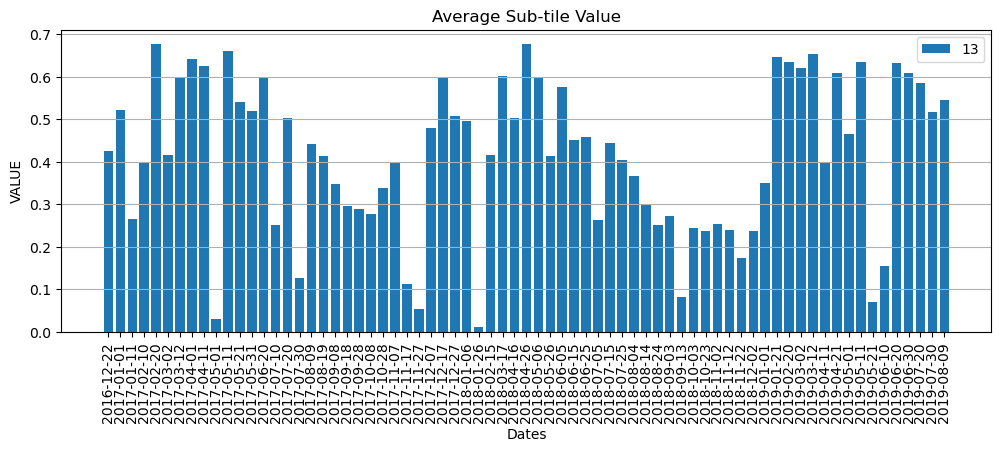

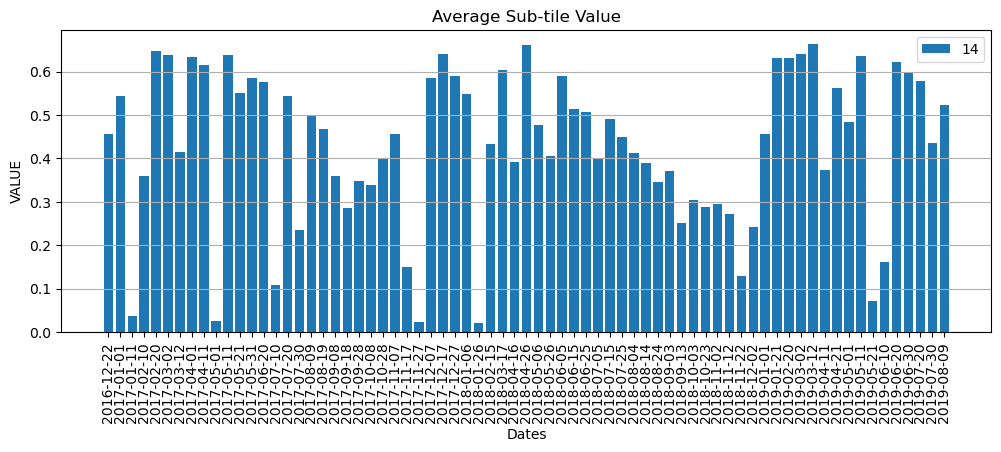

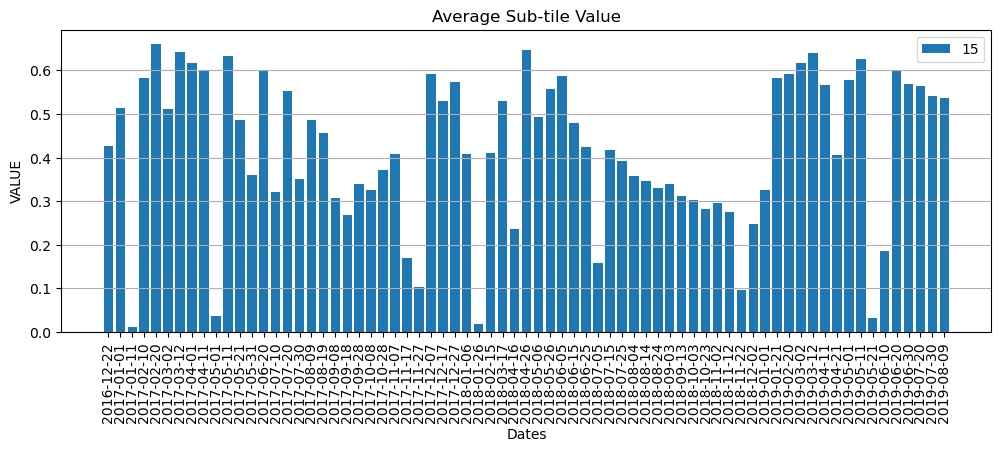

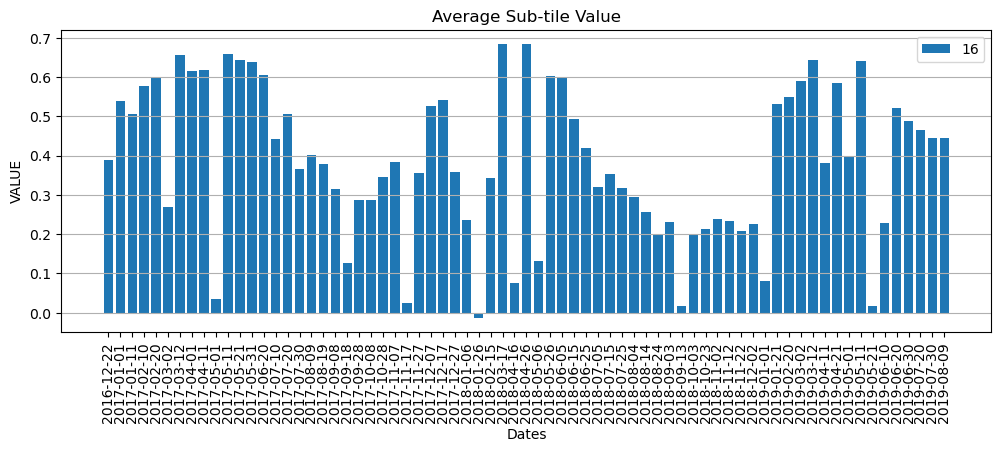

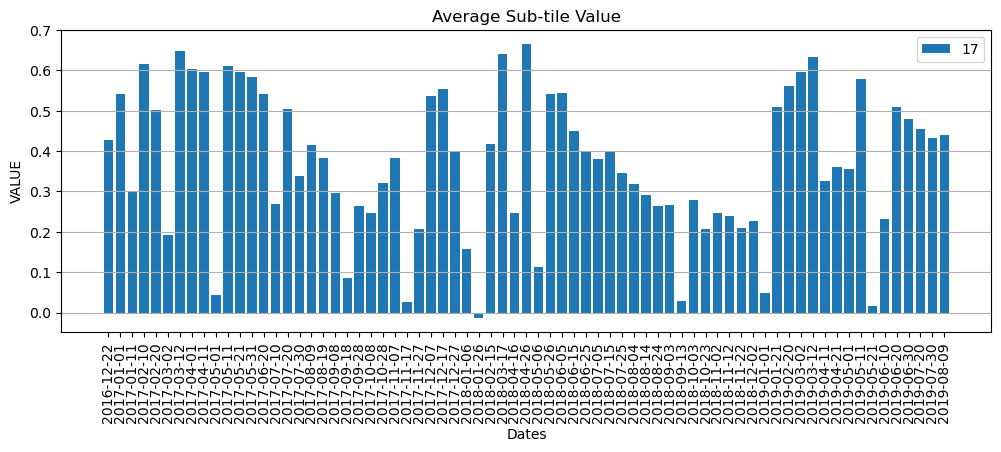

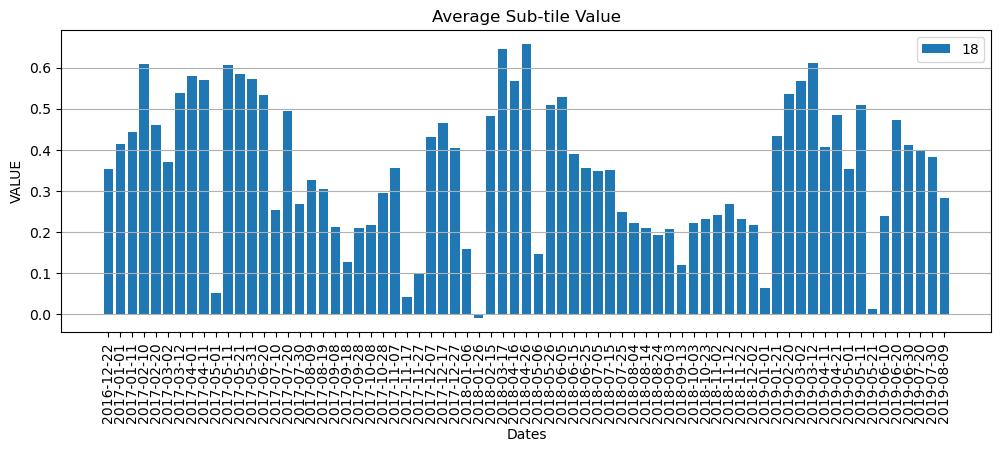

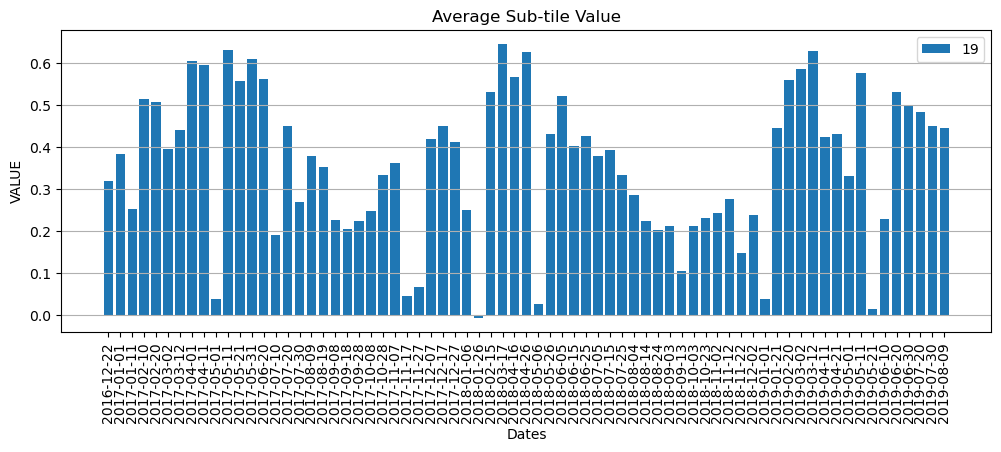

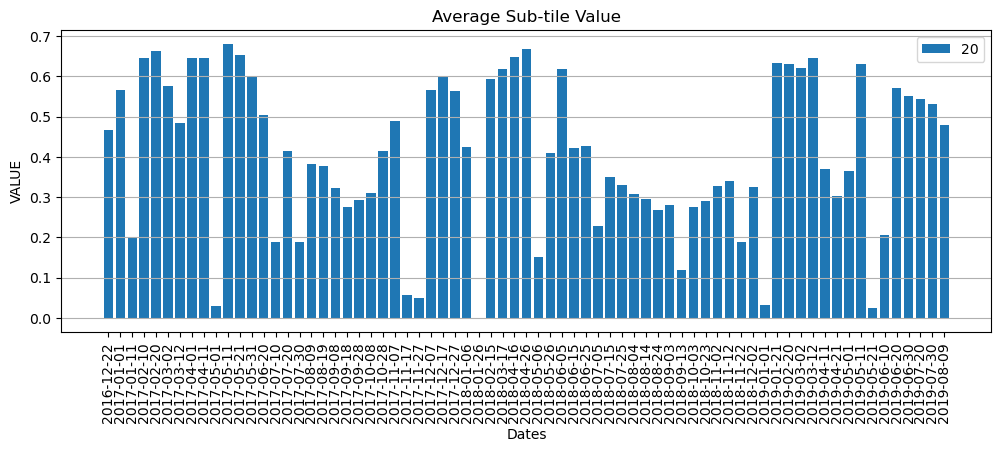

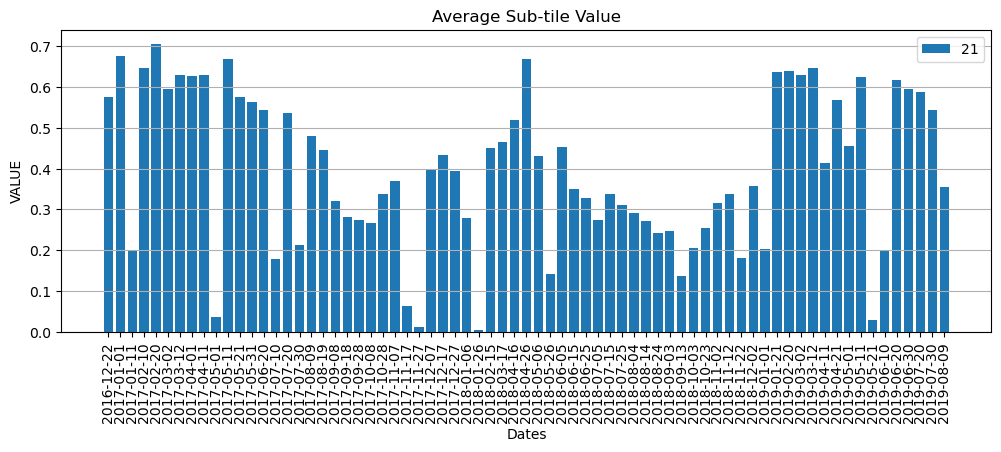

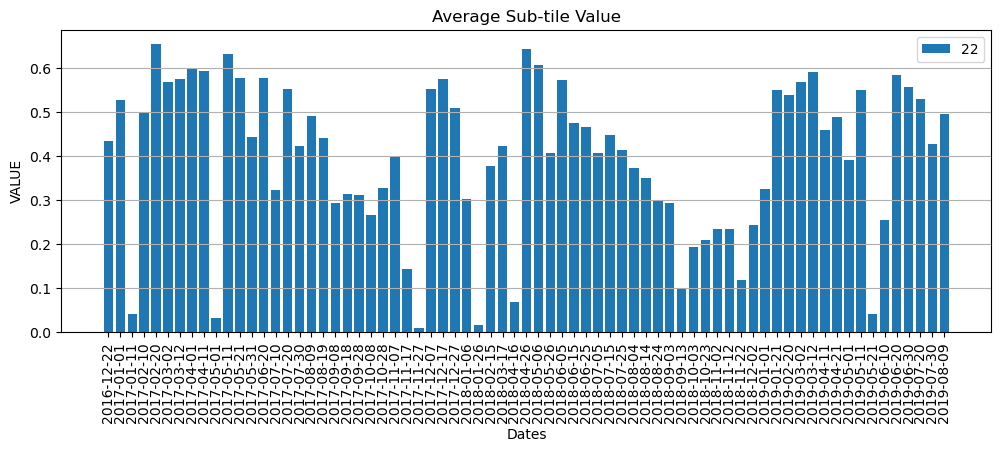

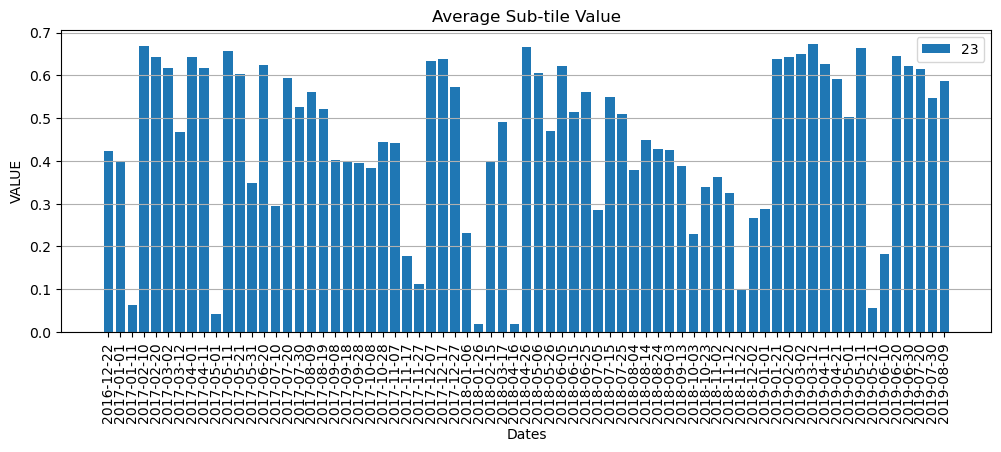

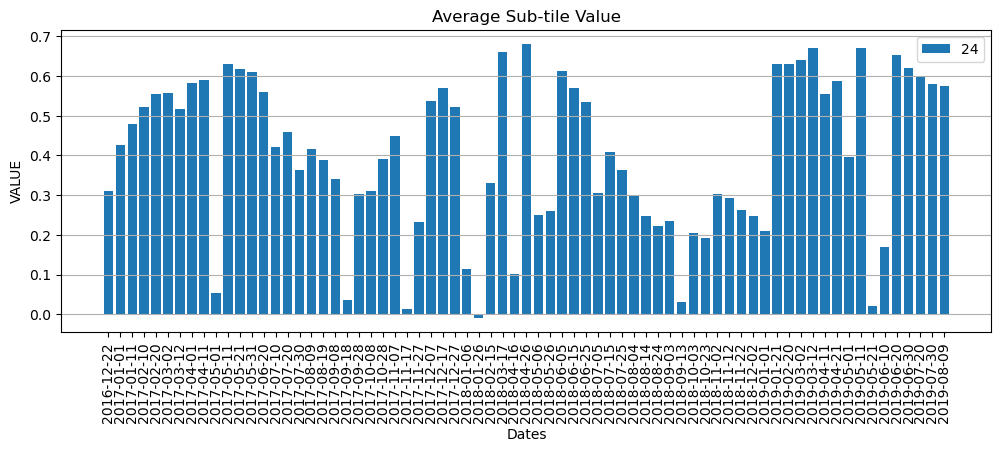

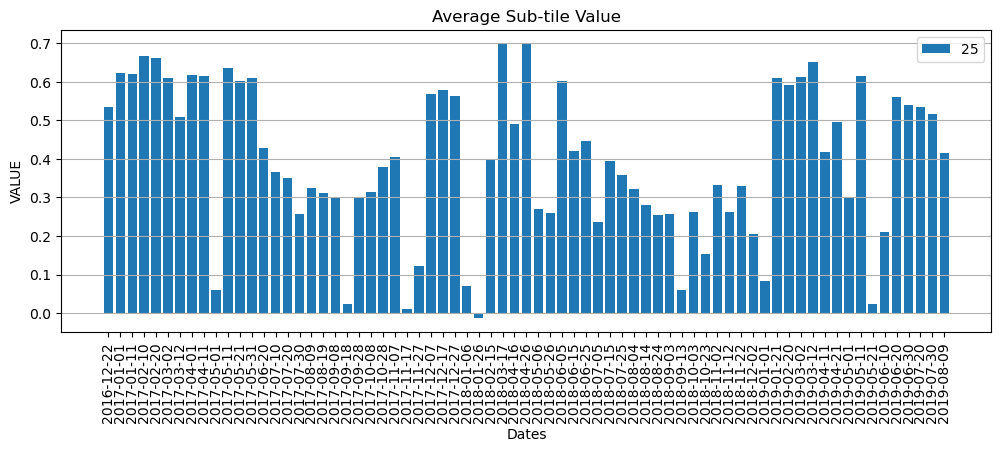

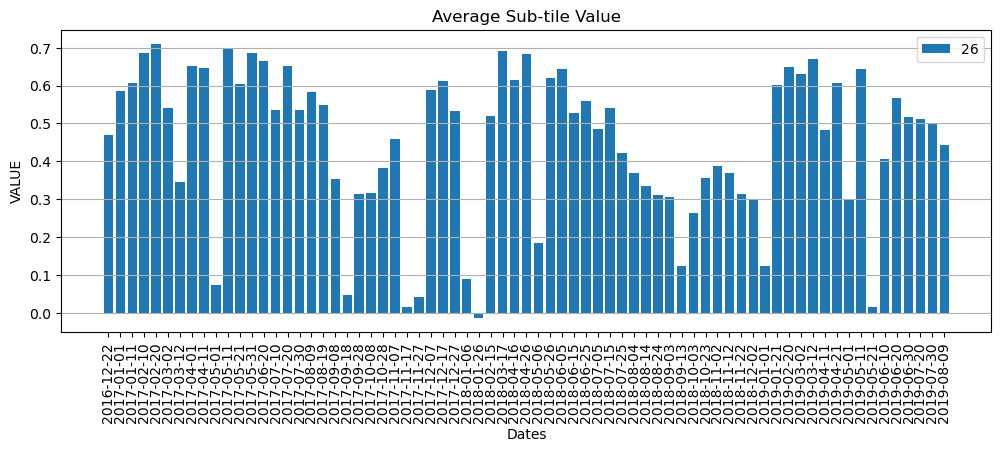

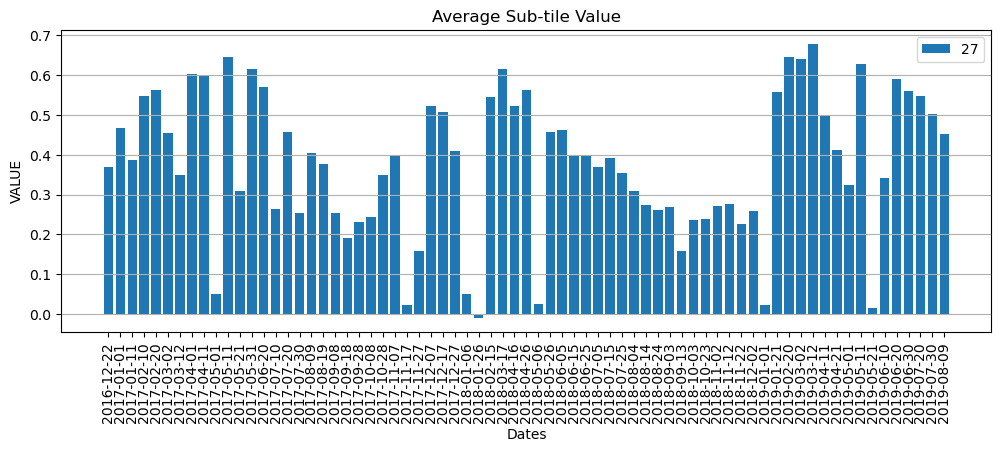

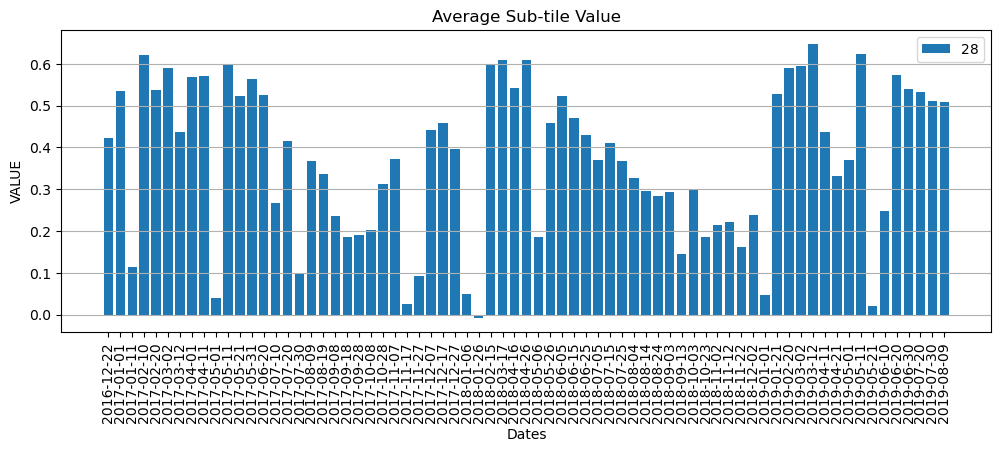

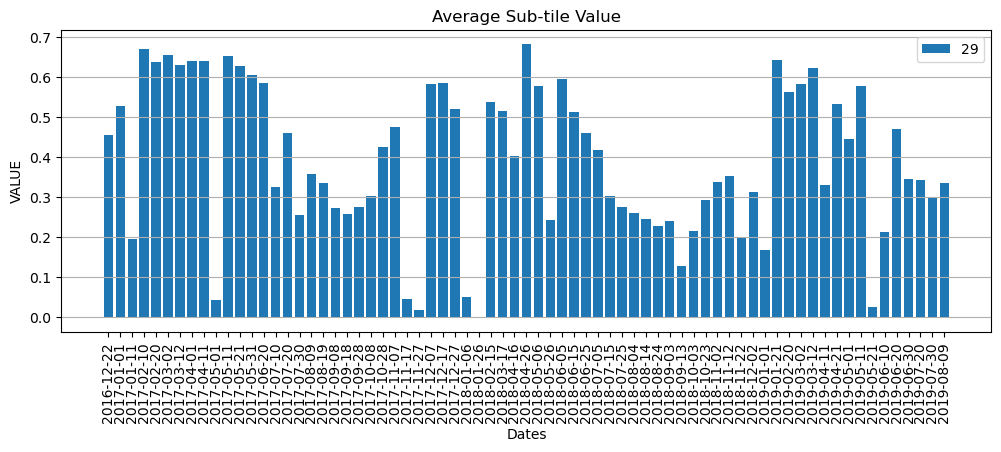

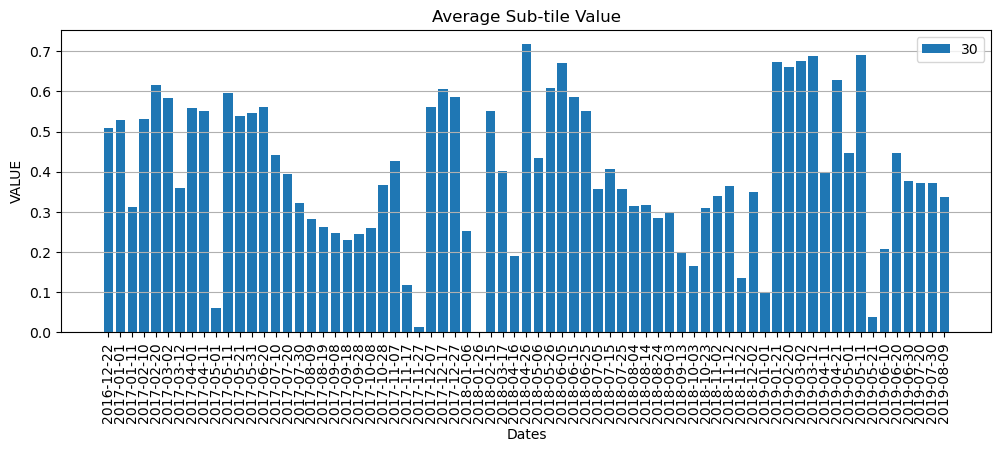

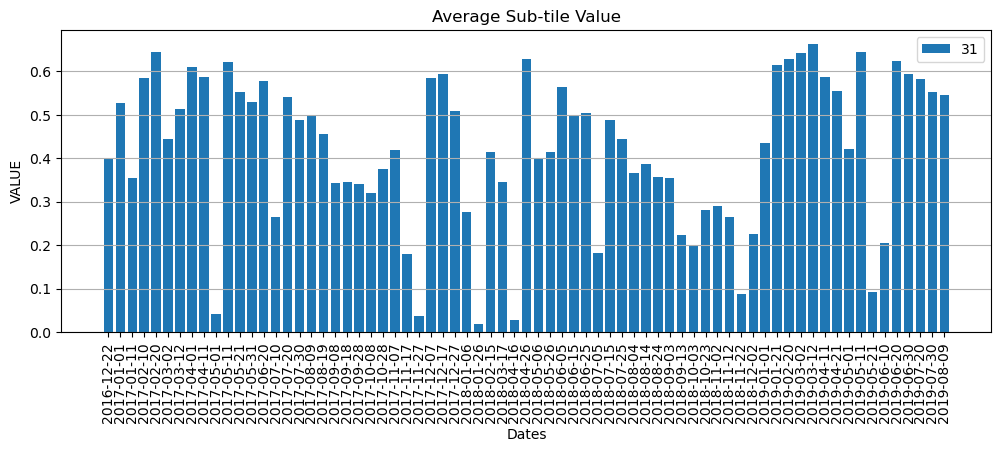

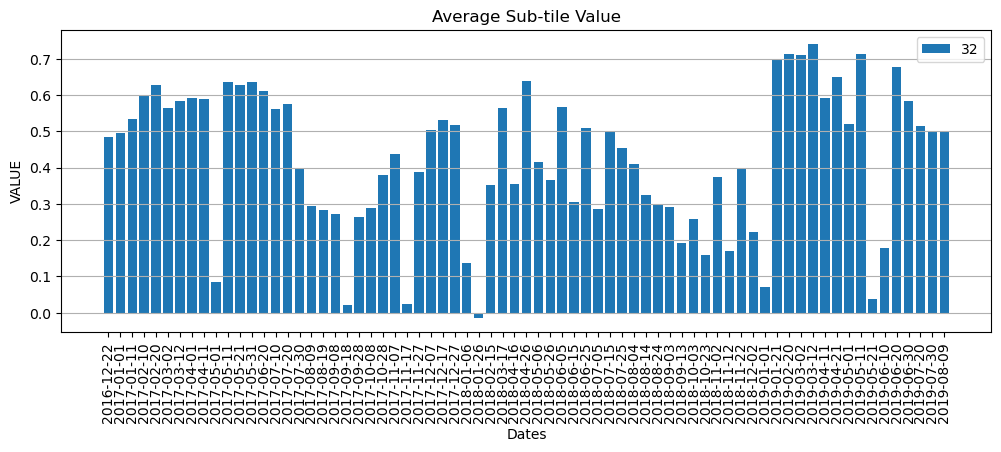

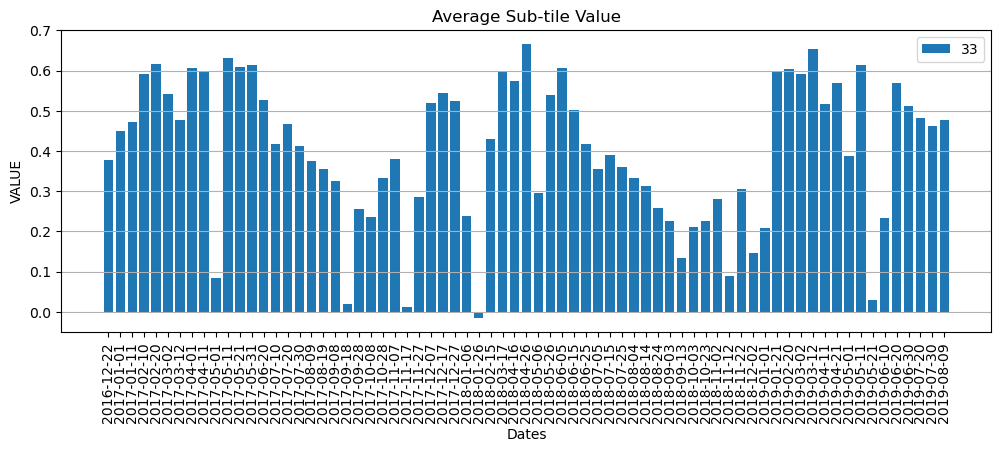

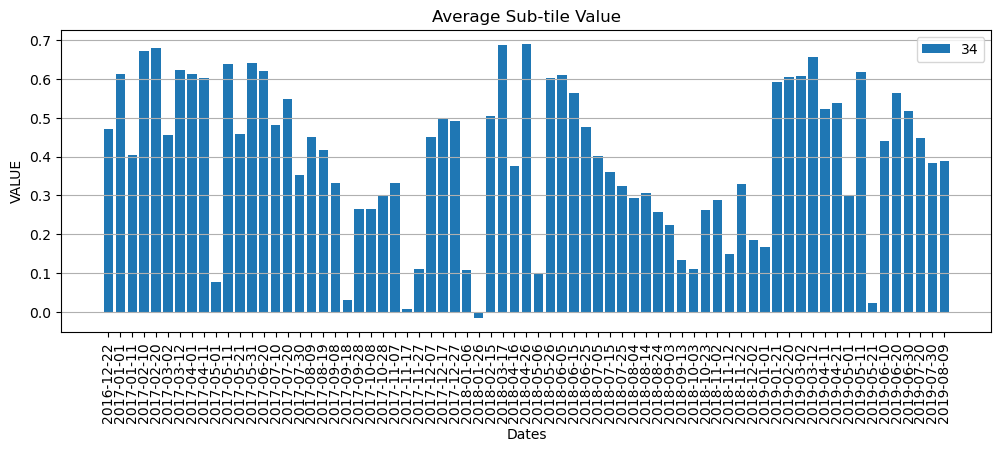

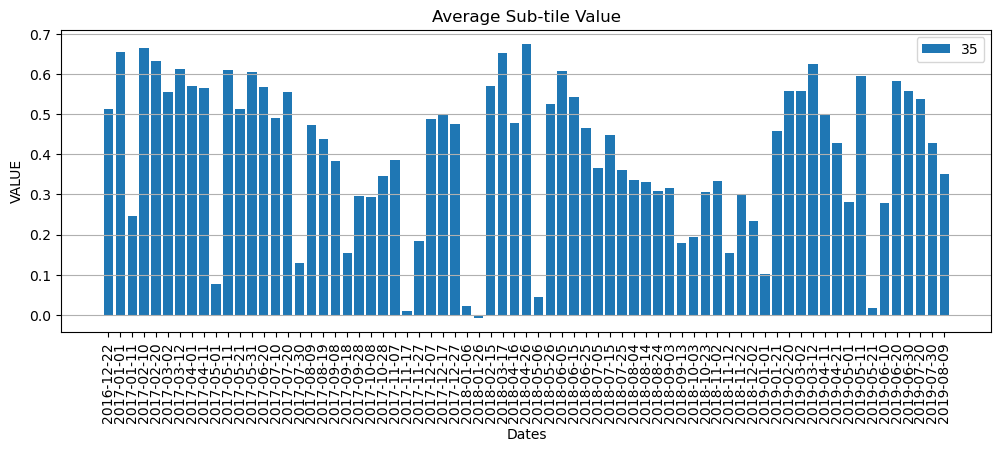

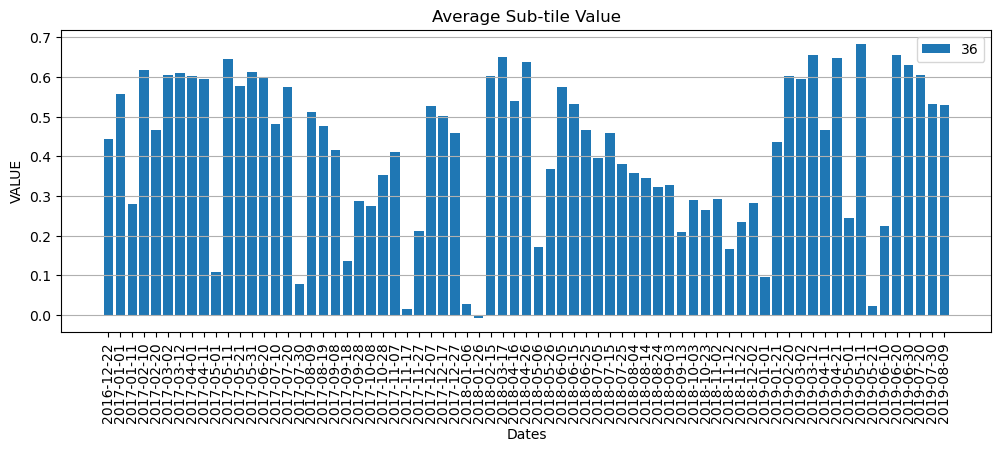

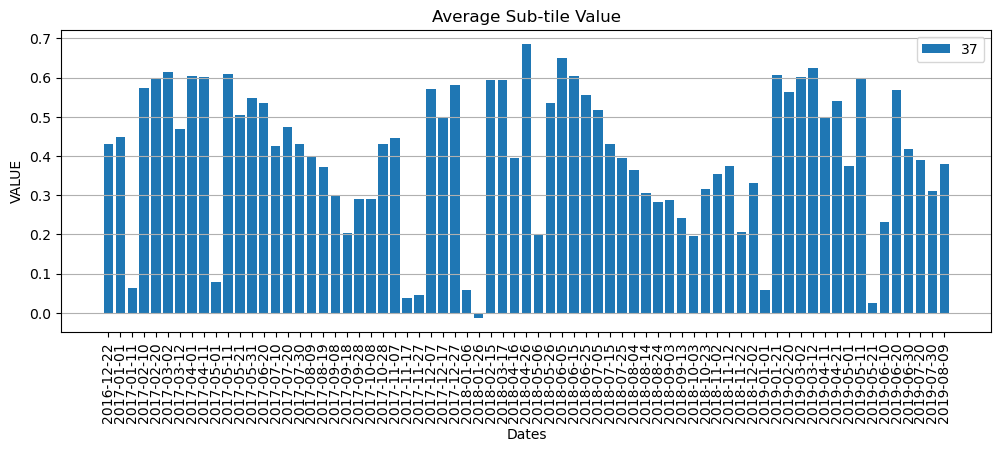

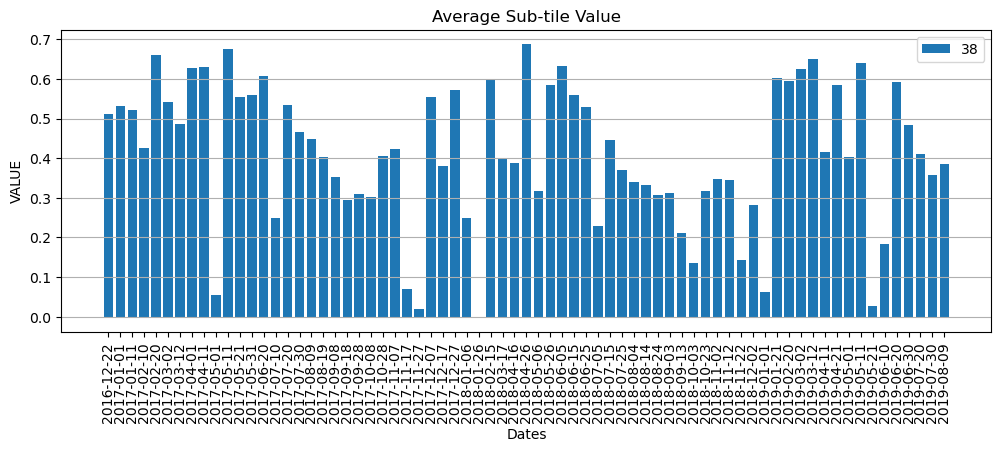

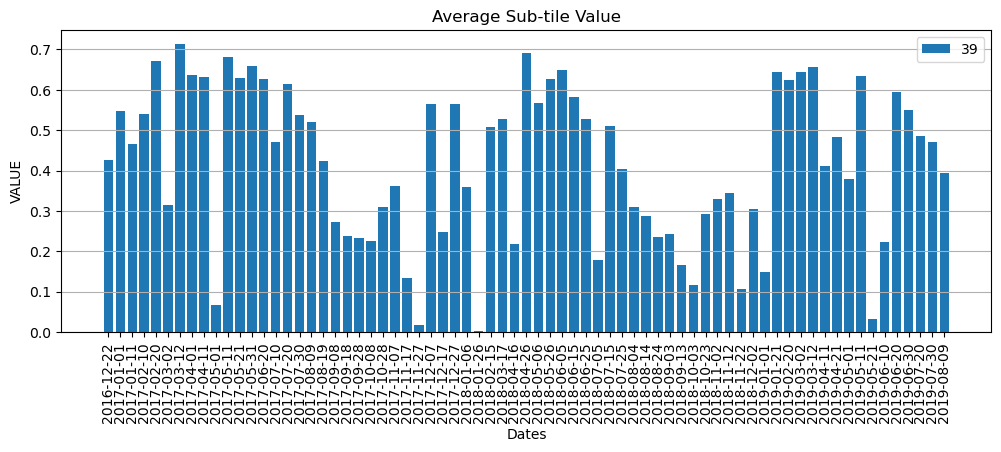

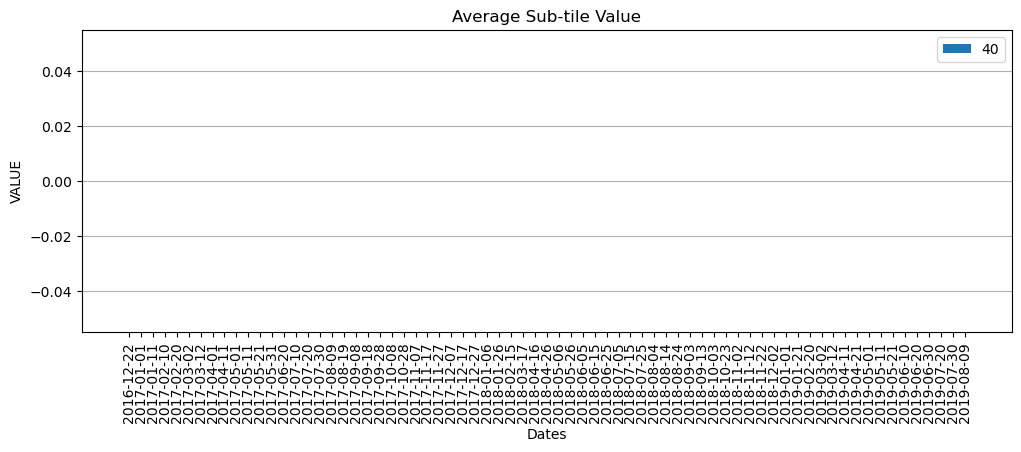

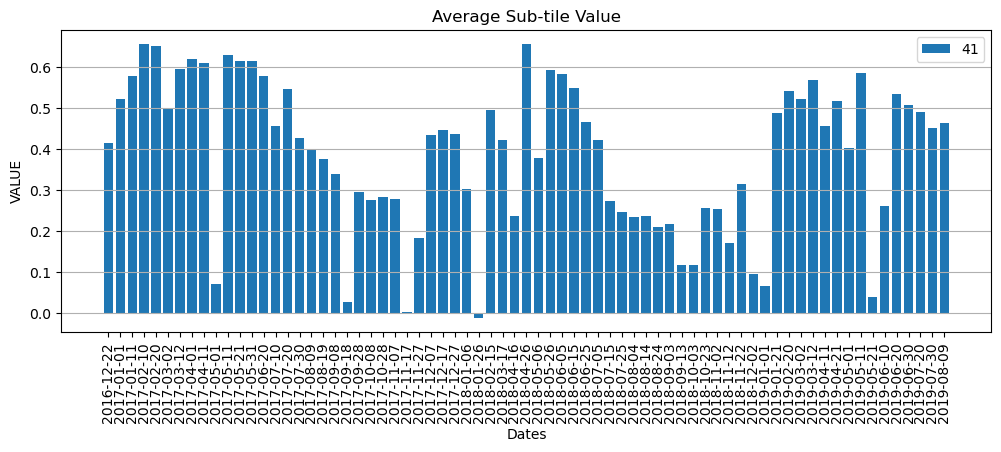

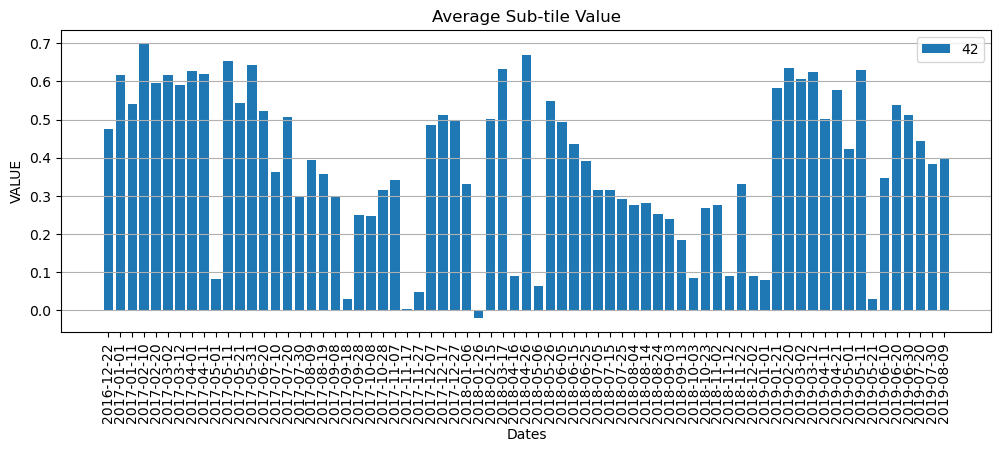

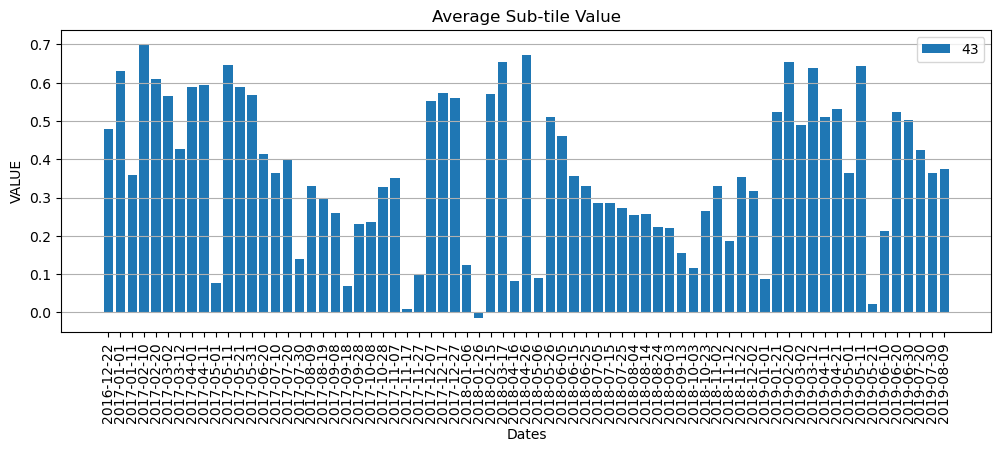

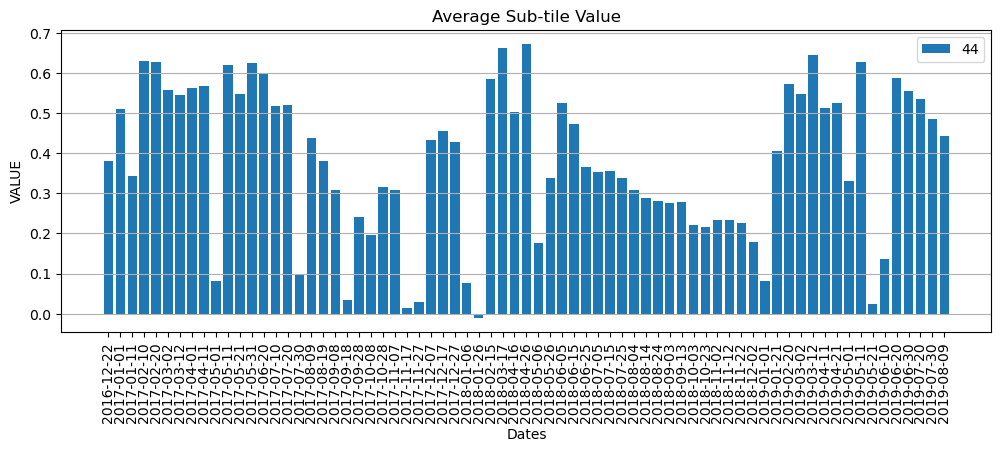

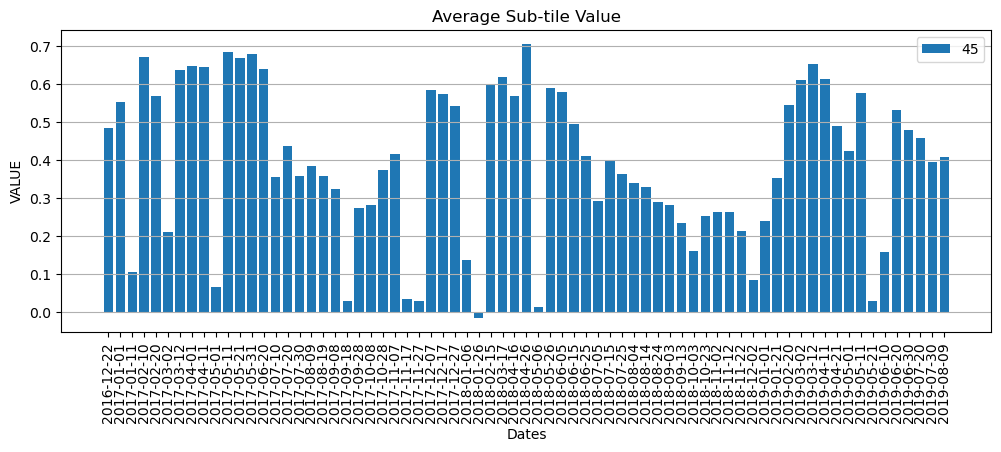

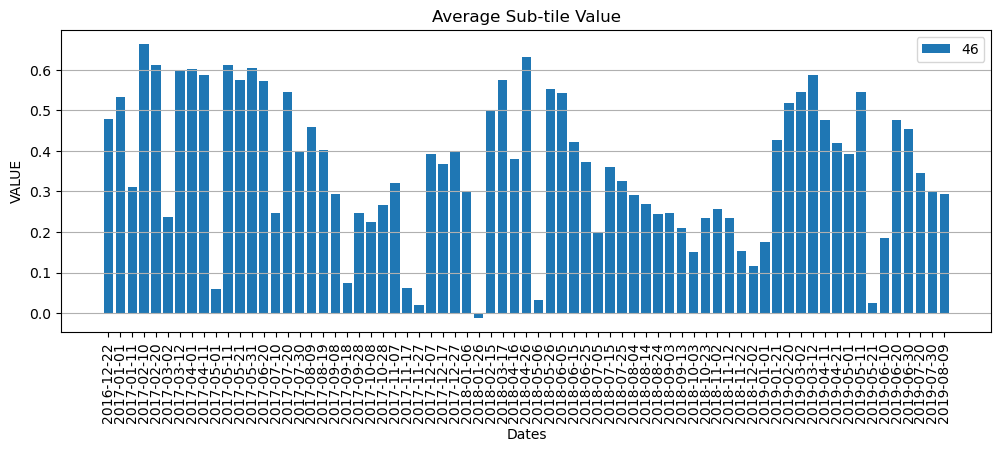

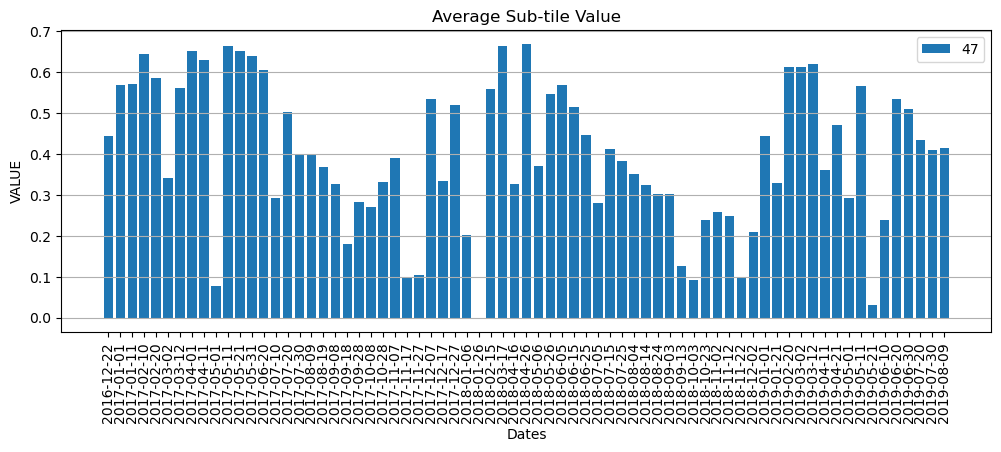

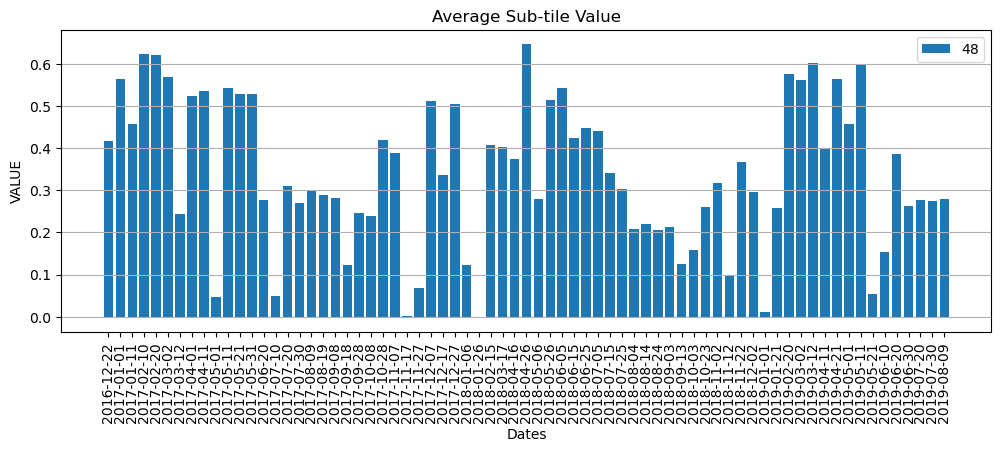

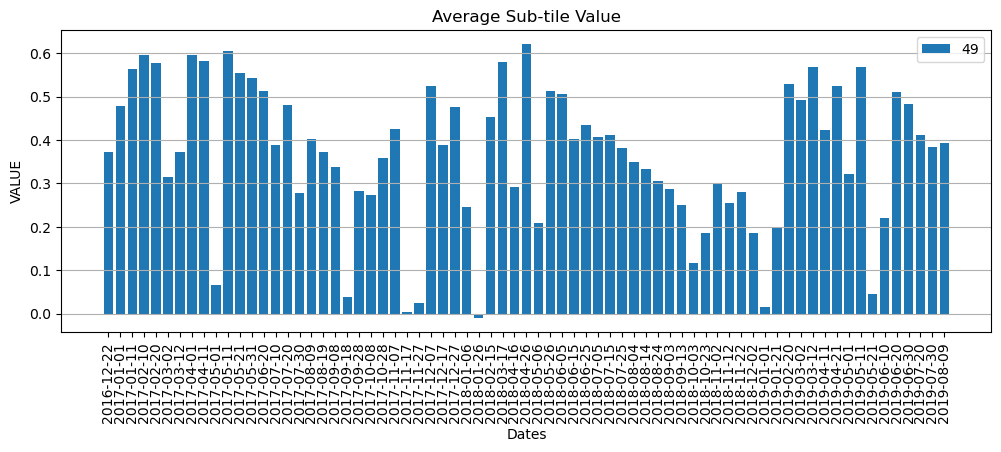

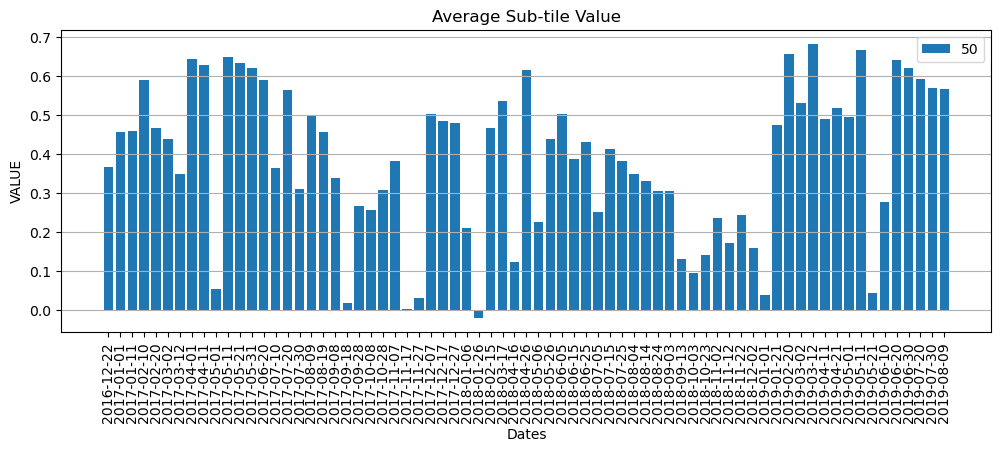

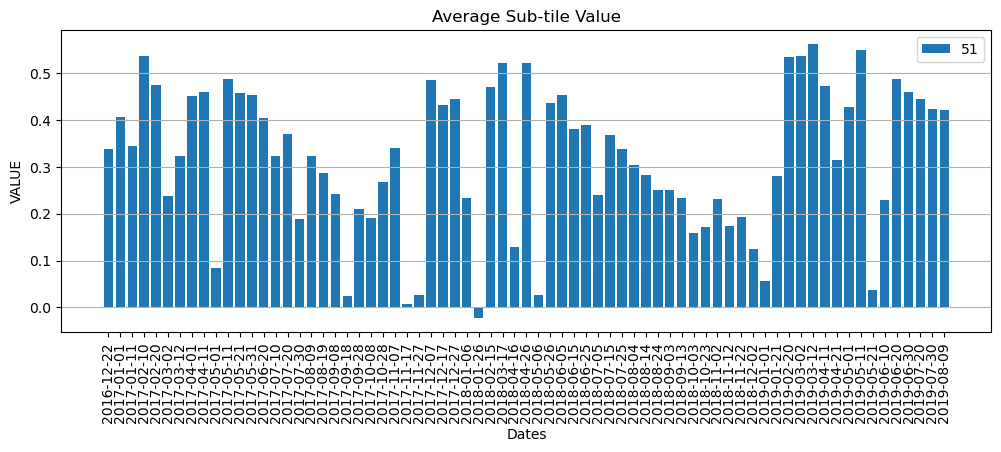

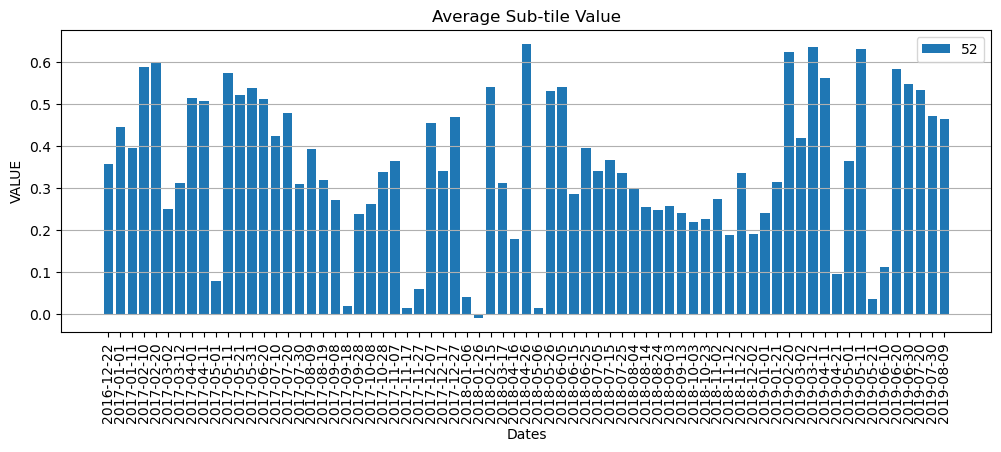

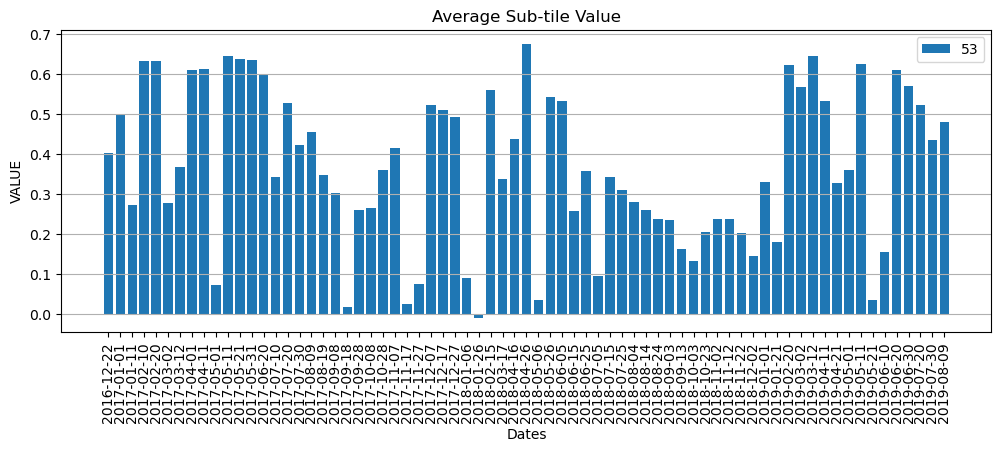

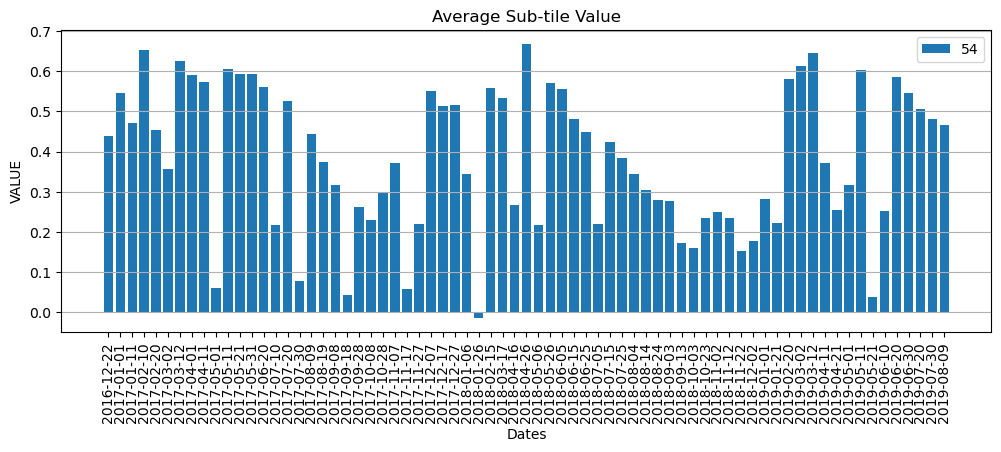

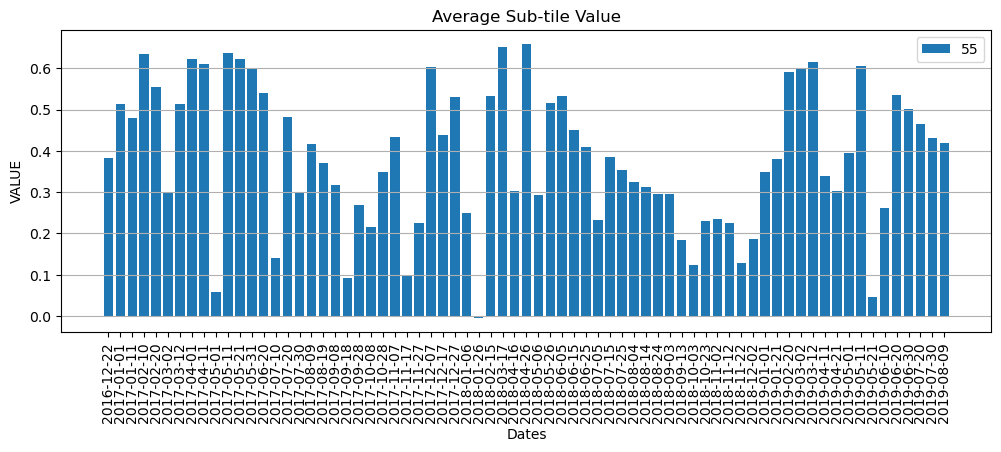

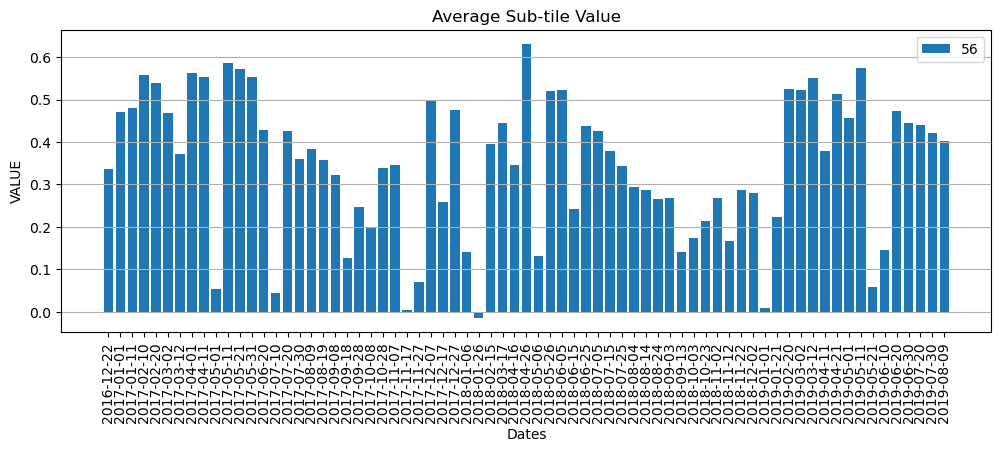

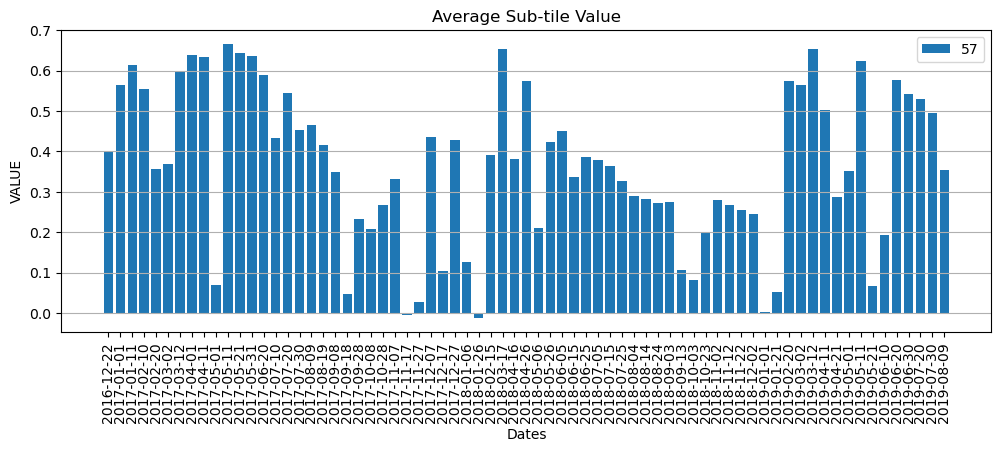

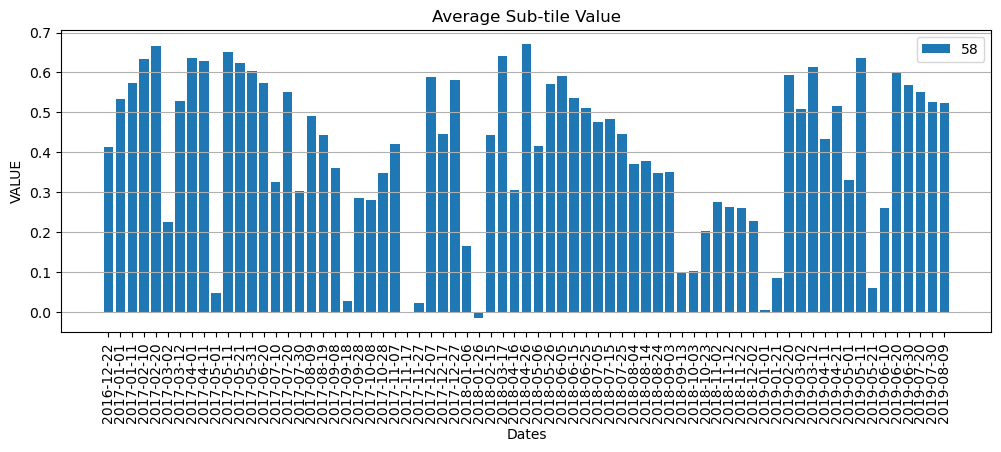

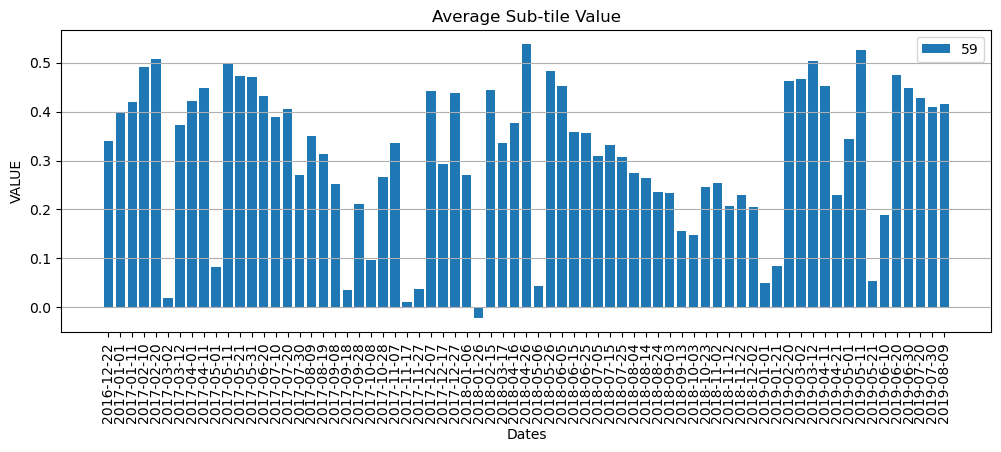

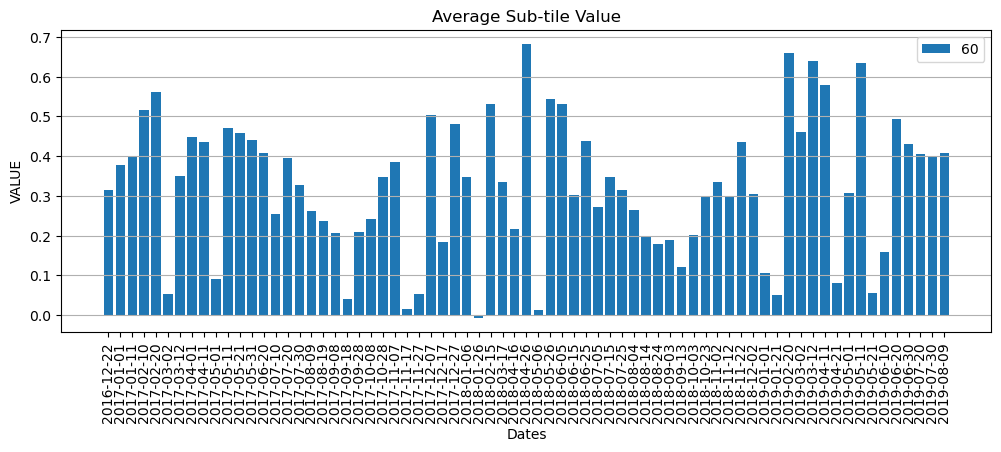

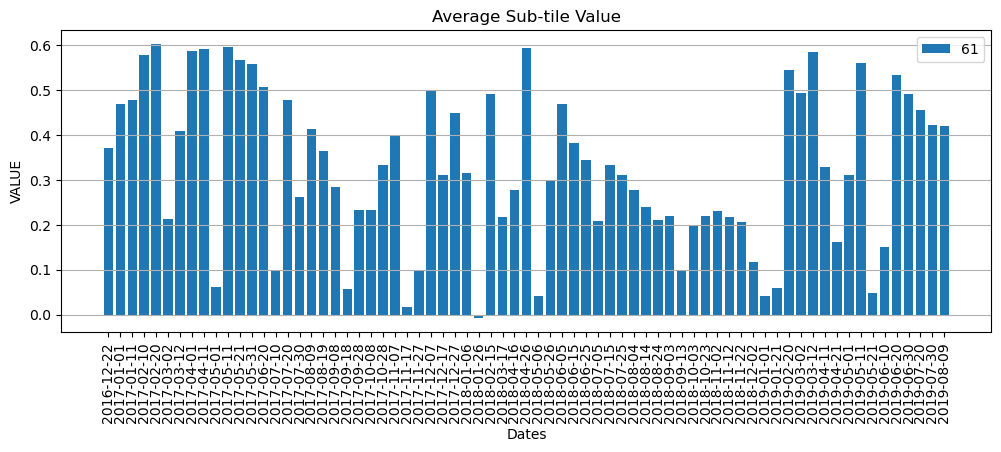

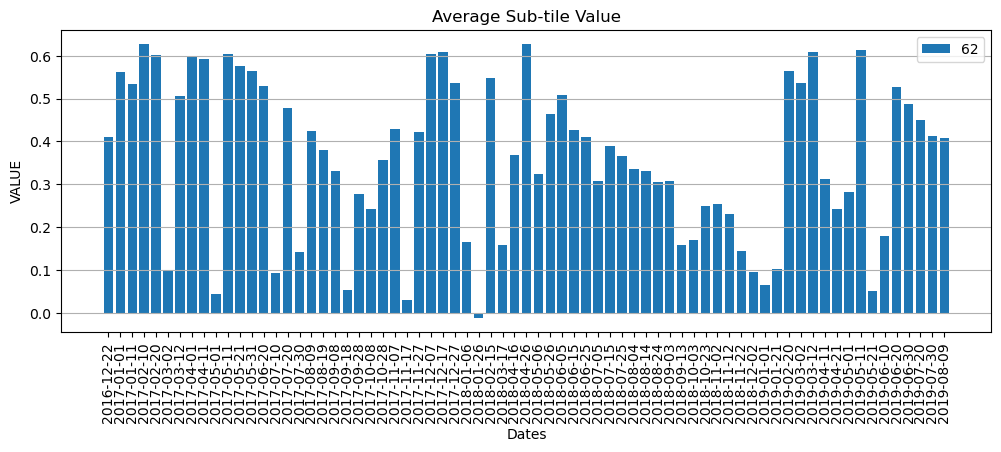

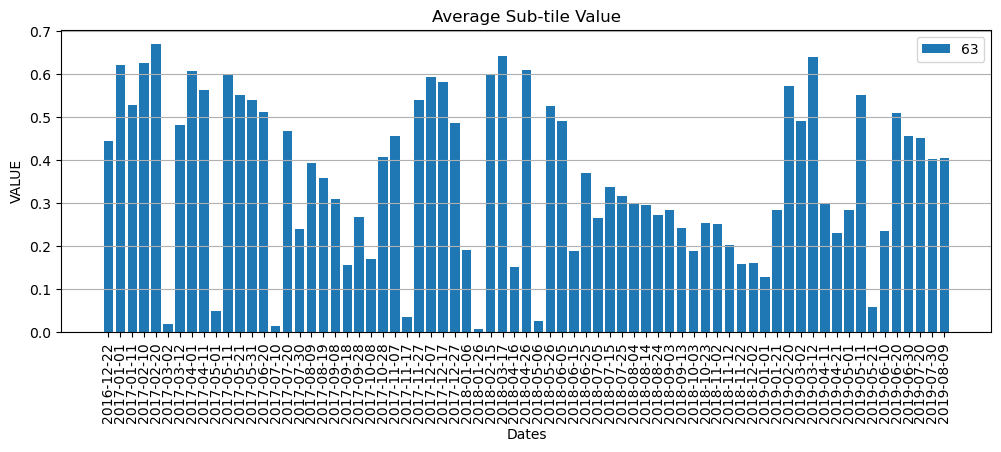

In [34]:
# NVDIS
plot_field_average(nvdis,4)

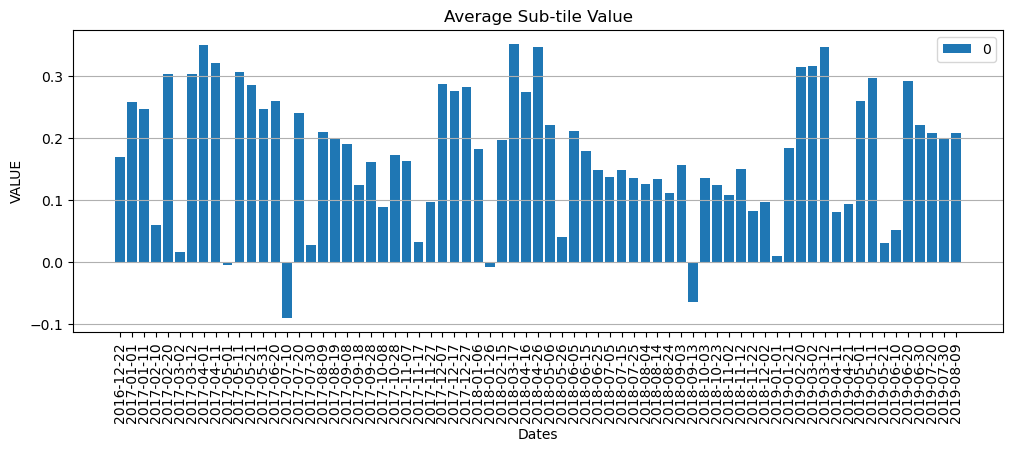

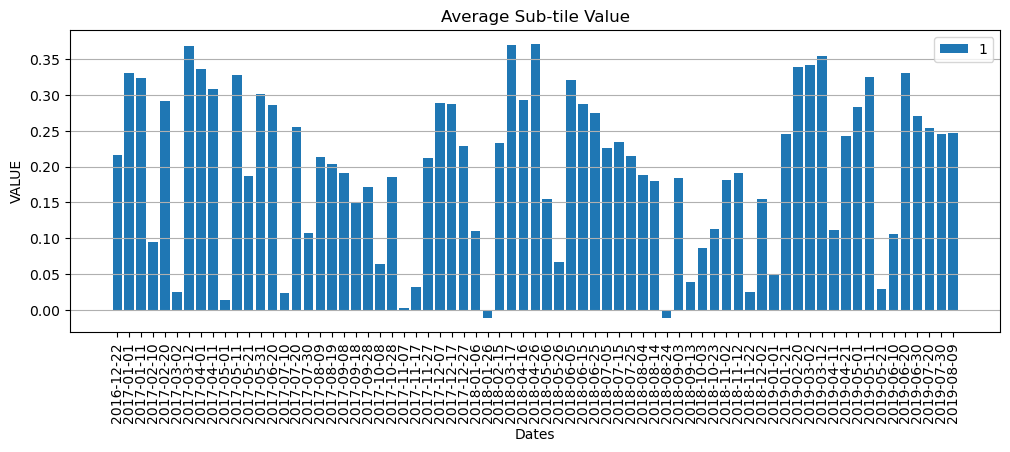

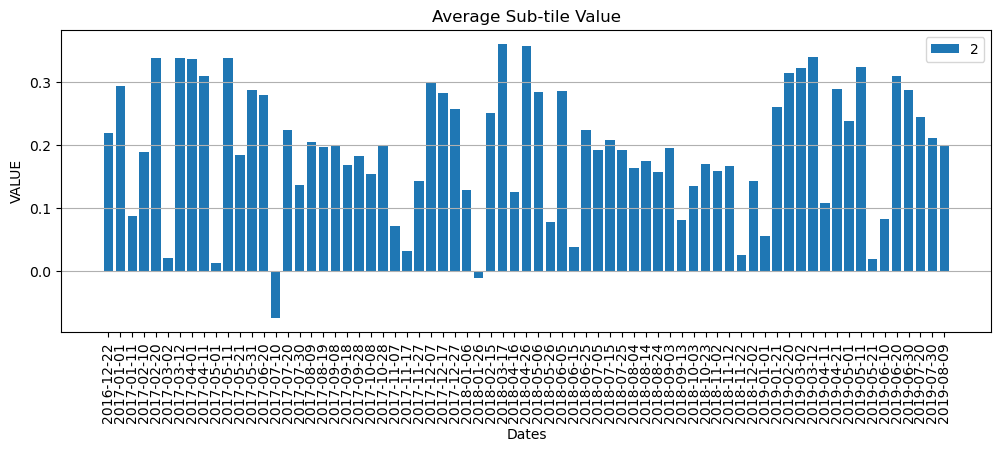

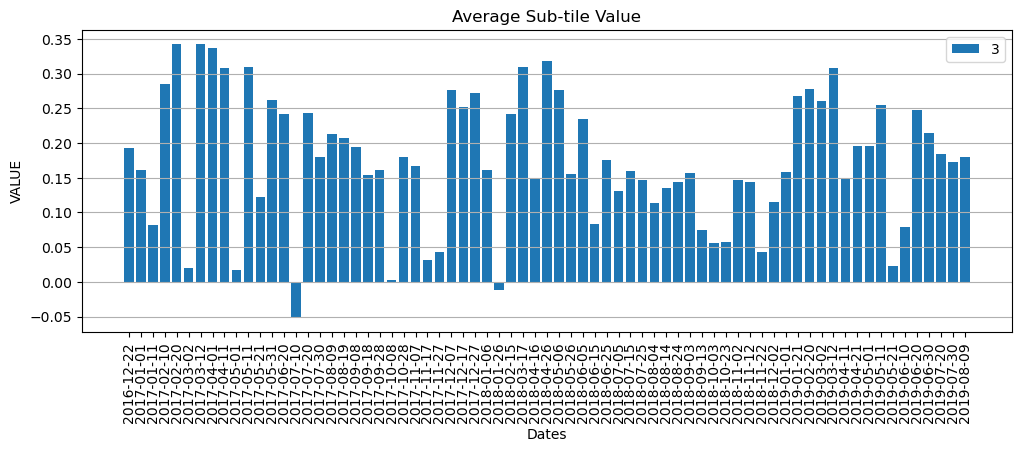

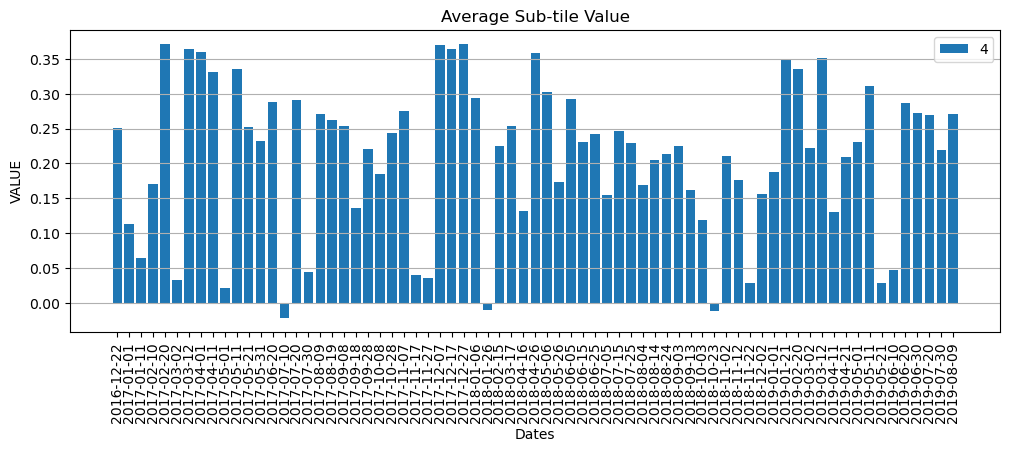

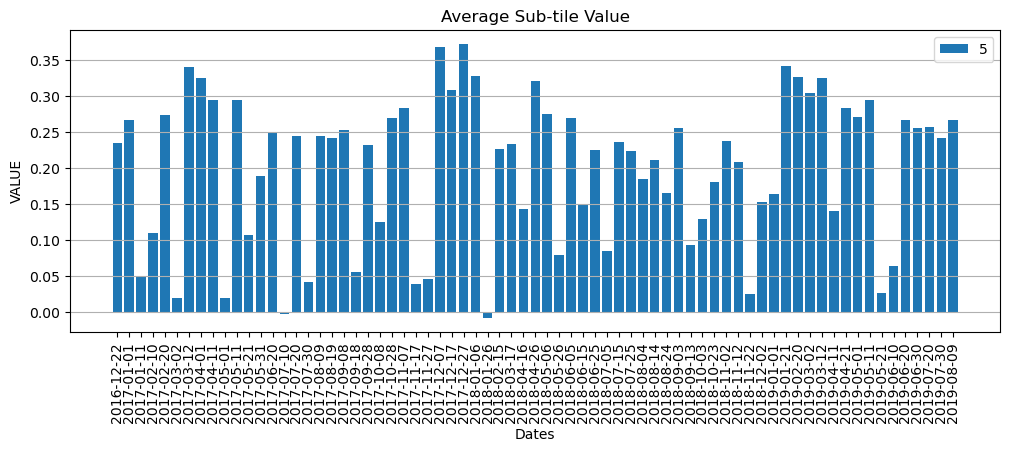

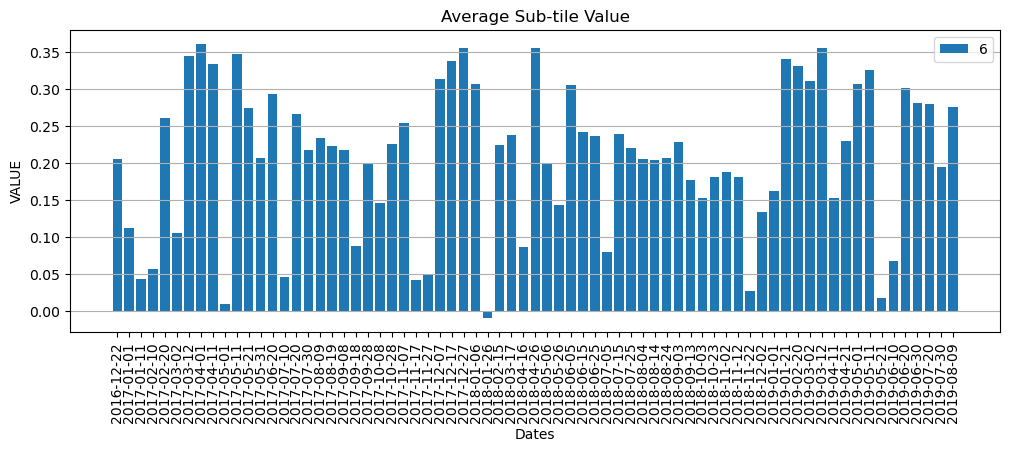

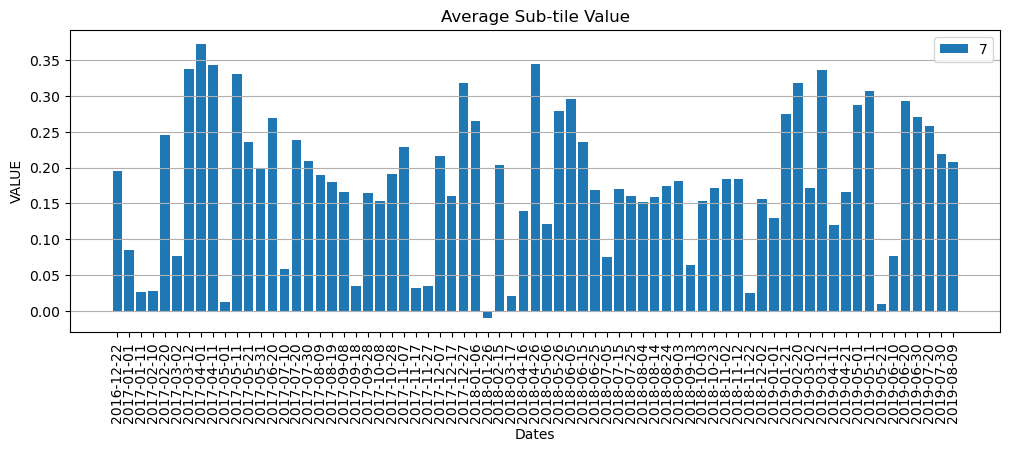

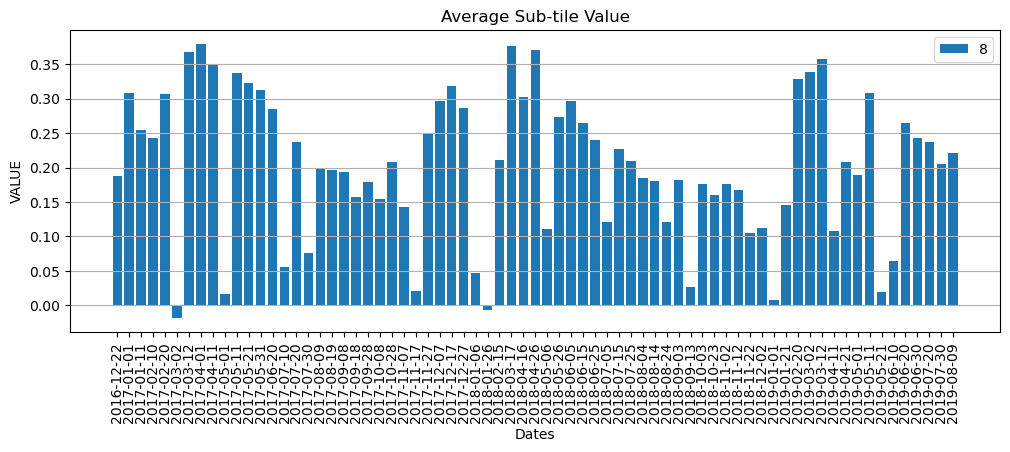

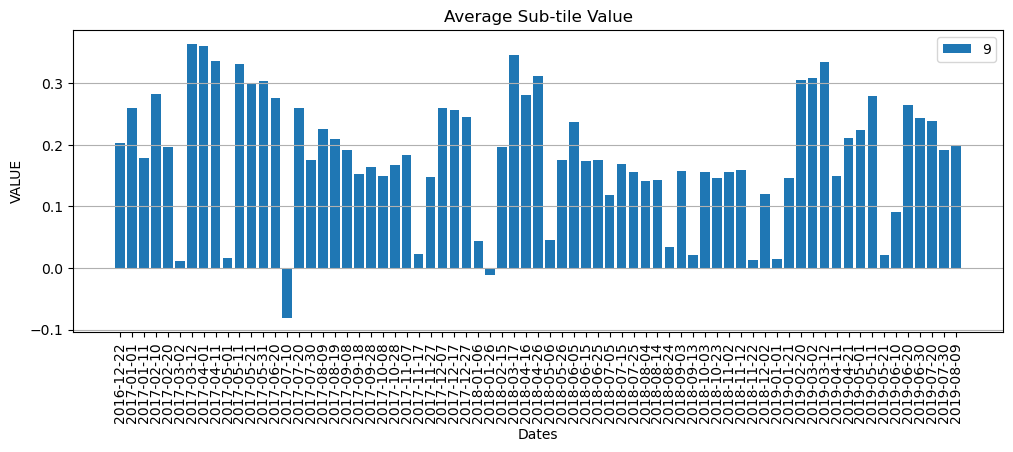

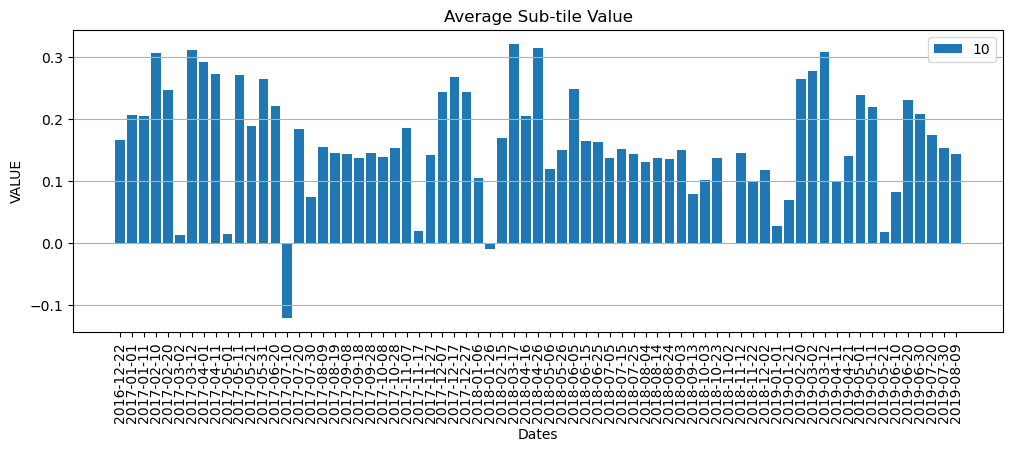

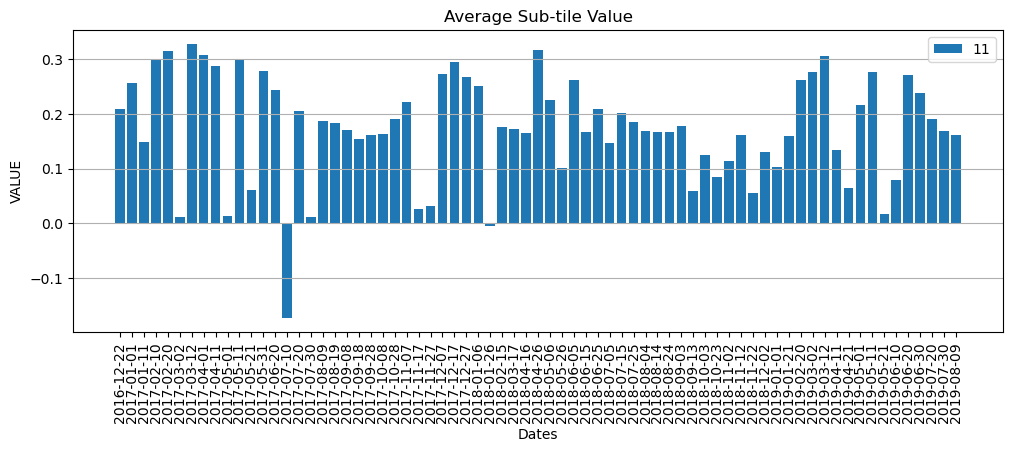

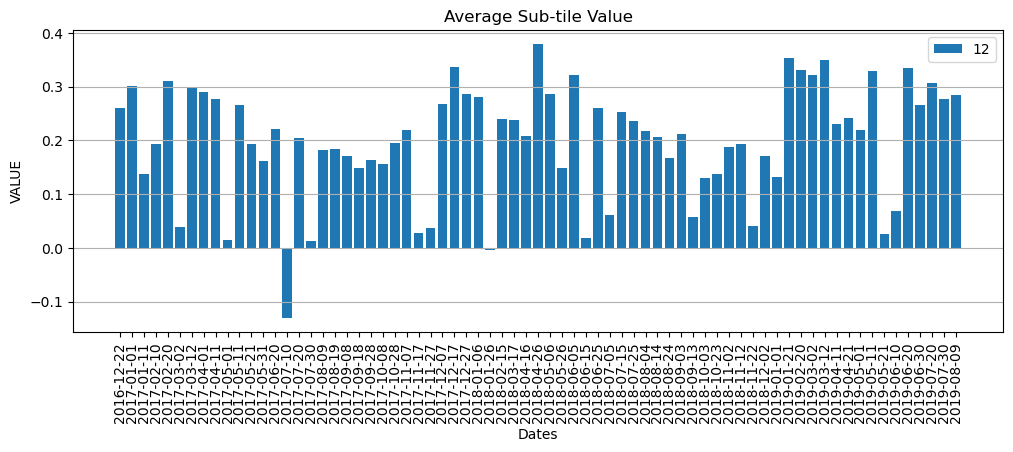

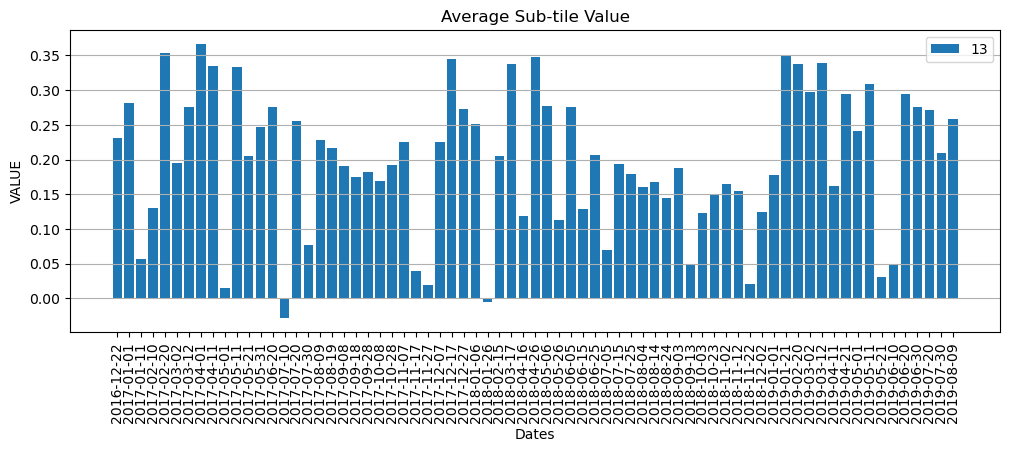

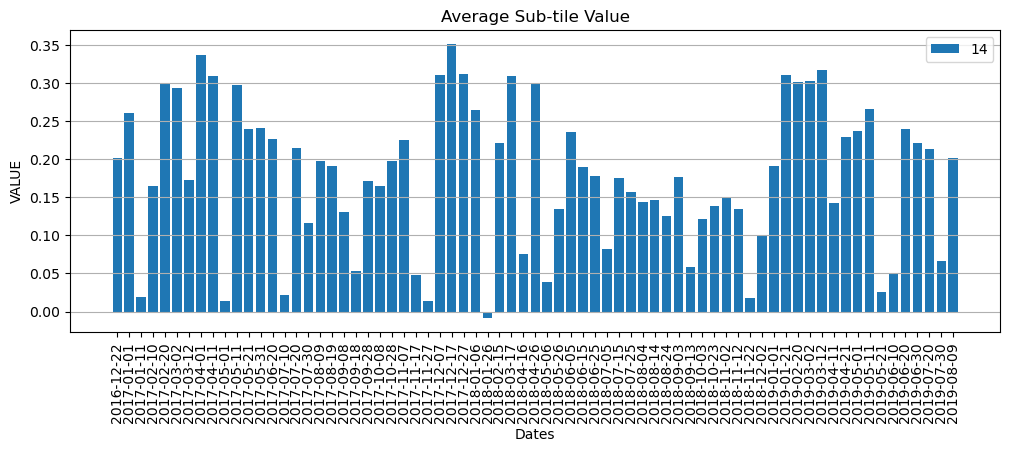

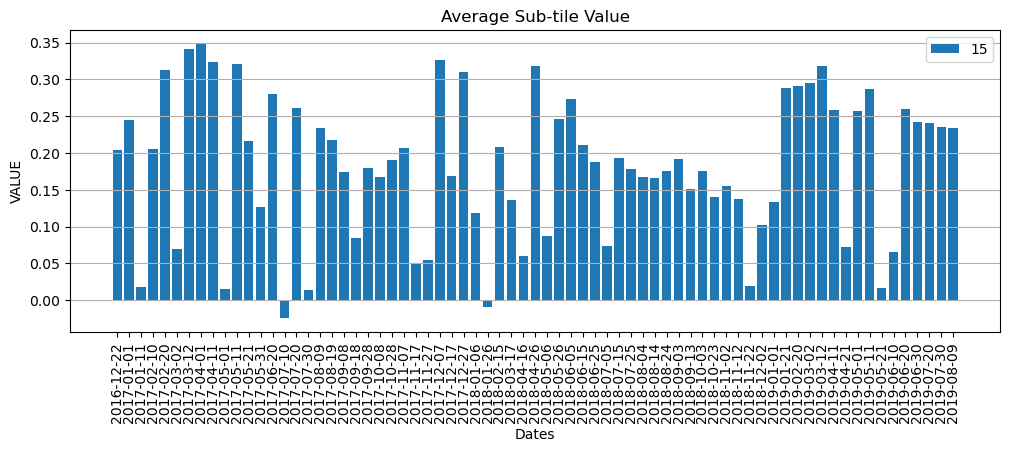

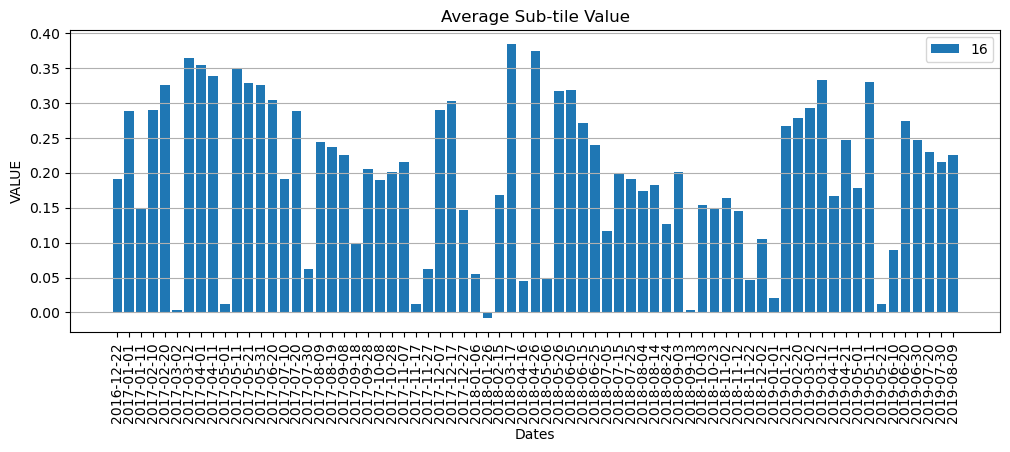

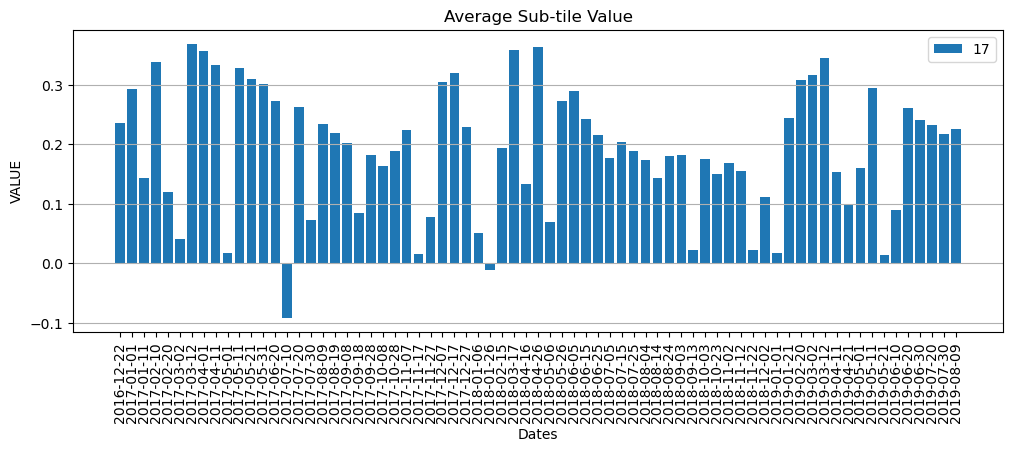

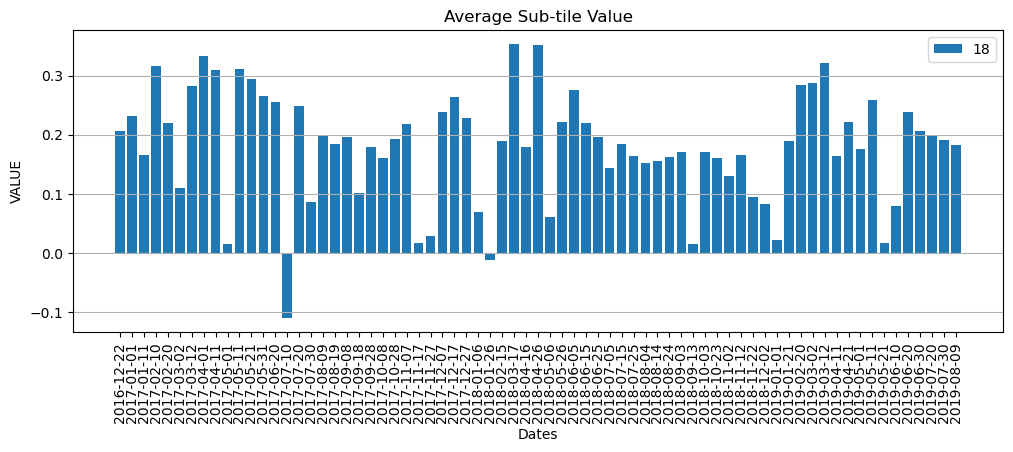

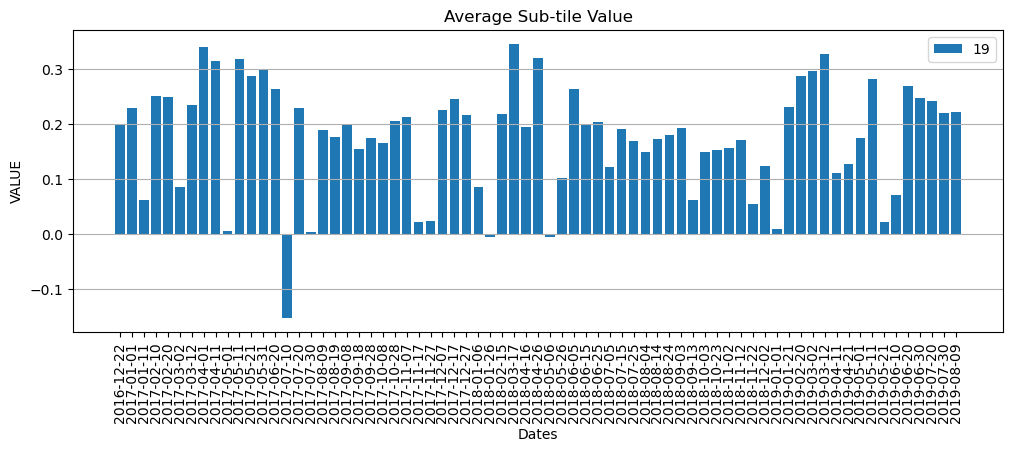

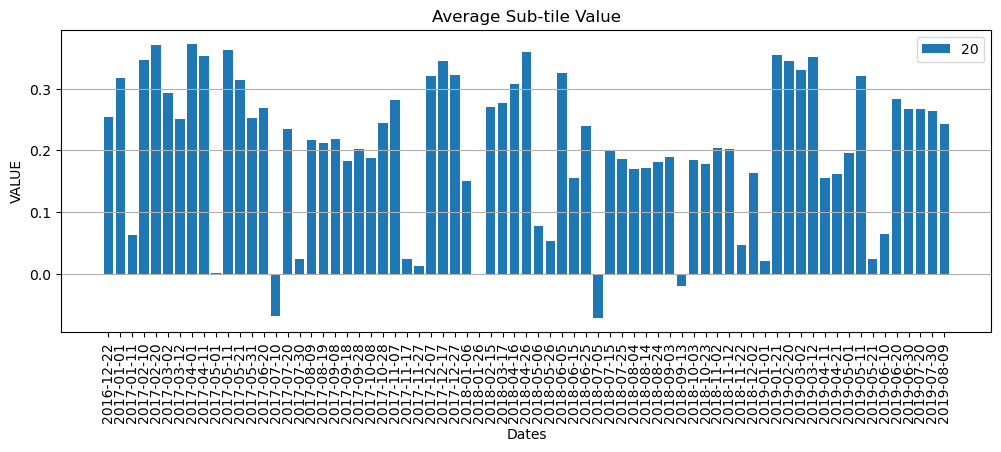

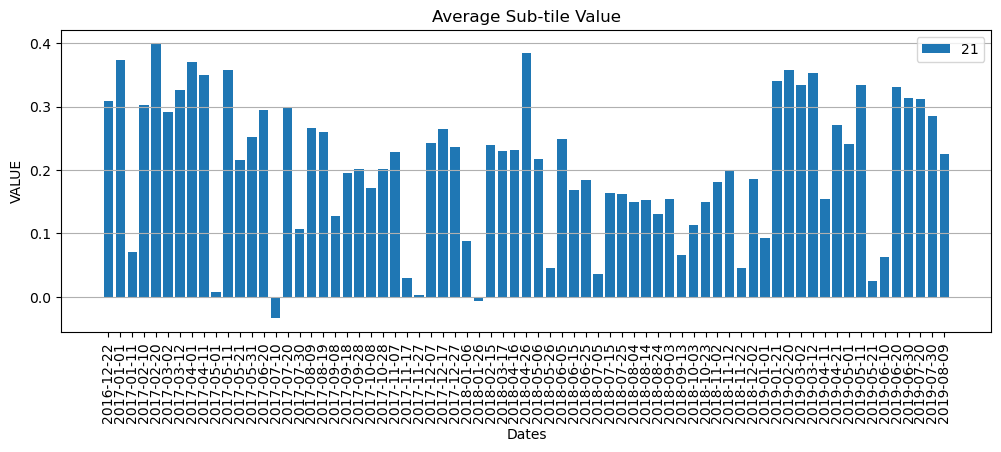

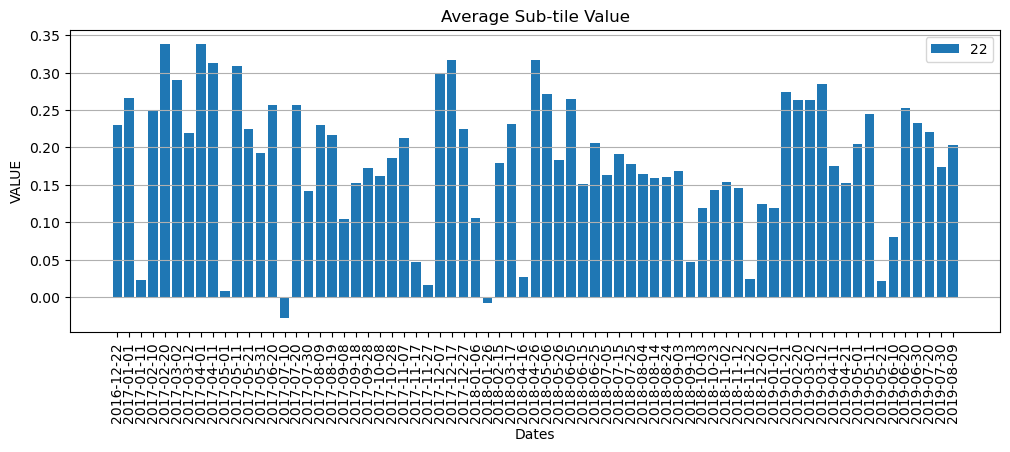

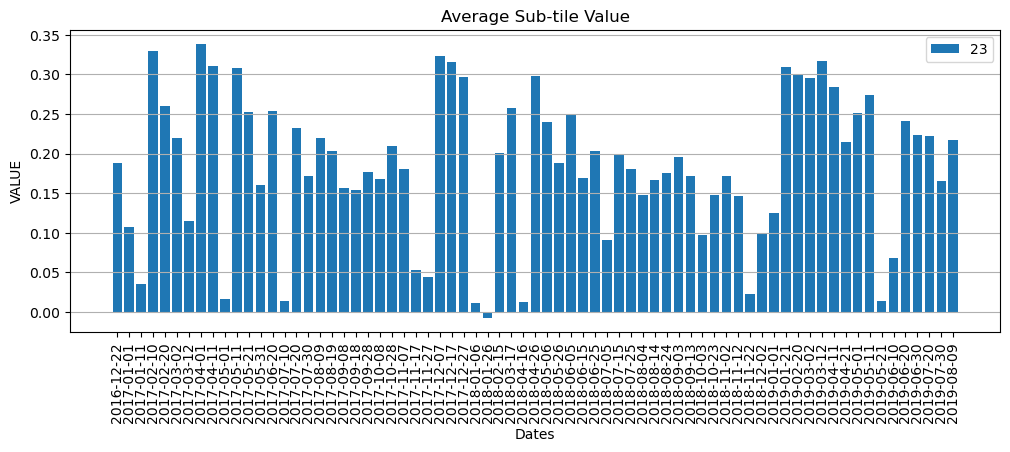

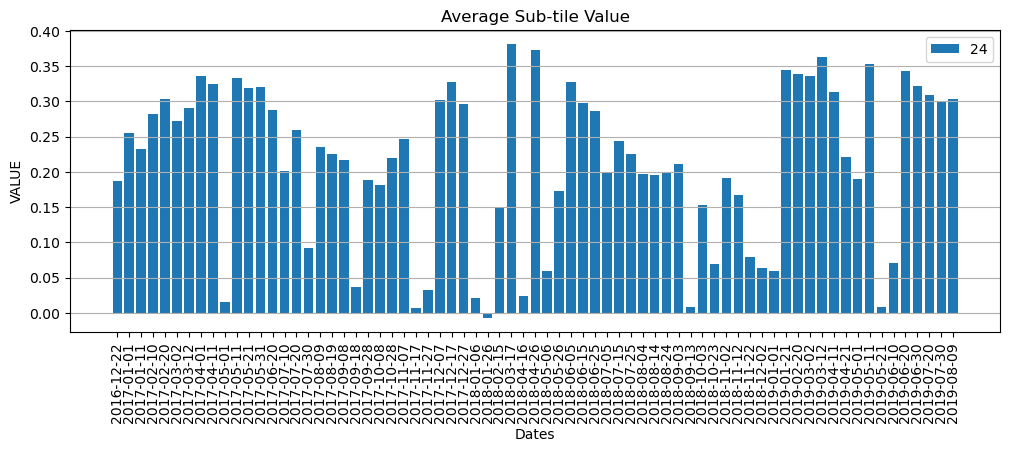

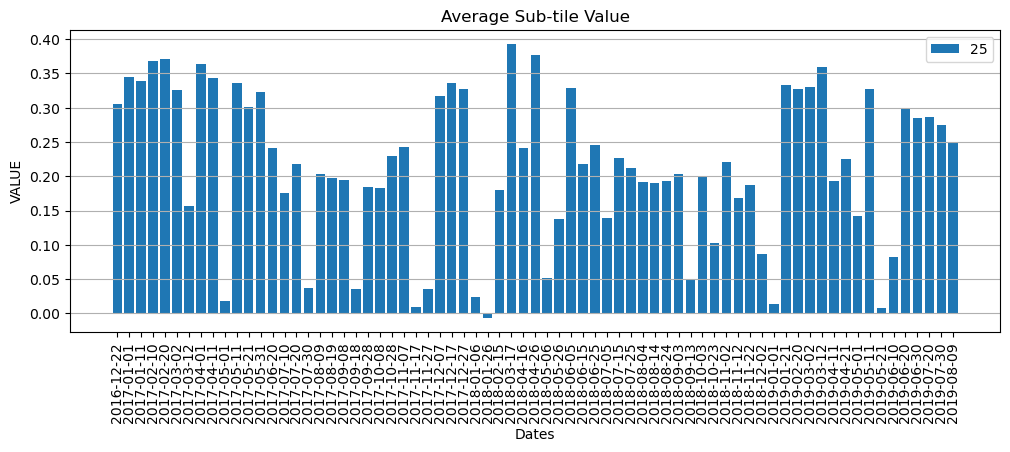

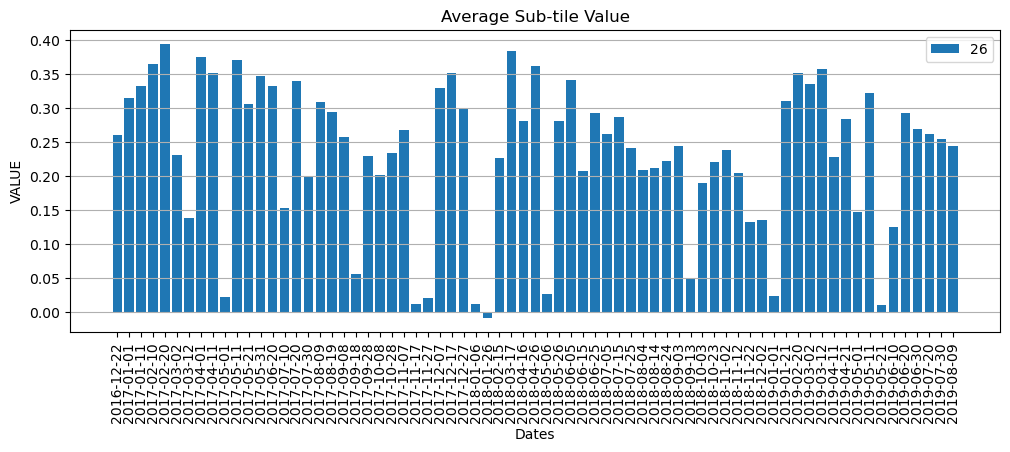

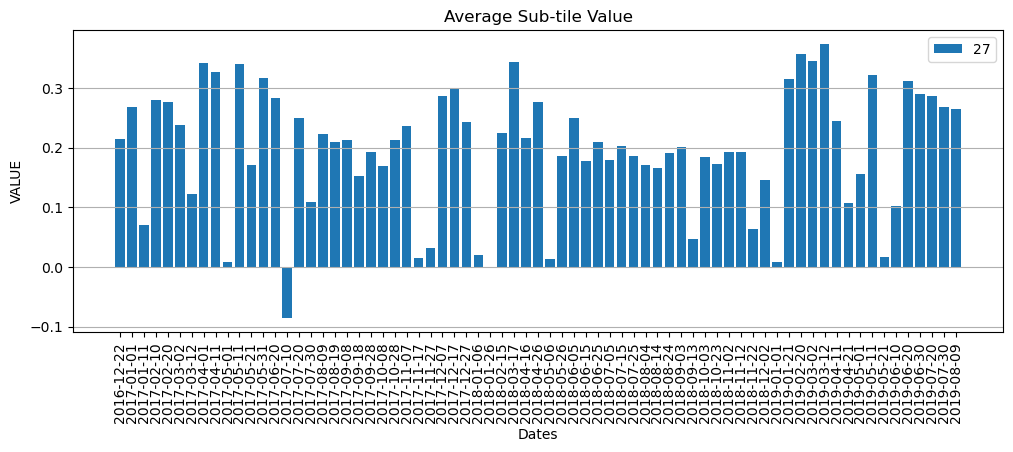

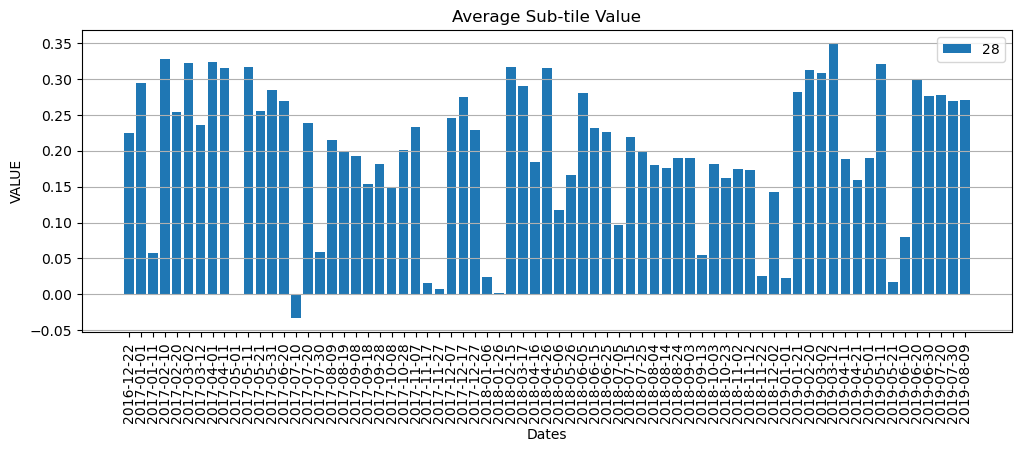

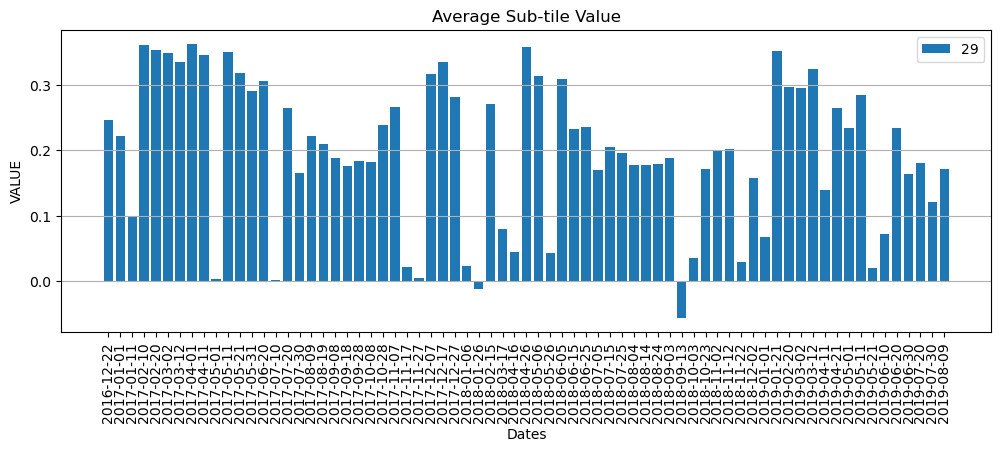

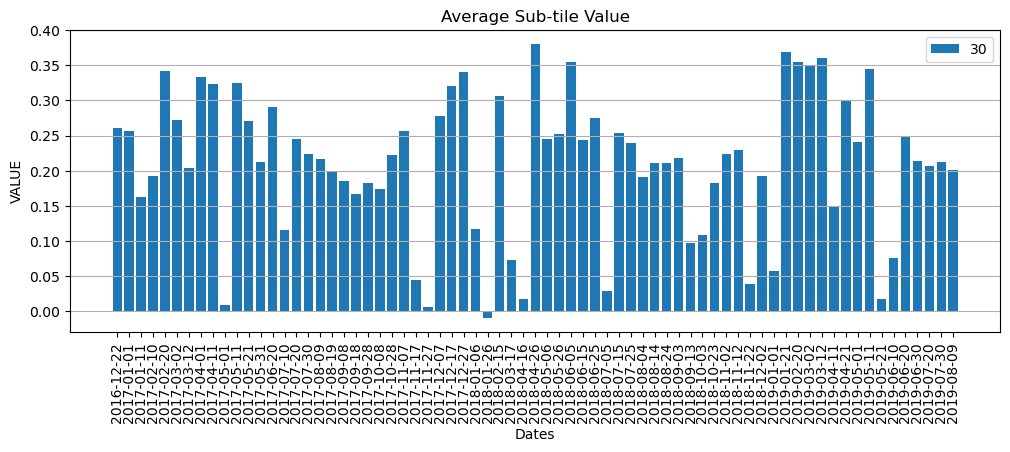

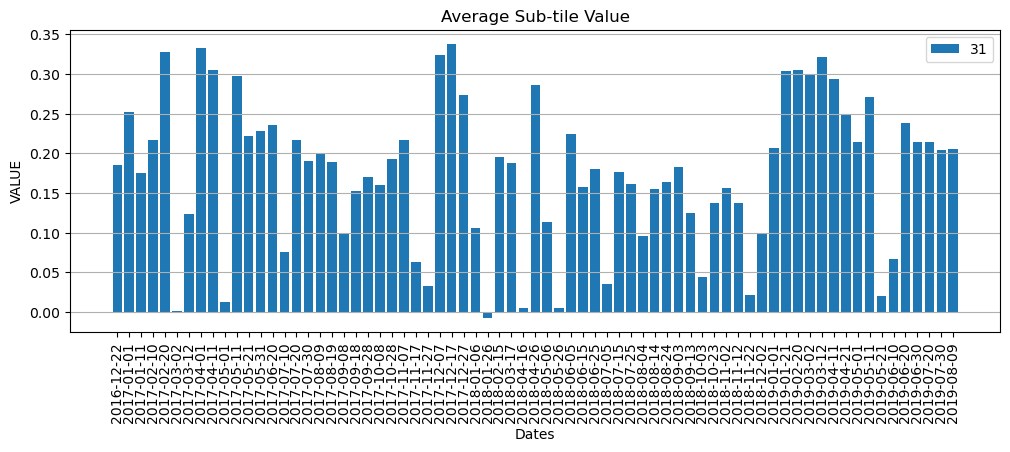

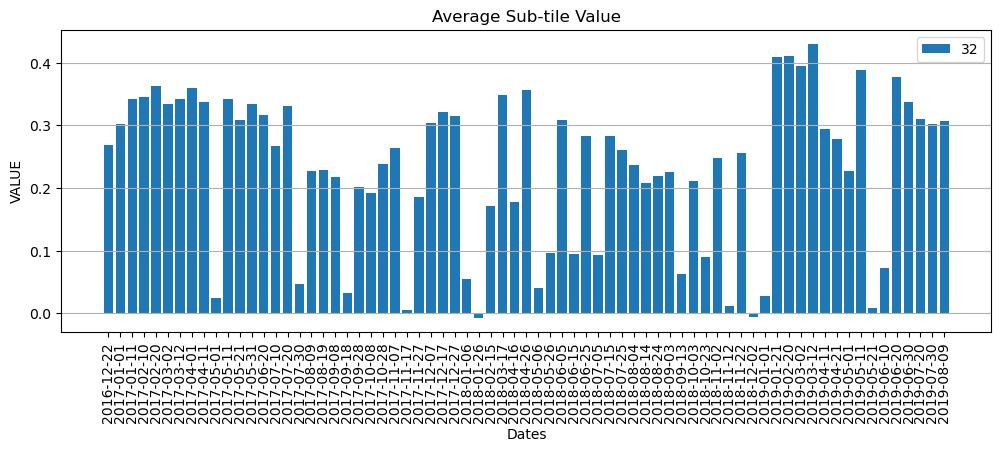

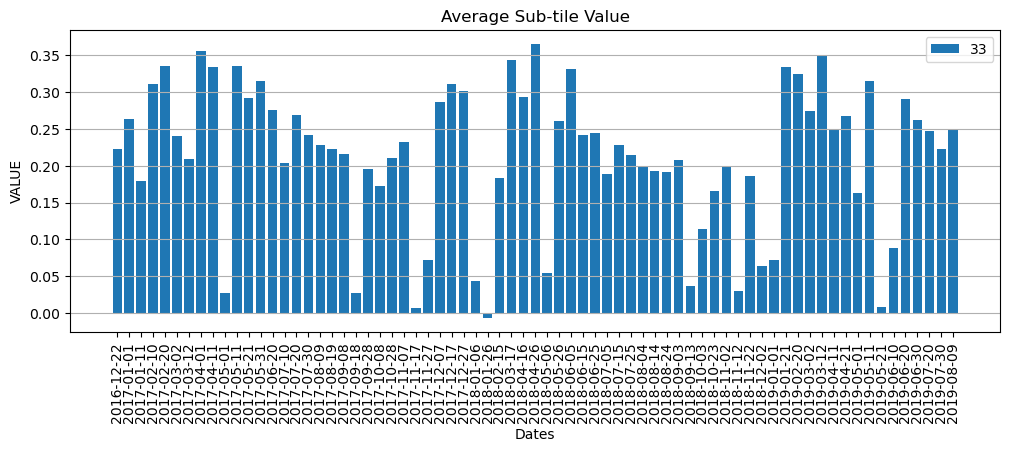

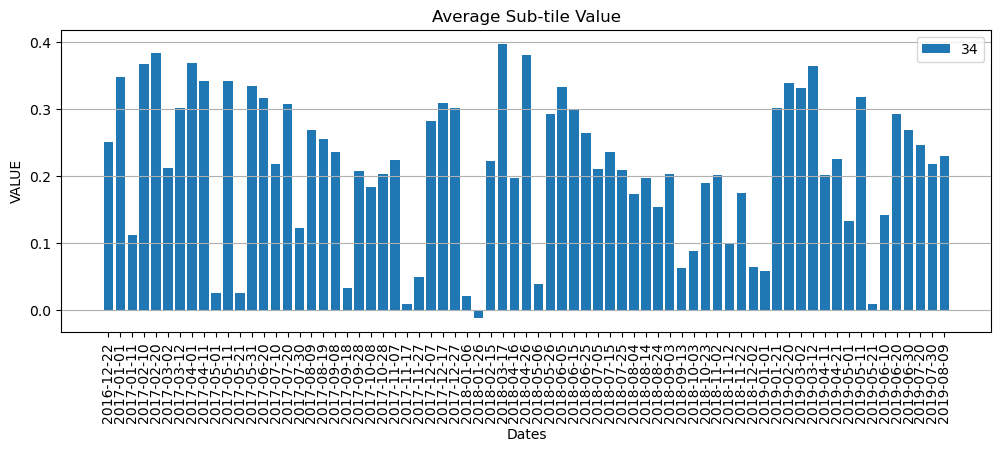

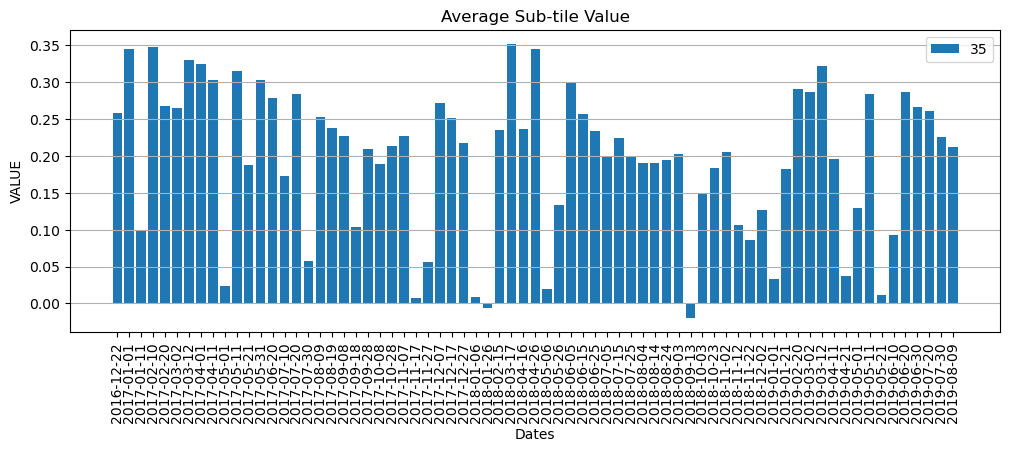

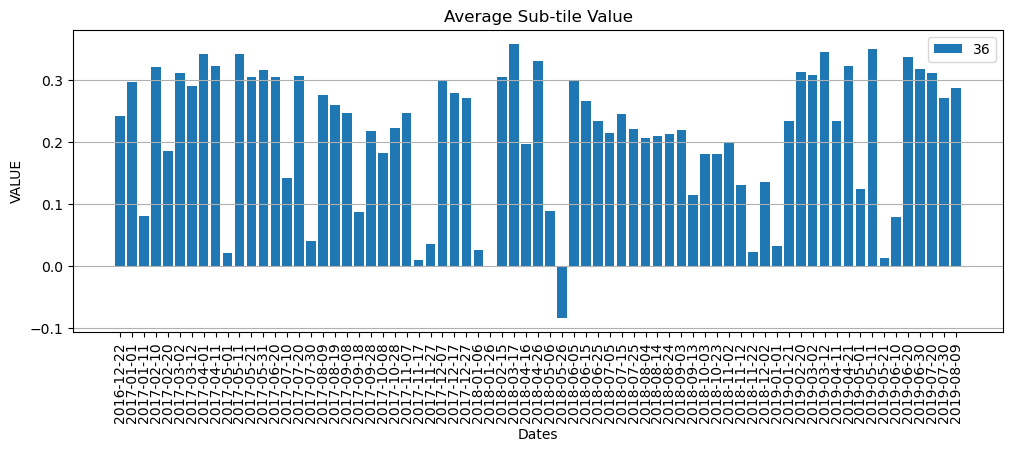

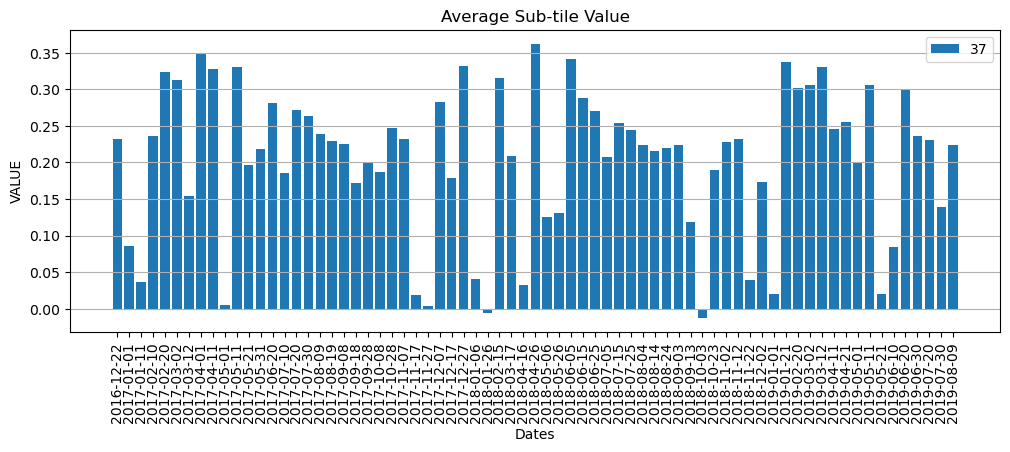

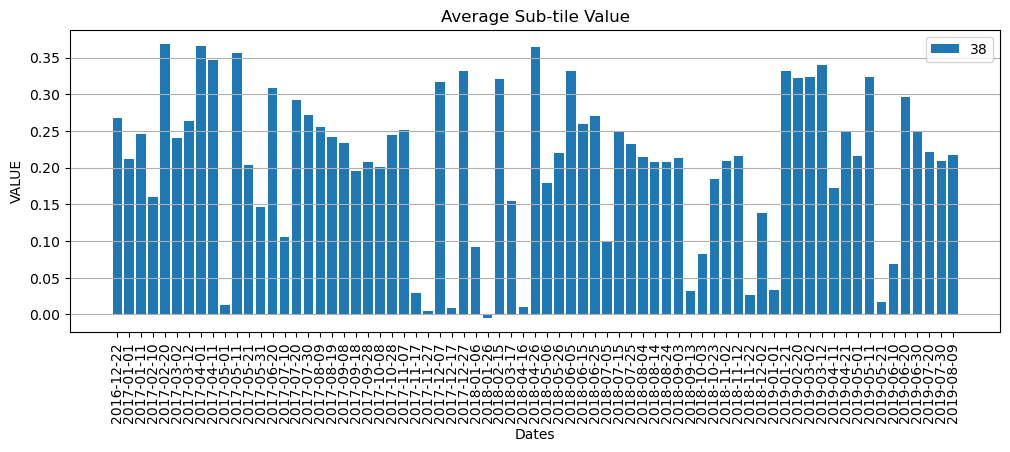

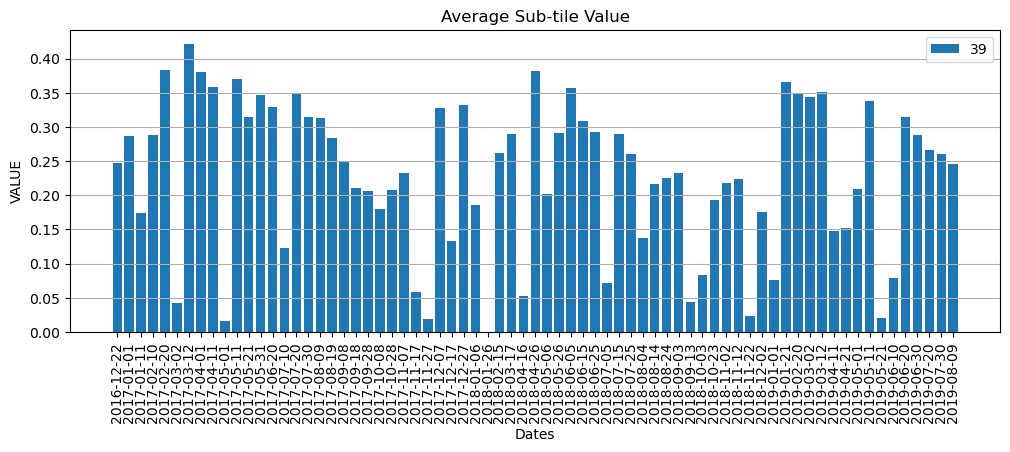

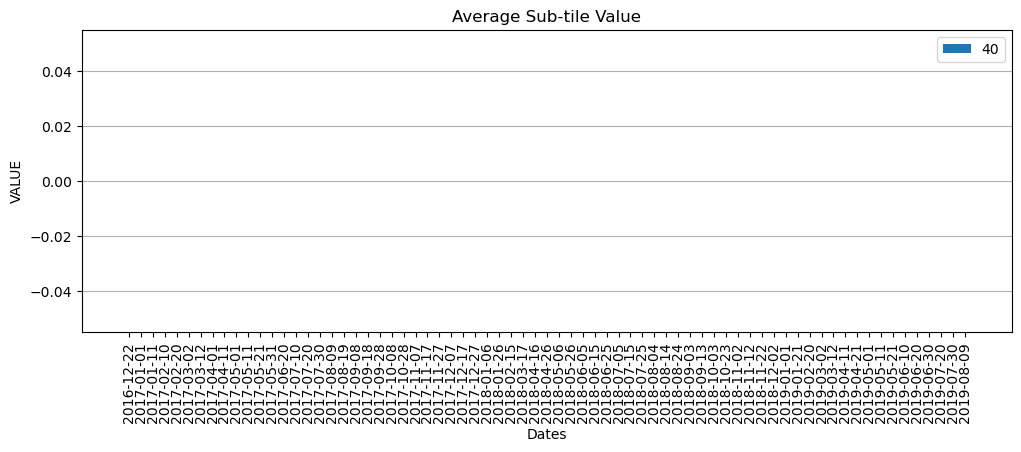

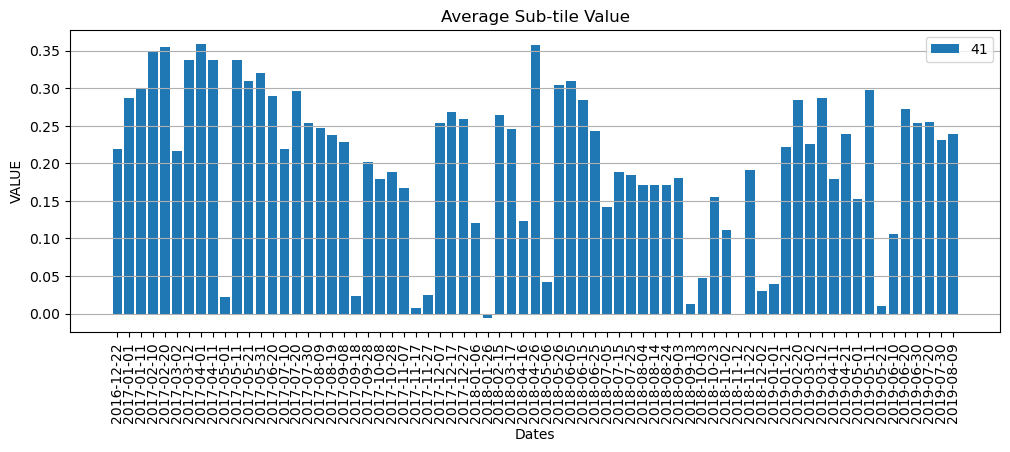

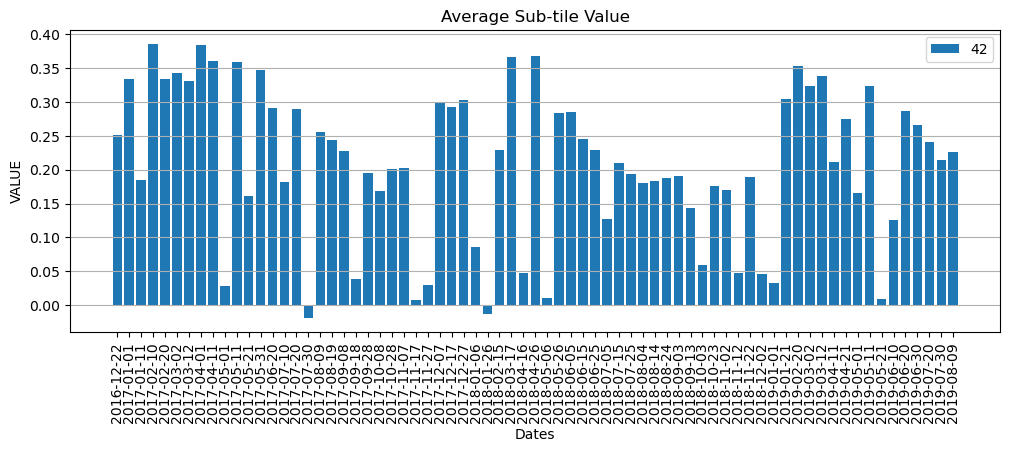

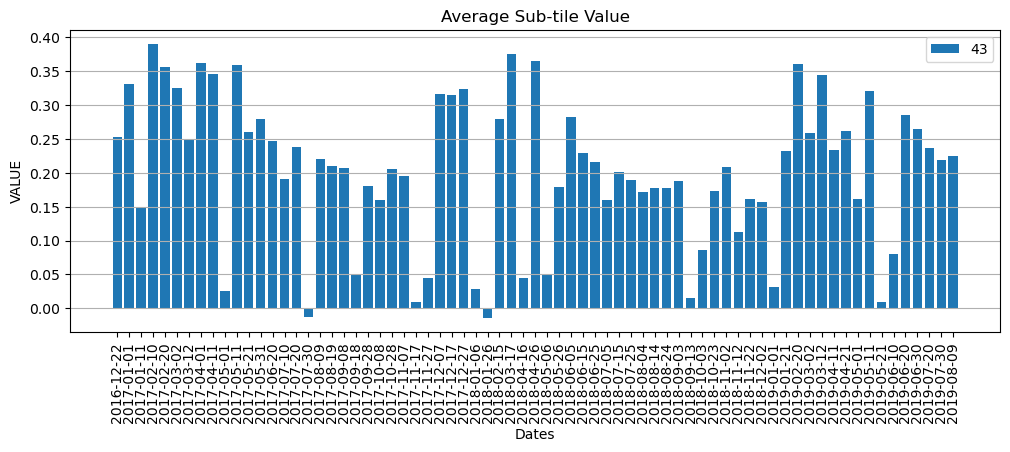

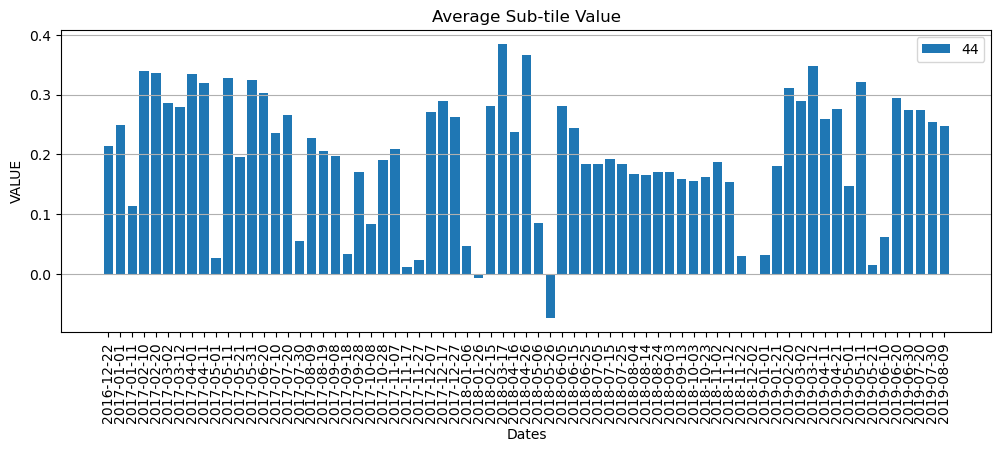

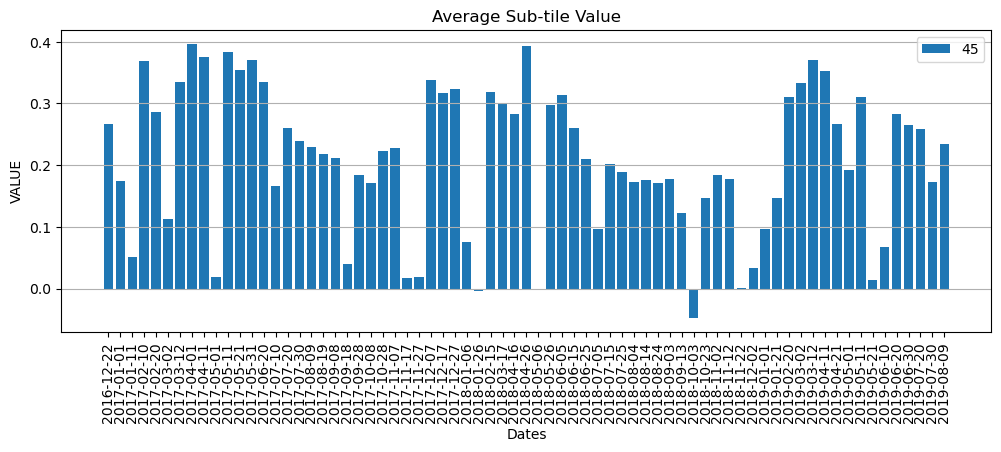

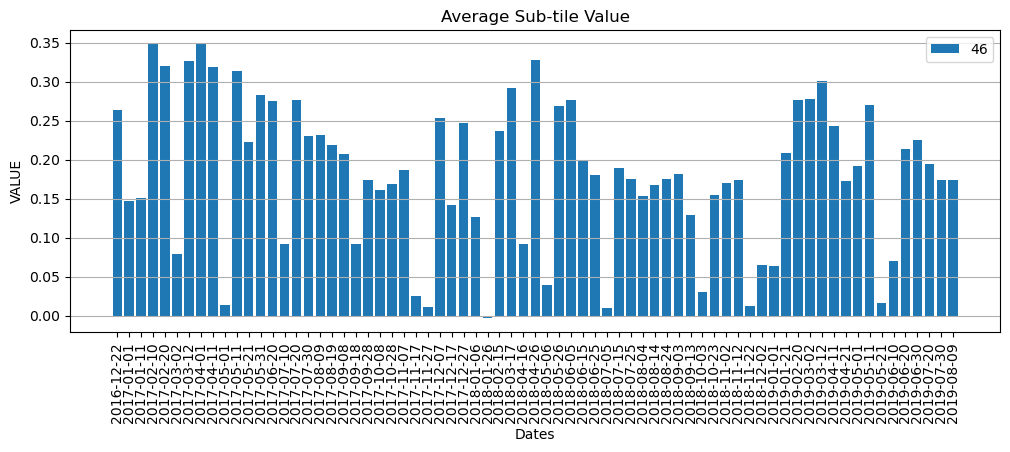

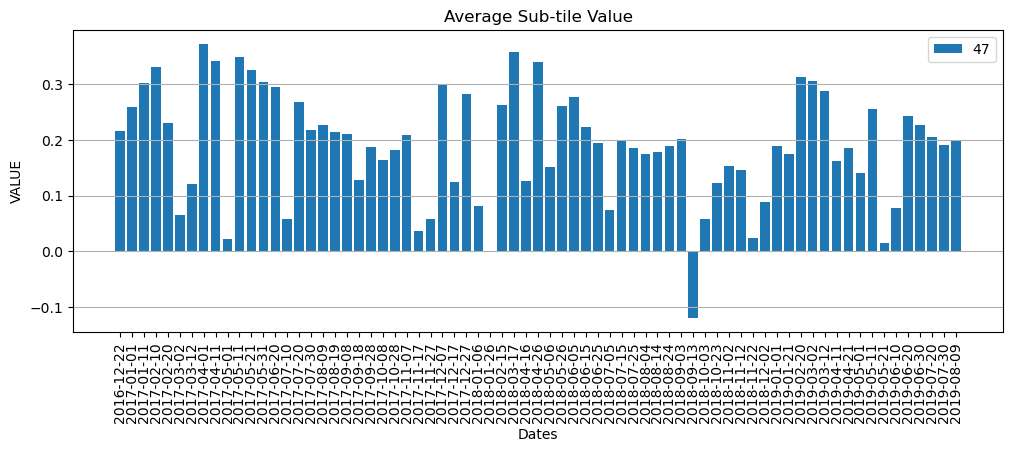

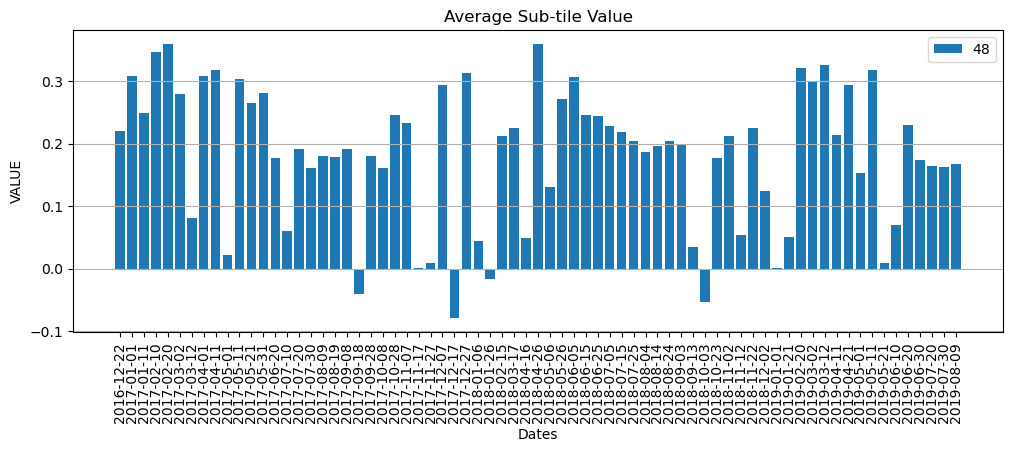

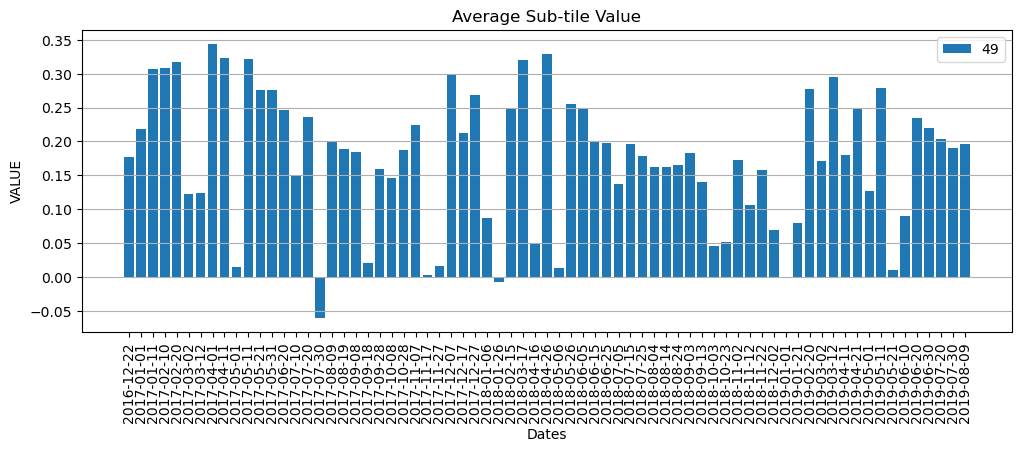

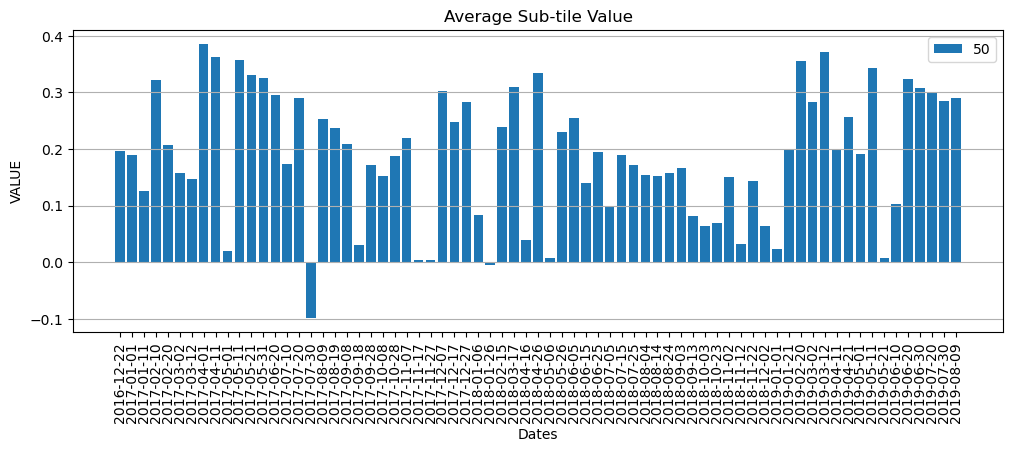

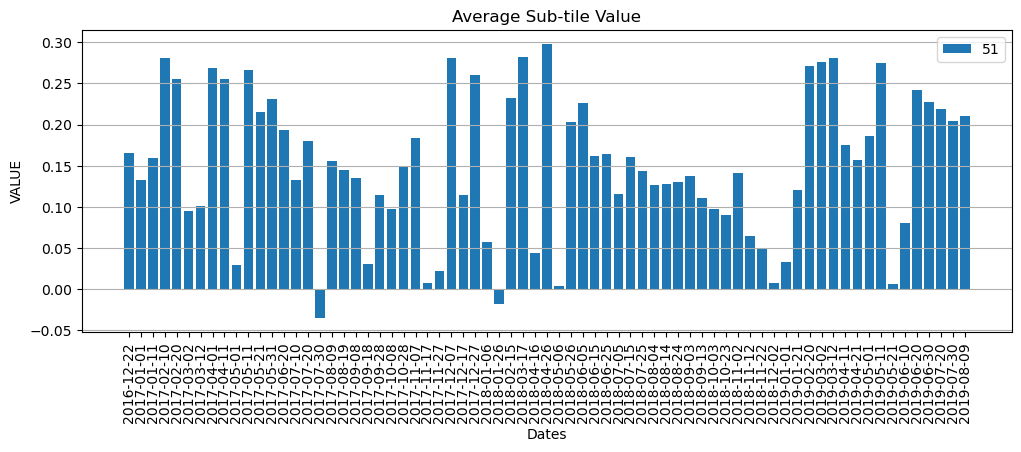

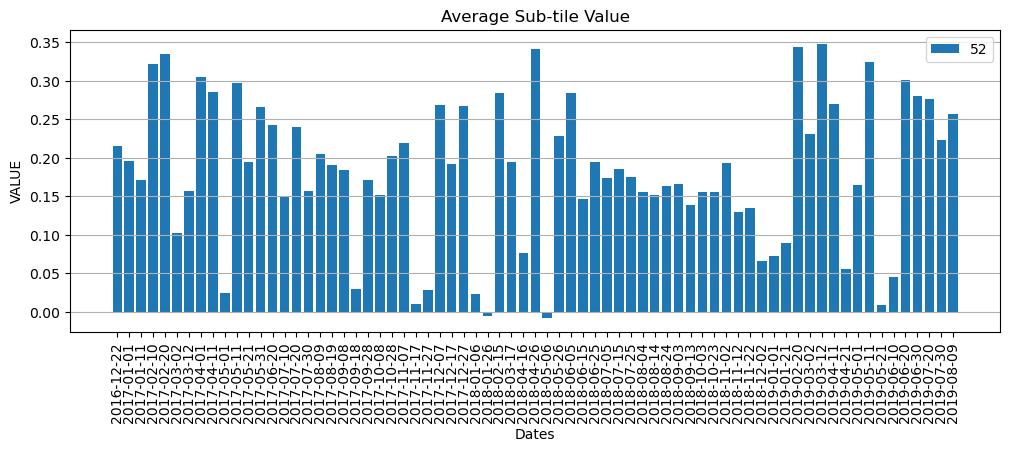

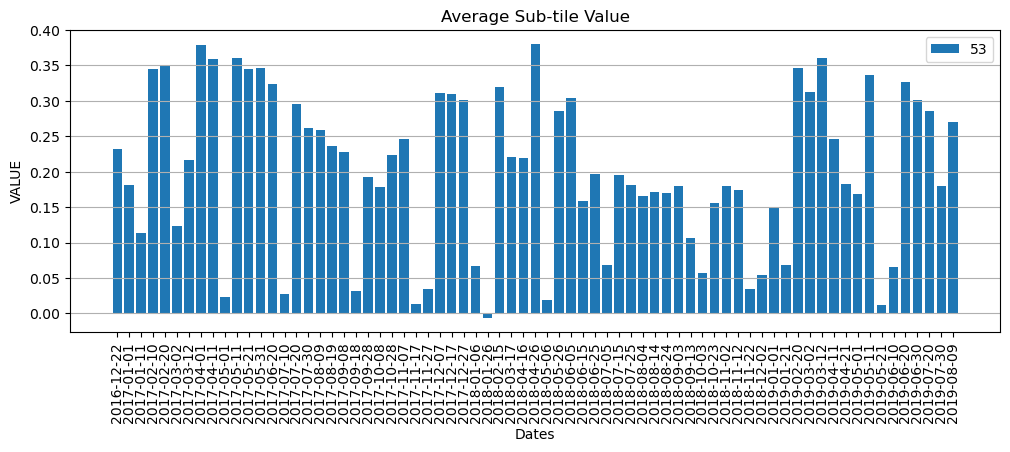

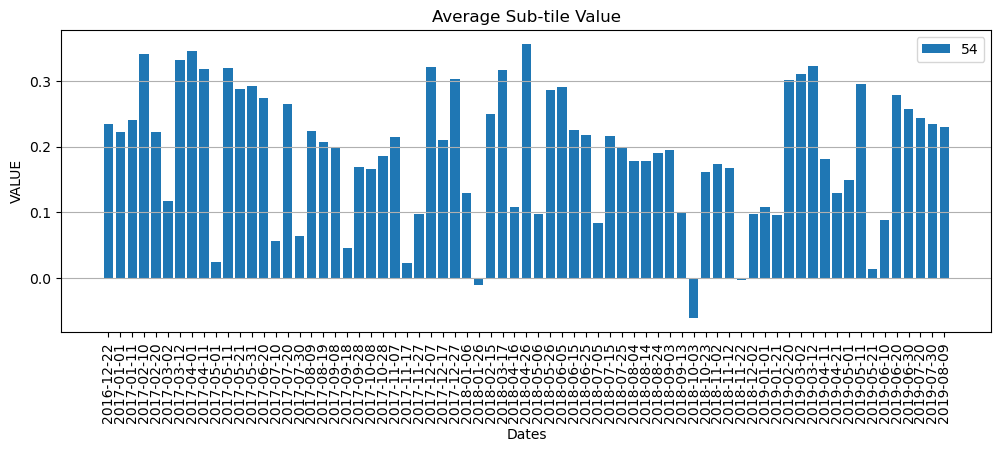

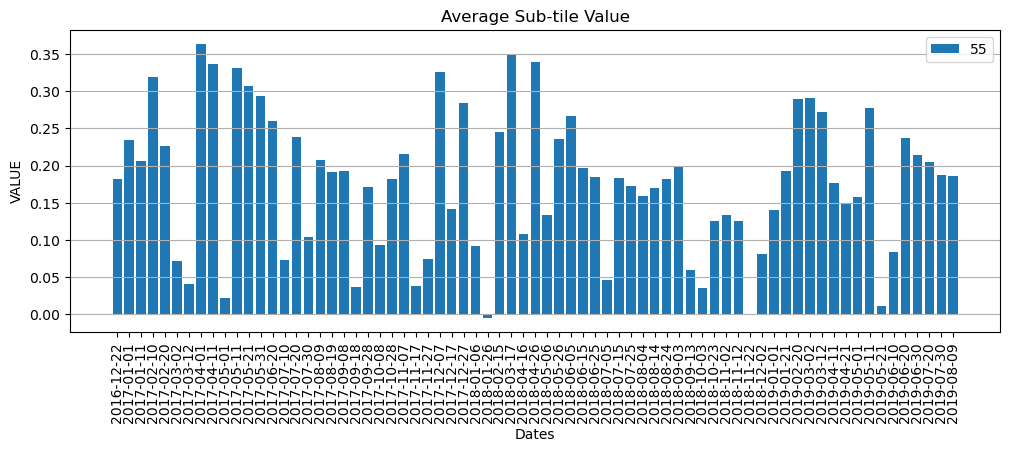

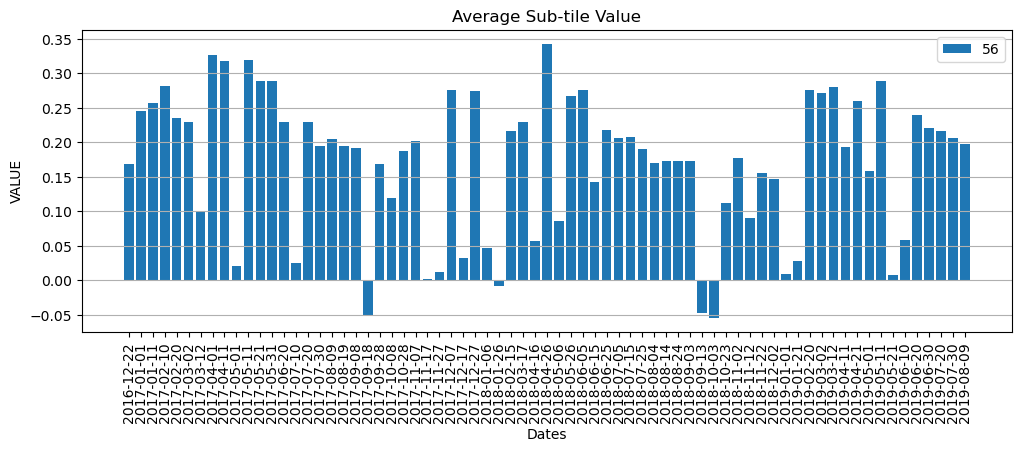

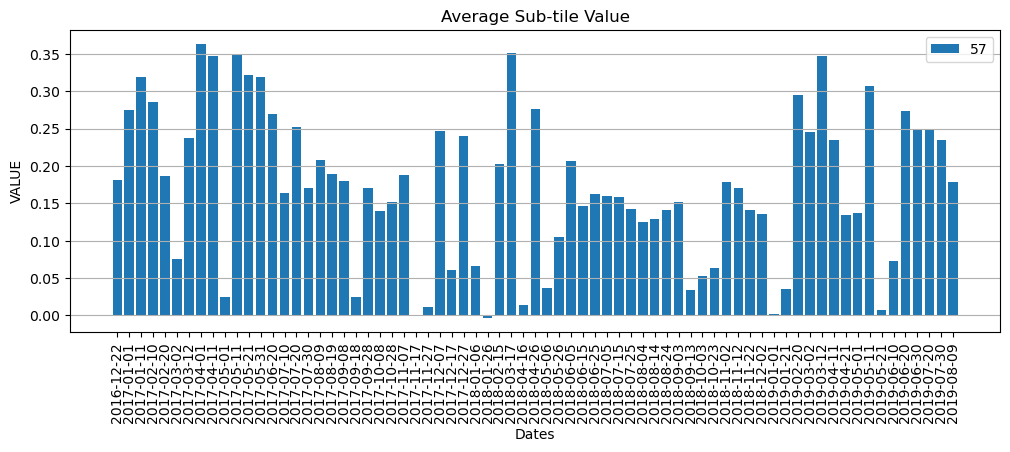

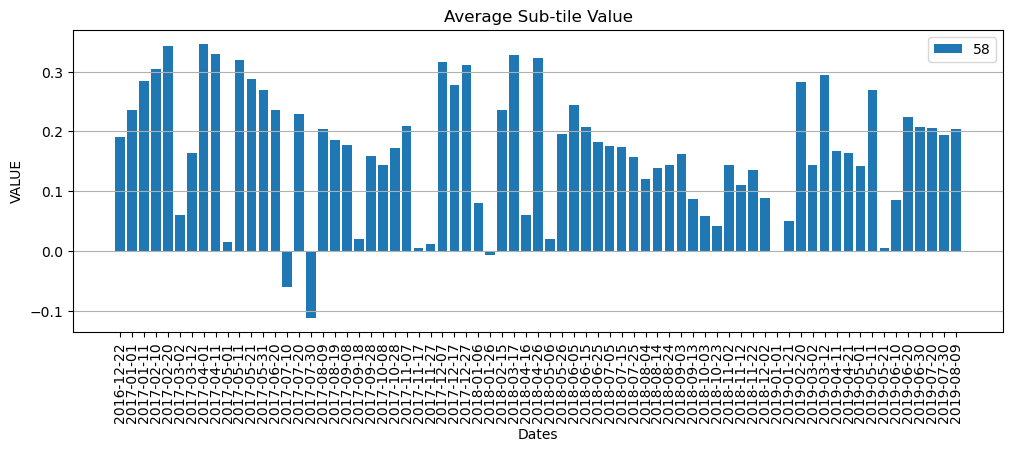

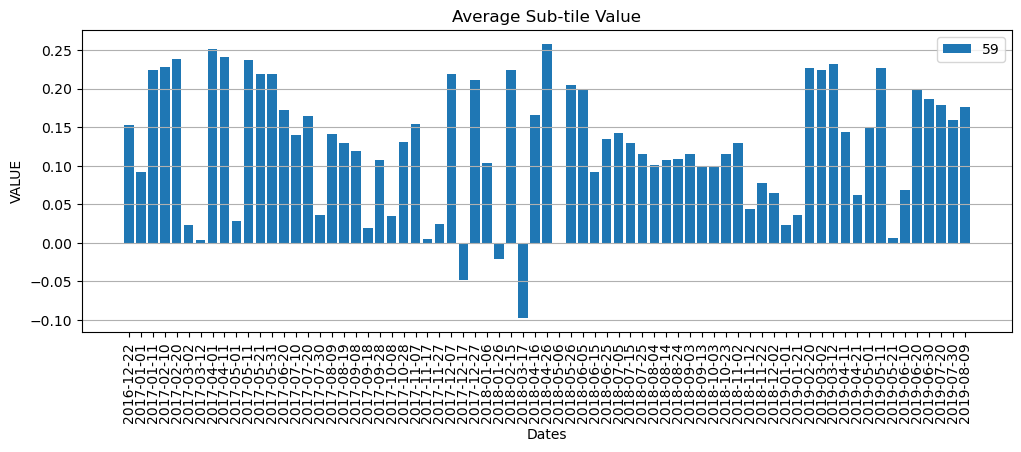

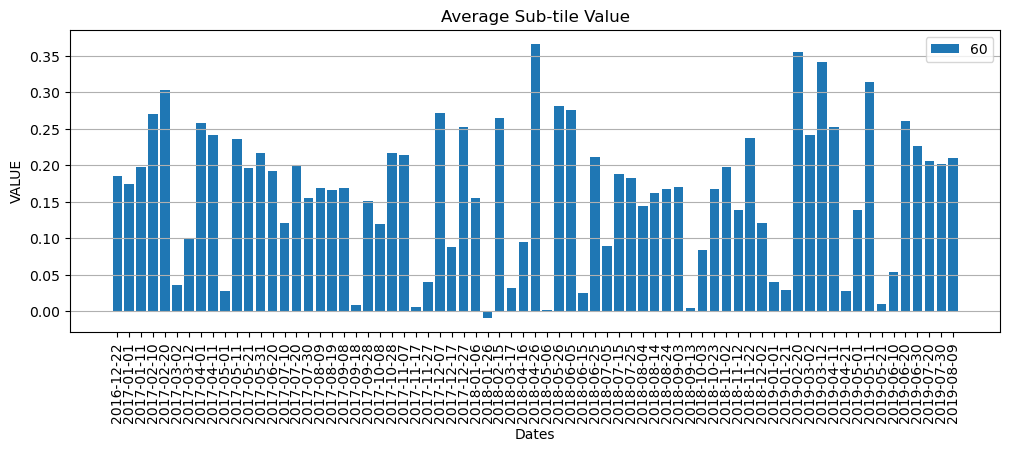

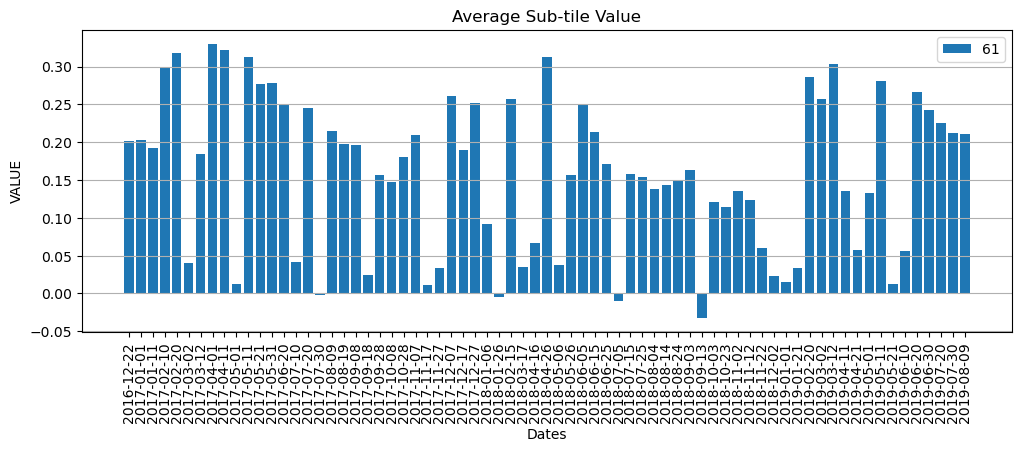

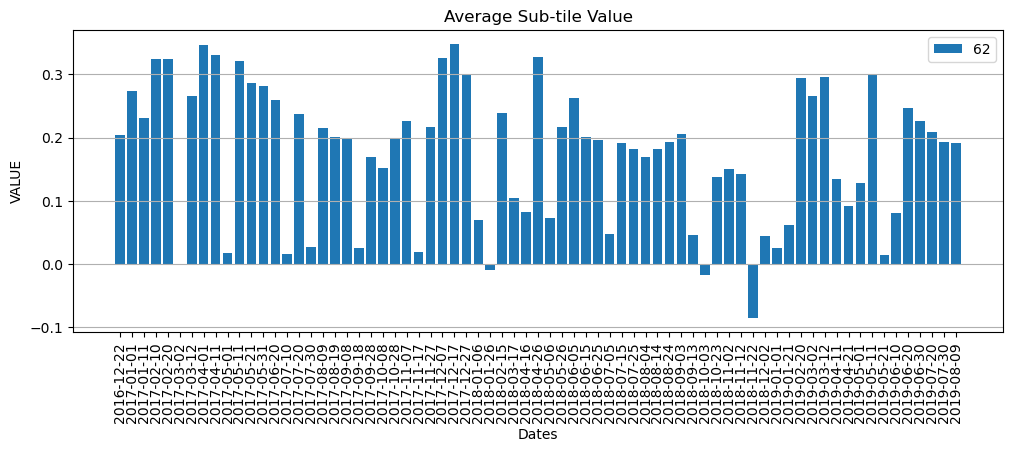

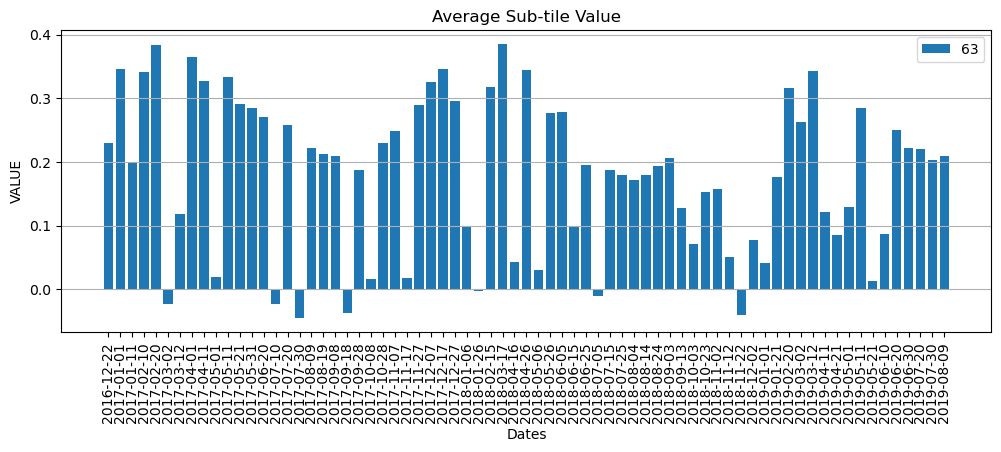

In [35]:
# ENVDIS
plot_field_average(envdis,4)

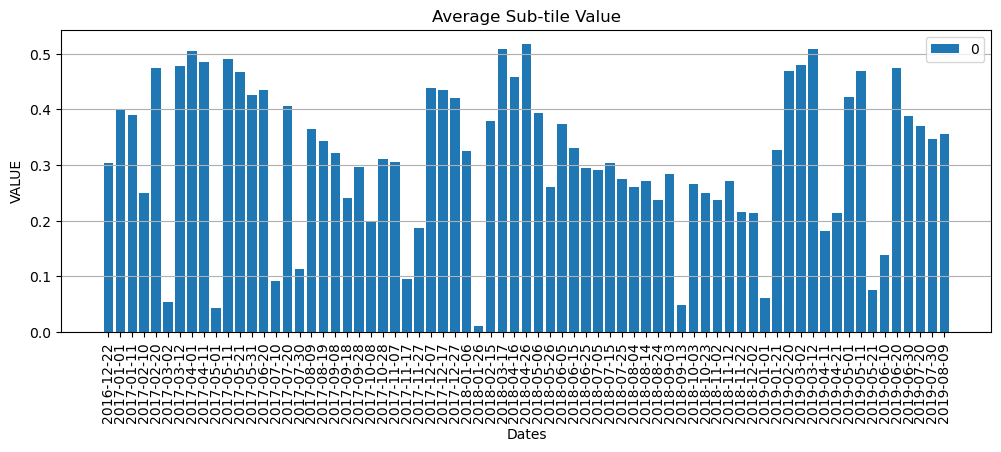

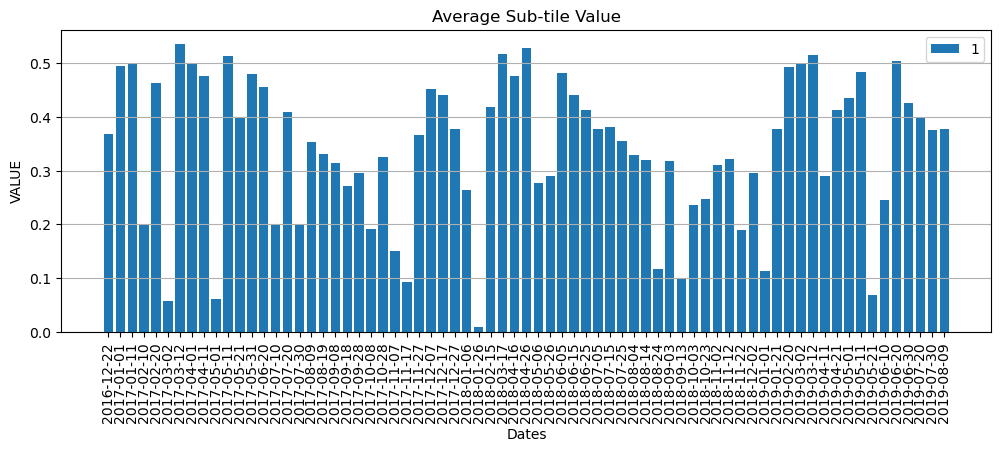

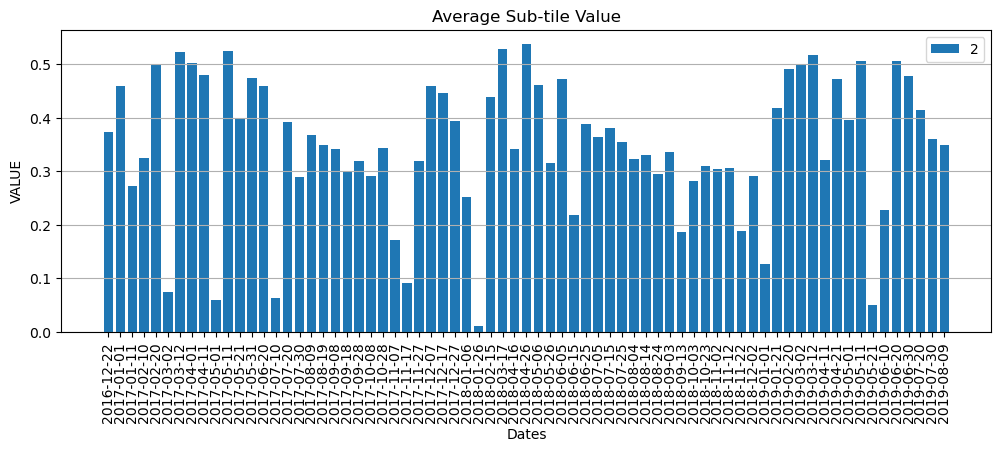

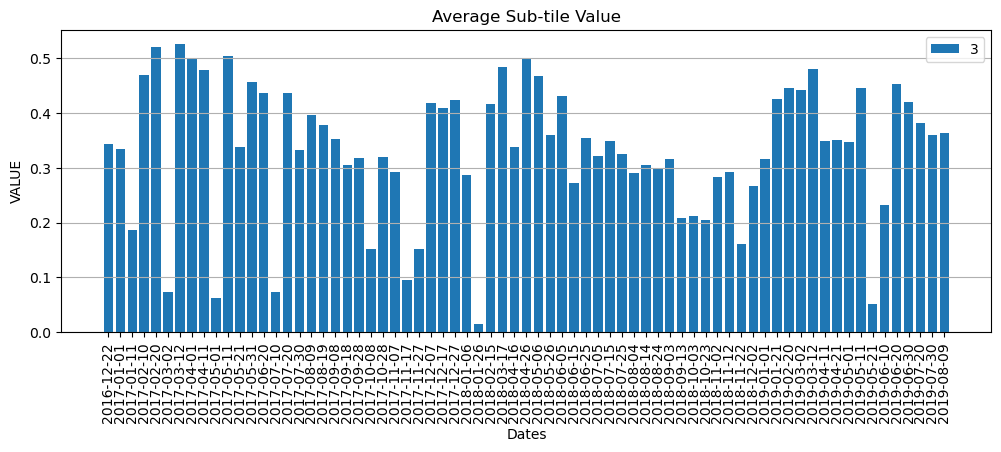

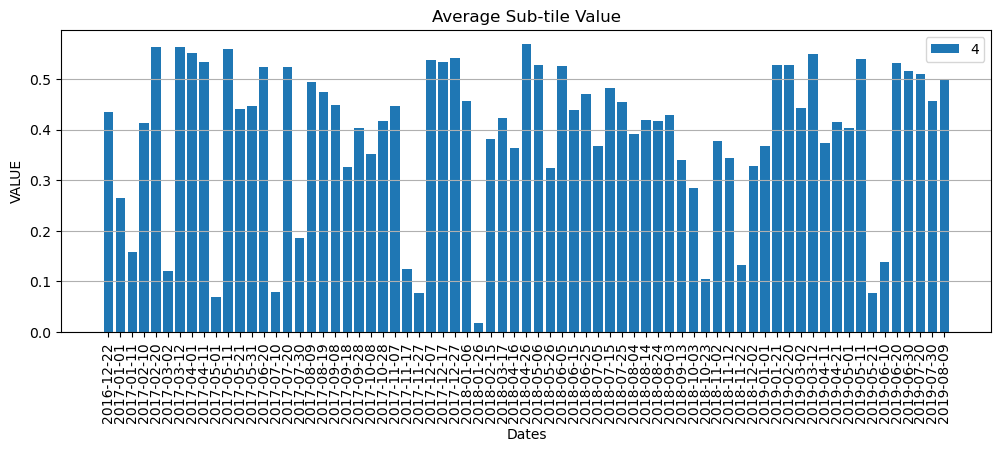

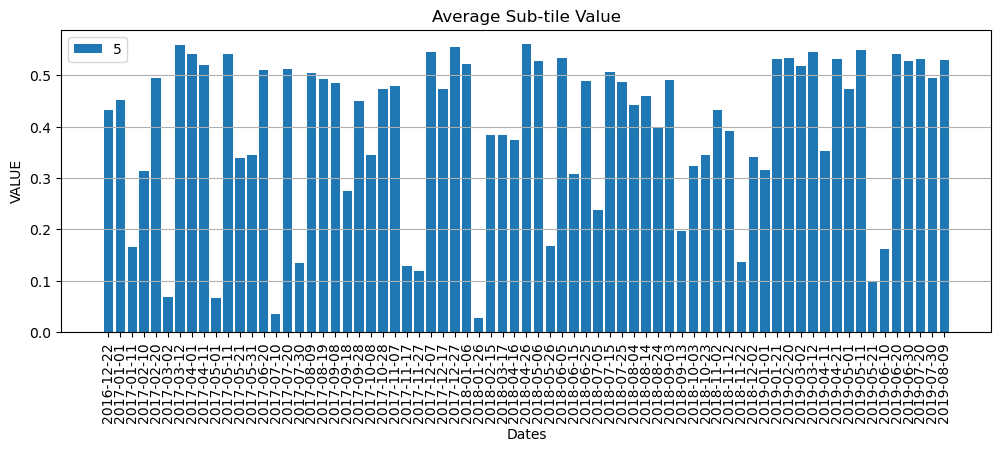

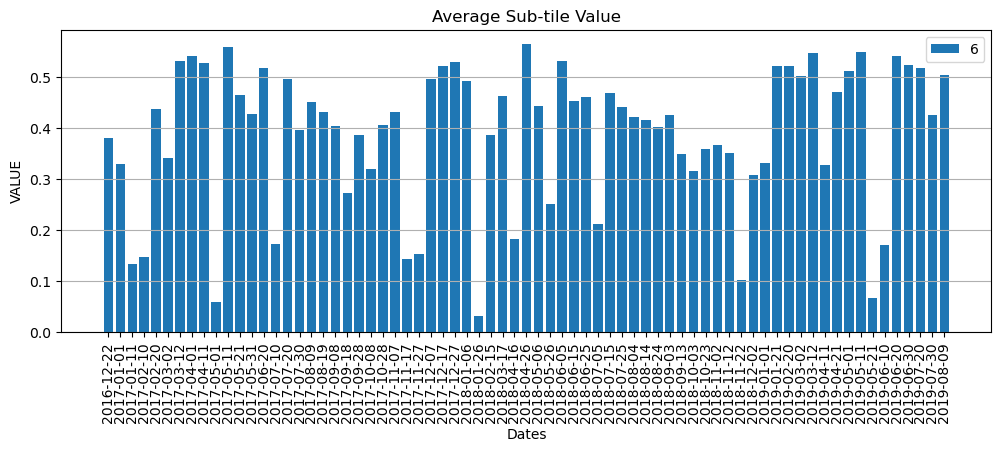

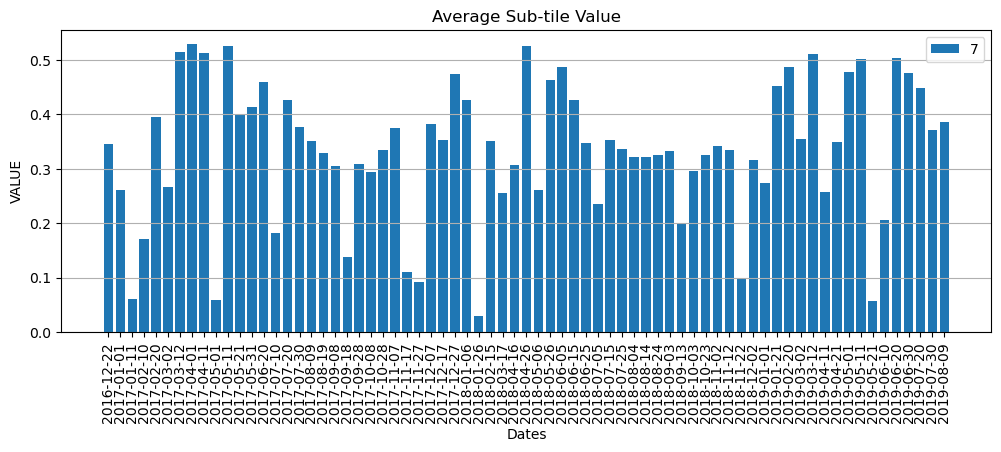

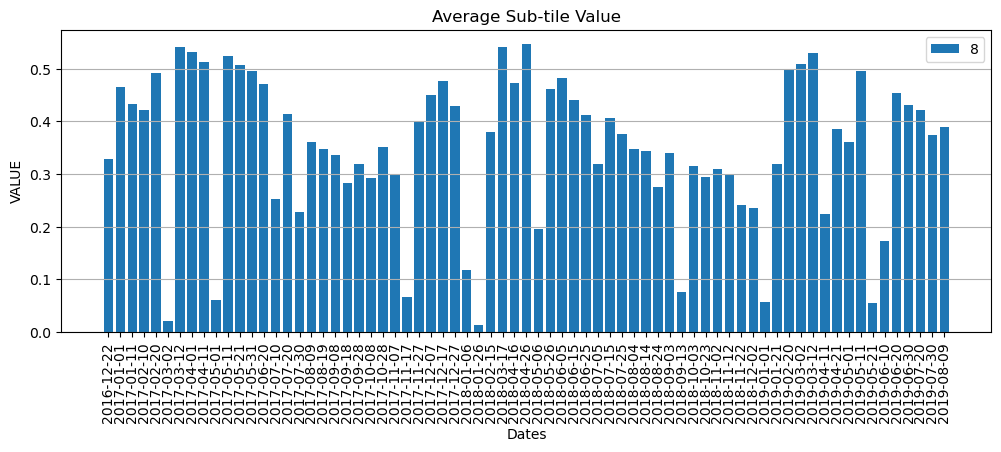

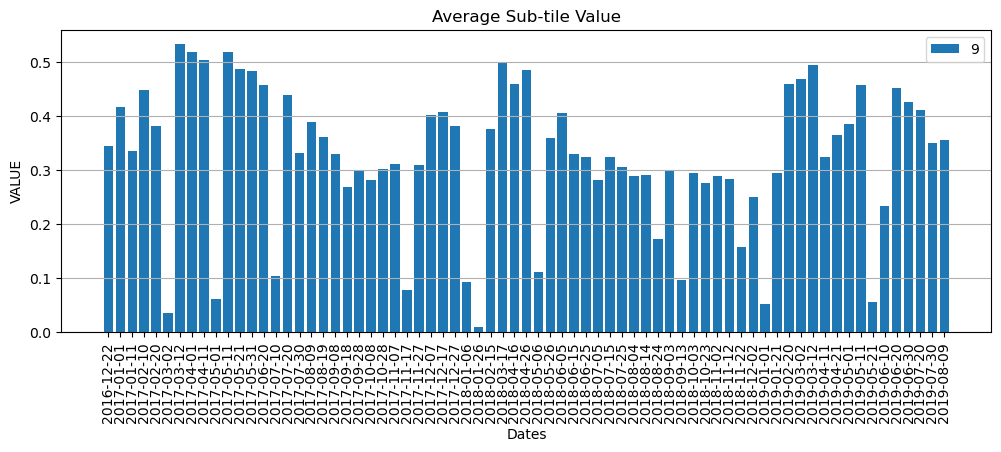

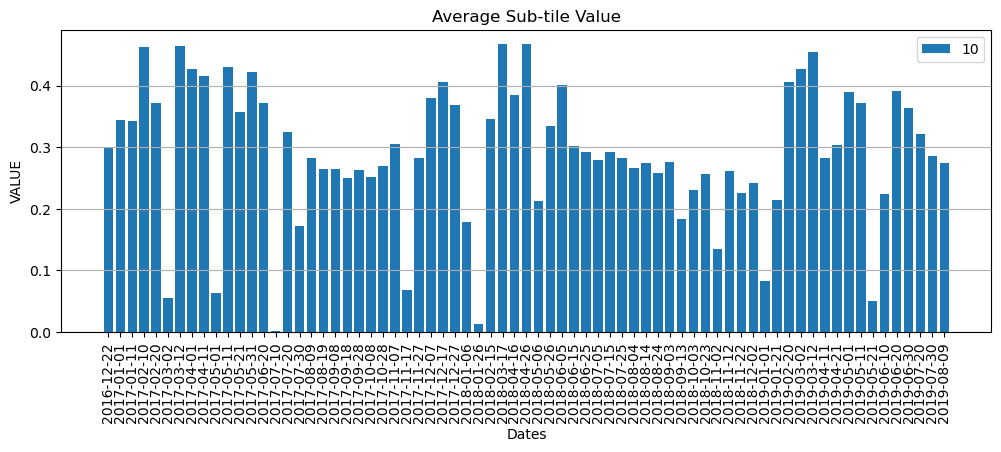

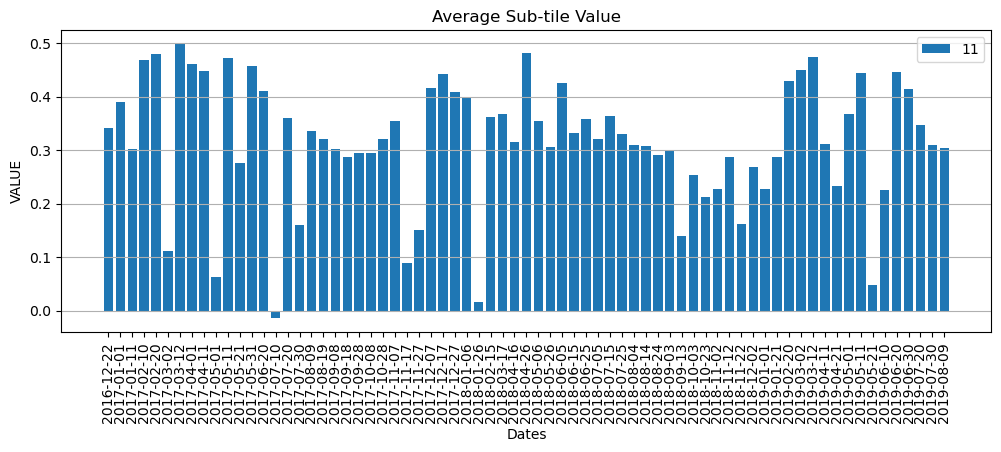

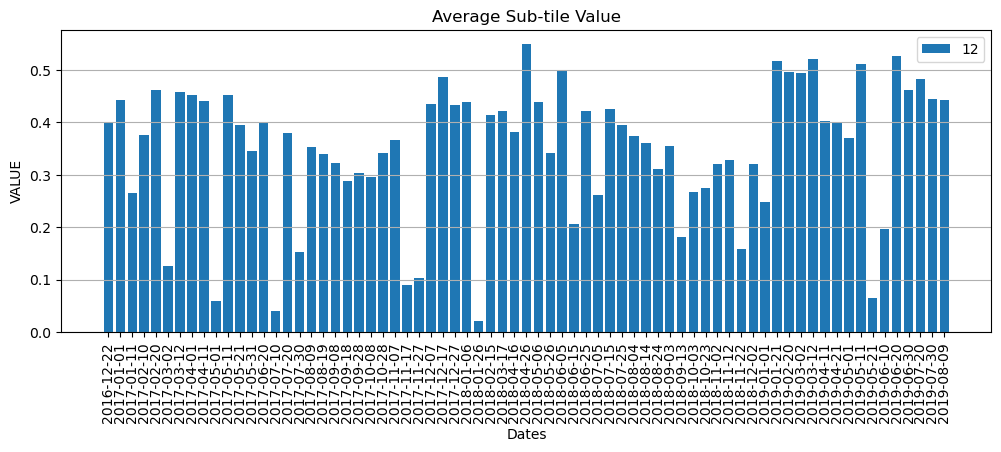

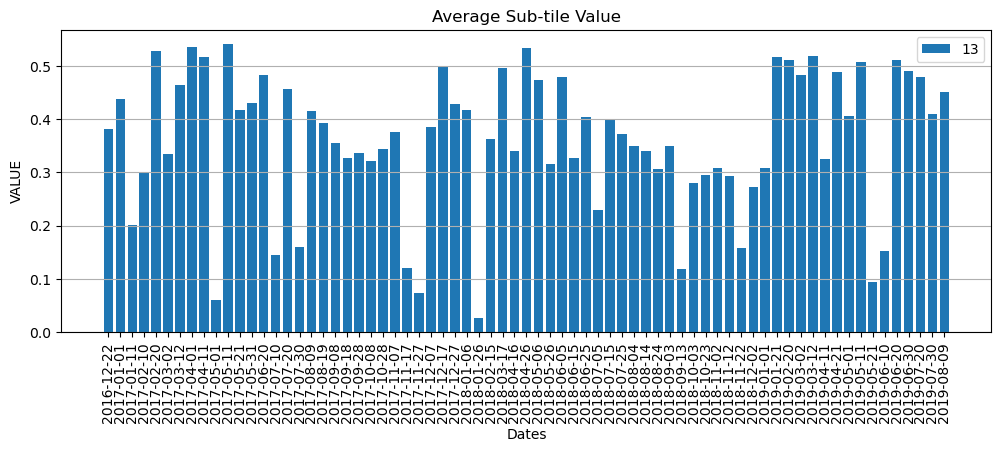

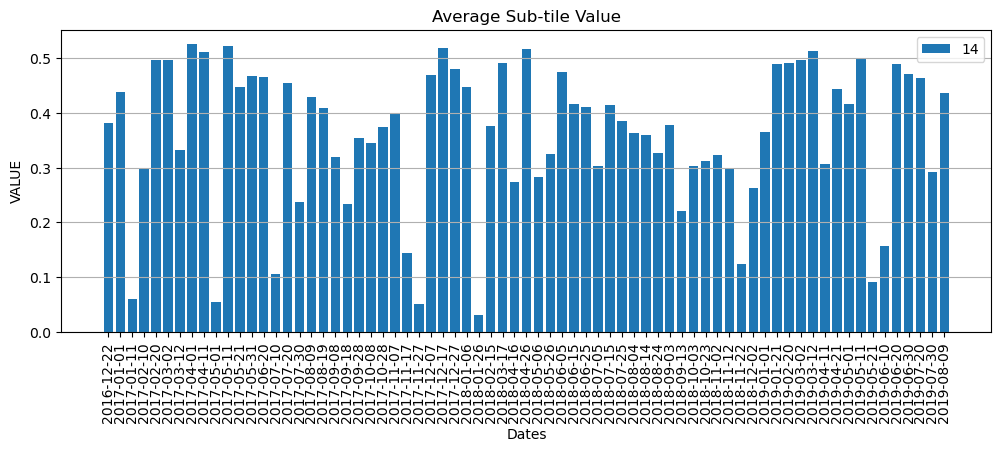

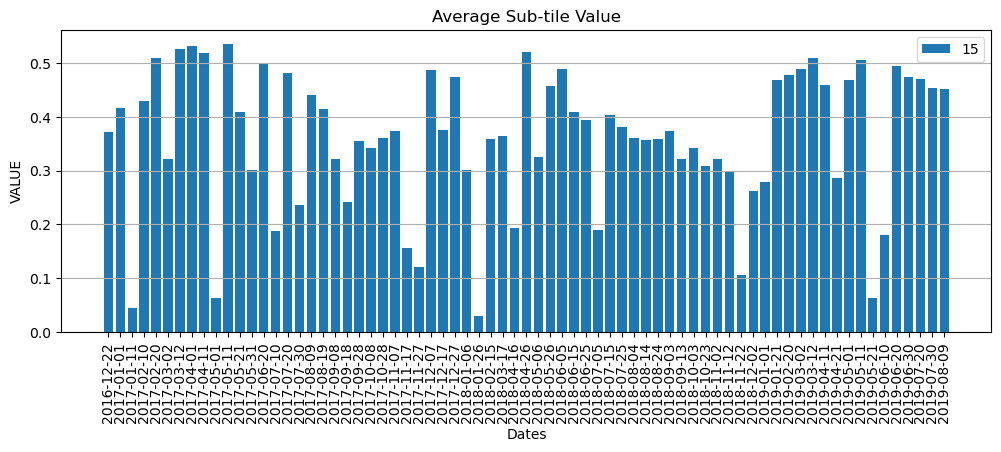

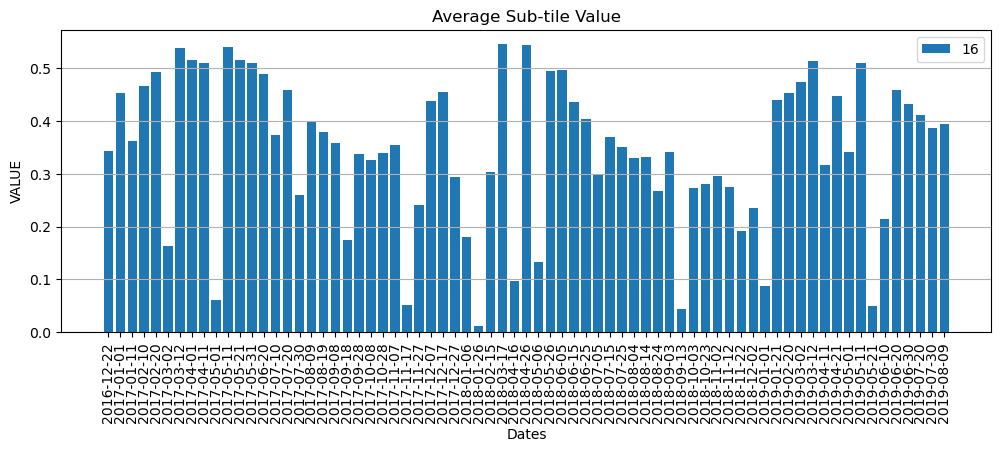

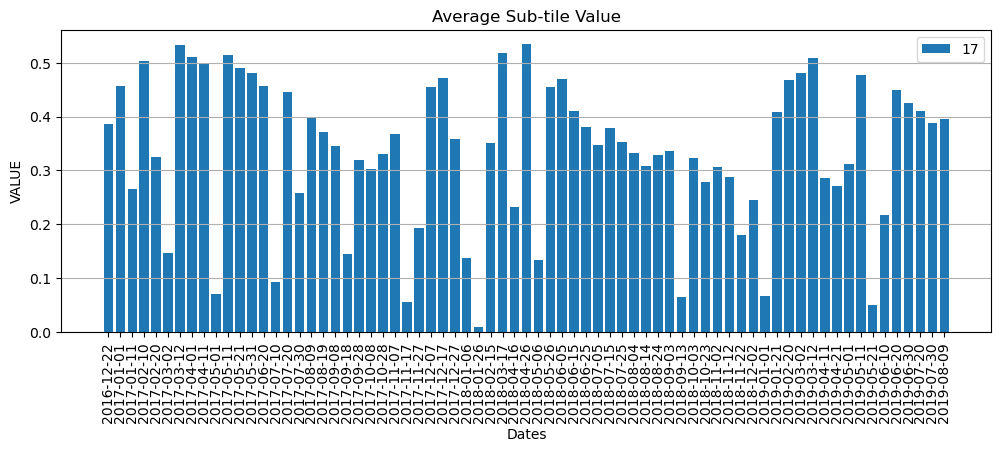

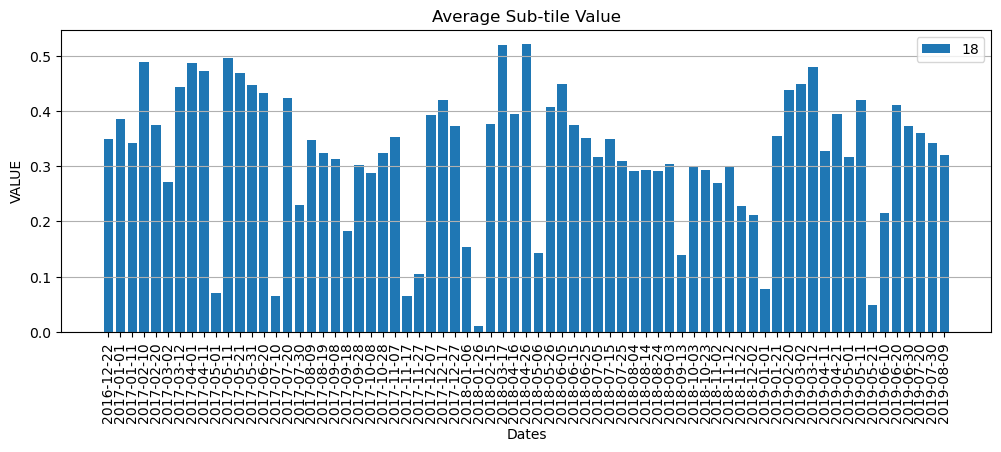

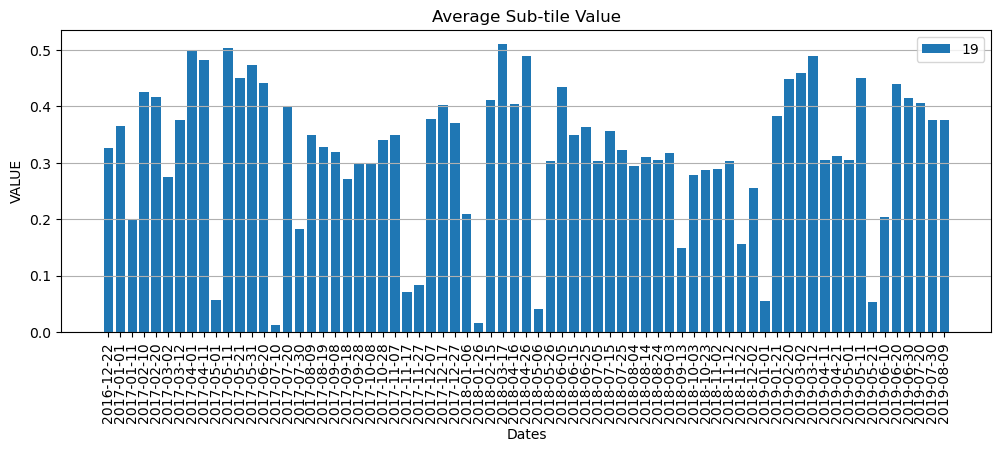

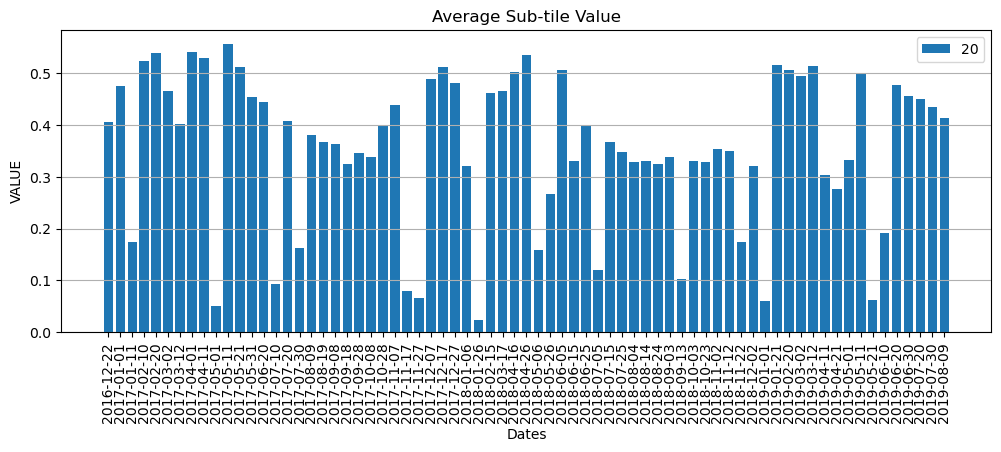

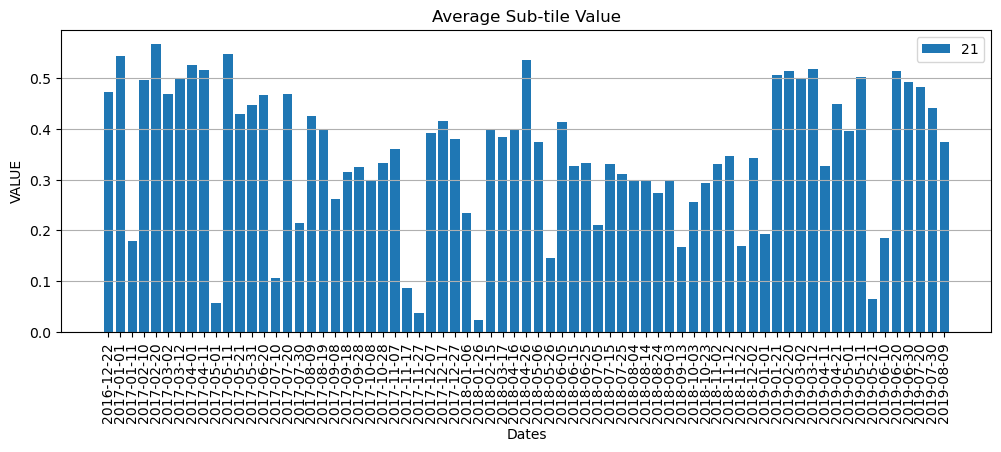

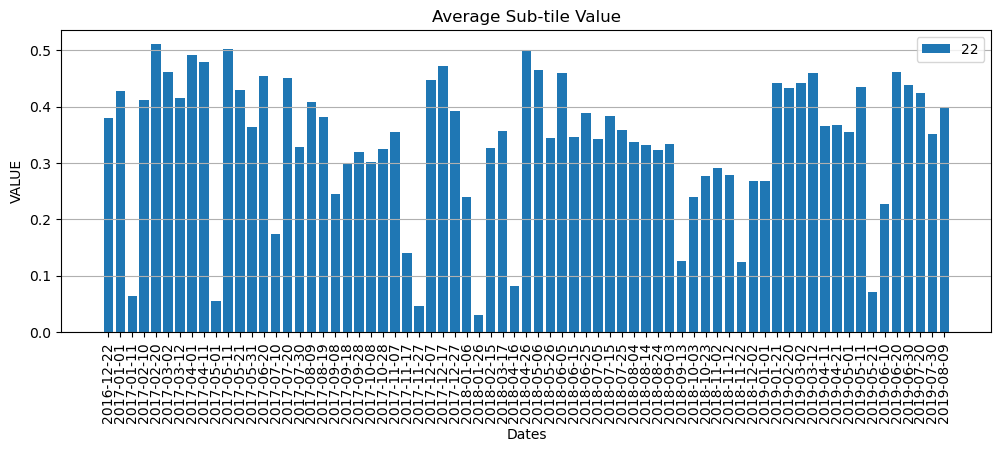

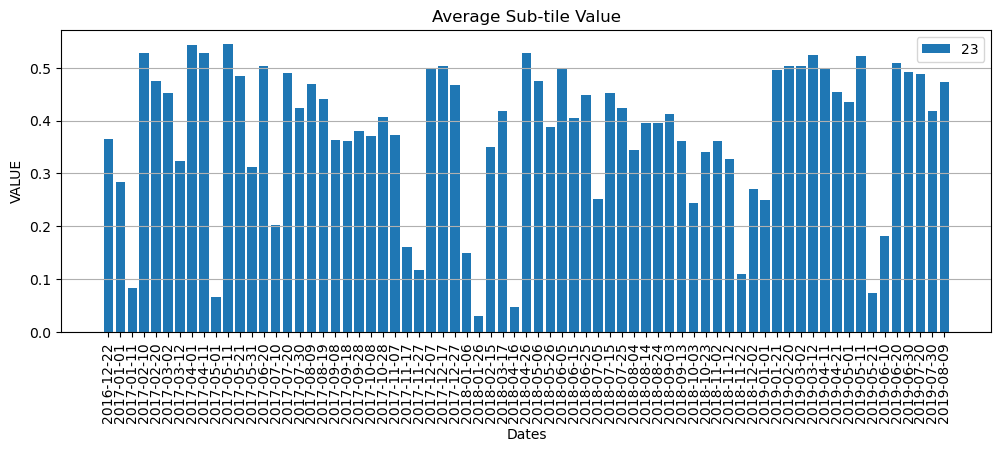

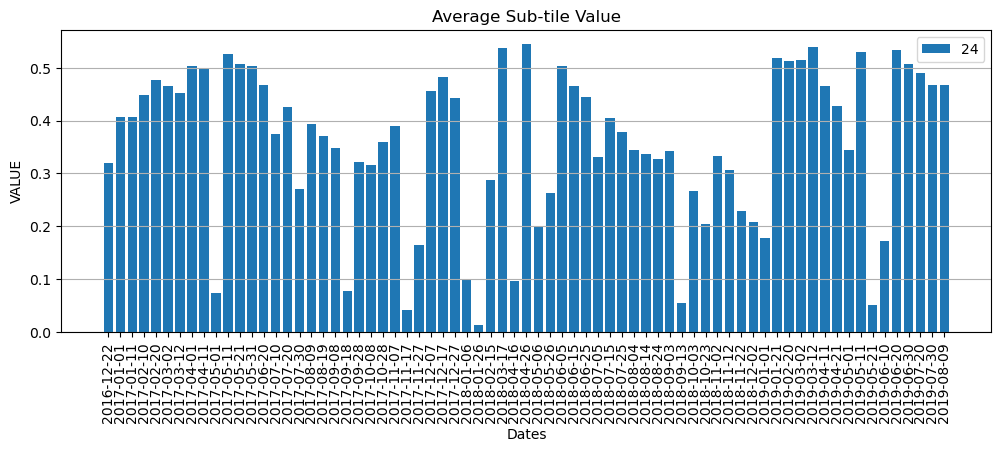

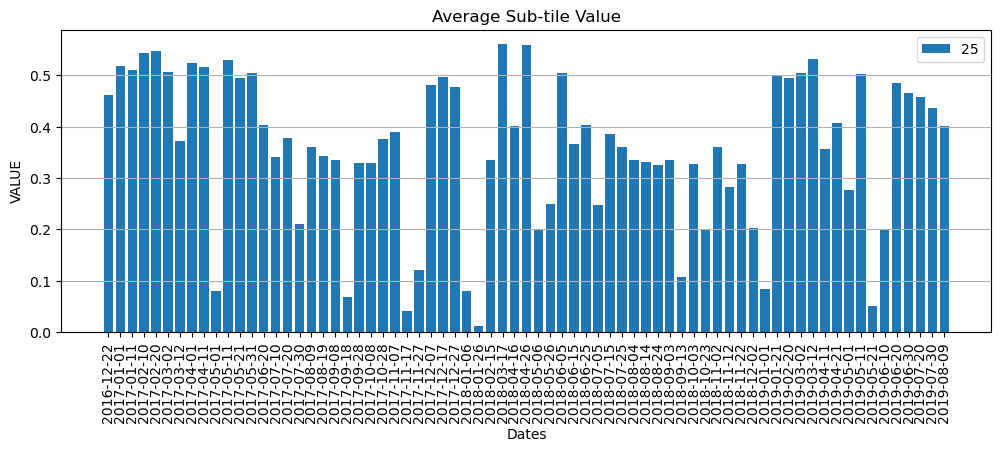

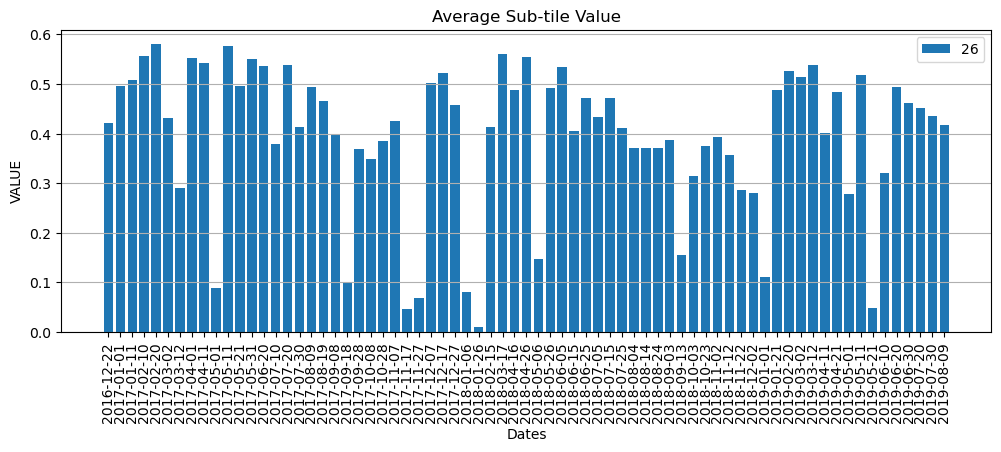

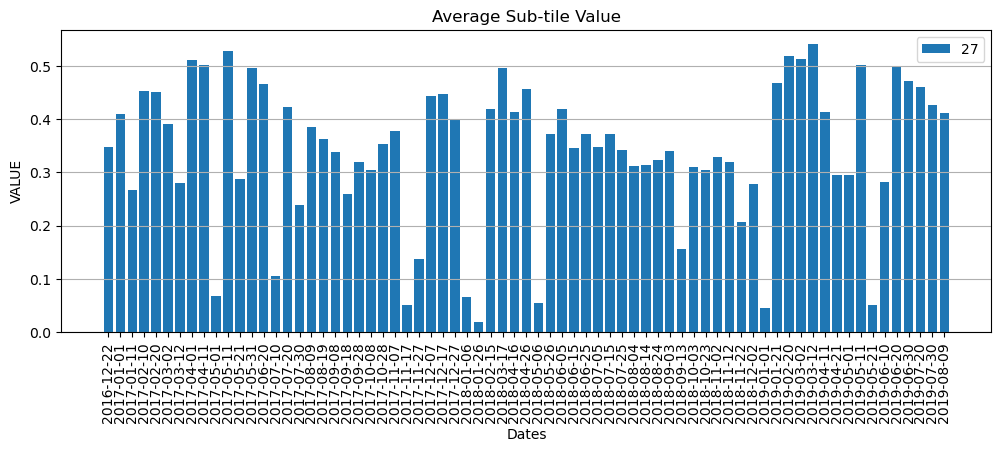

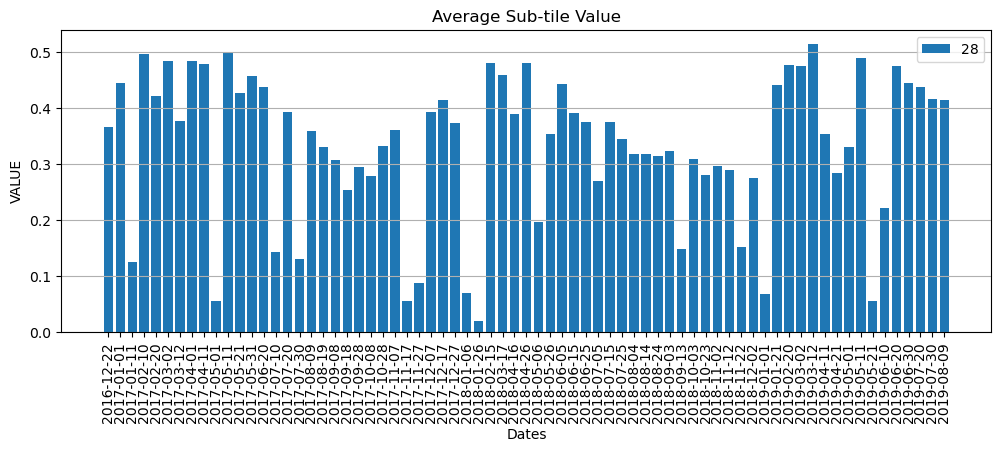

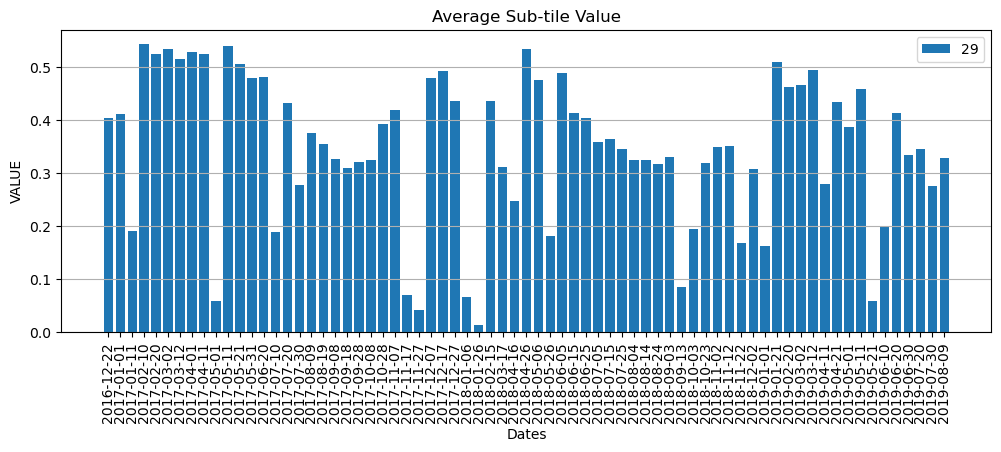

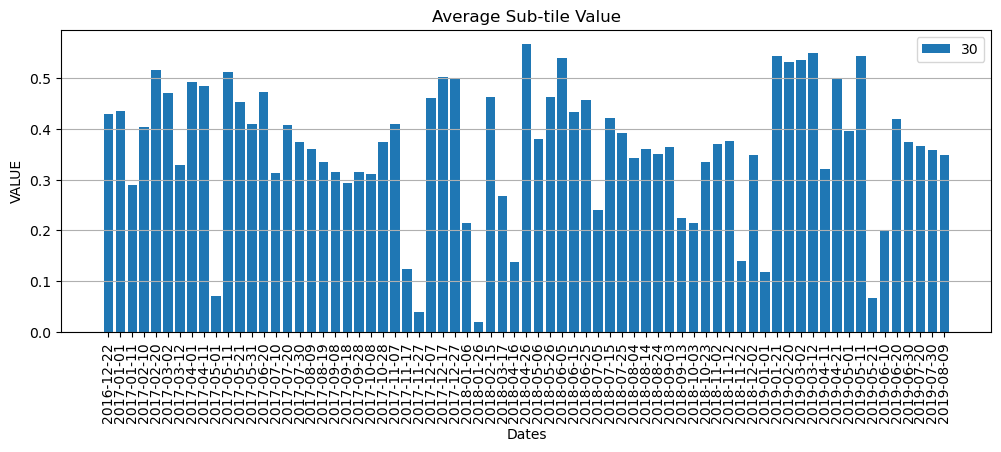

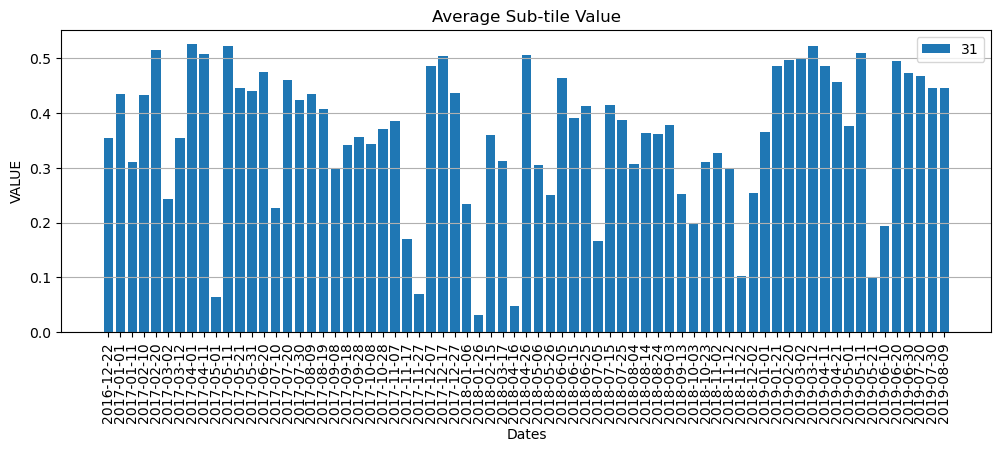

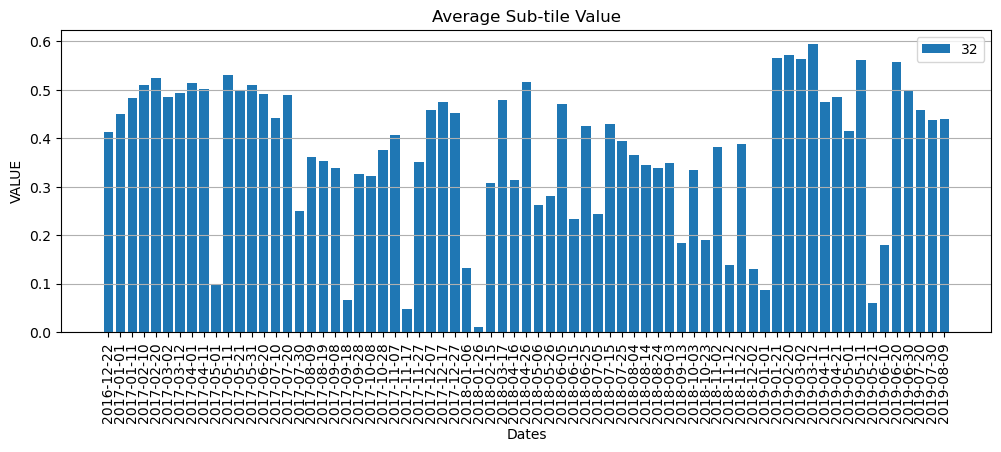

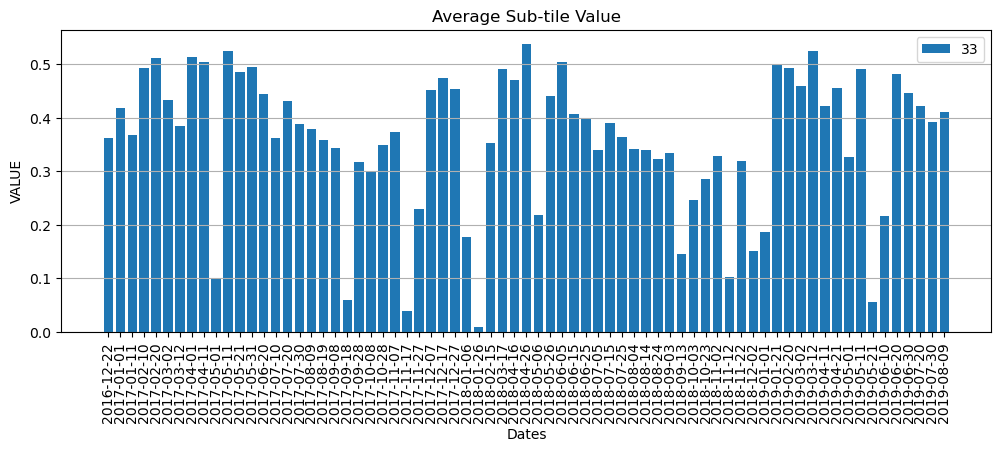

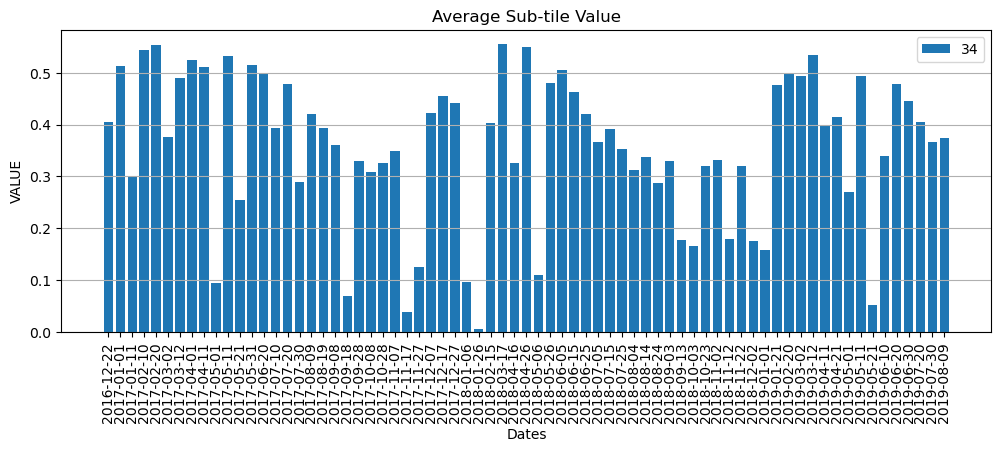

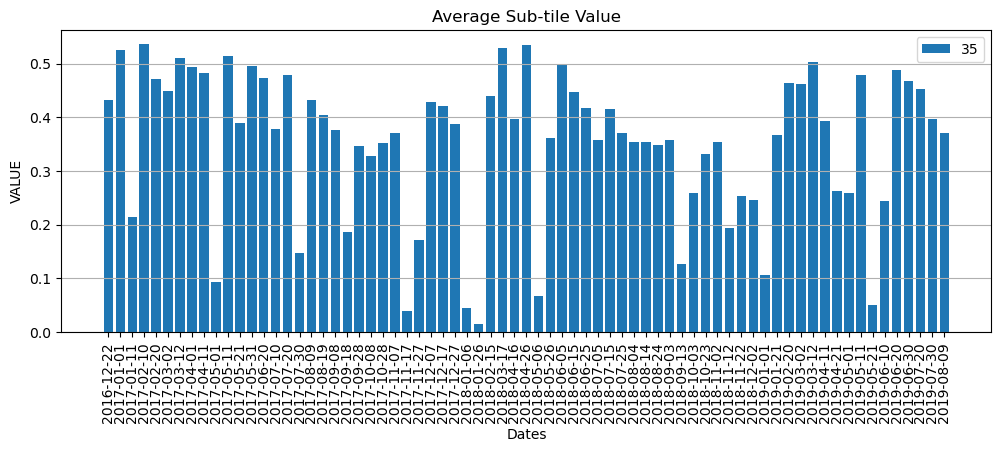

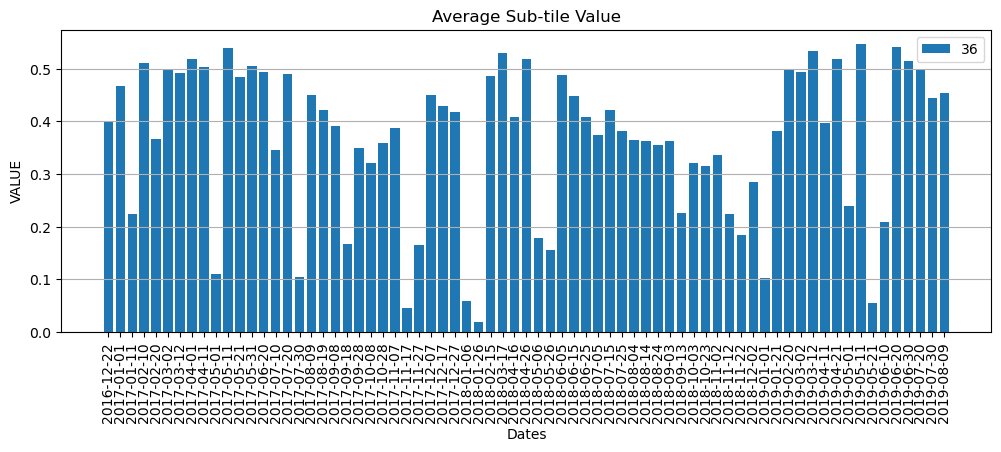

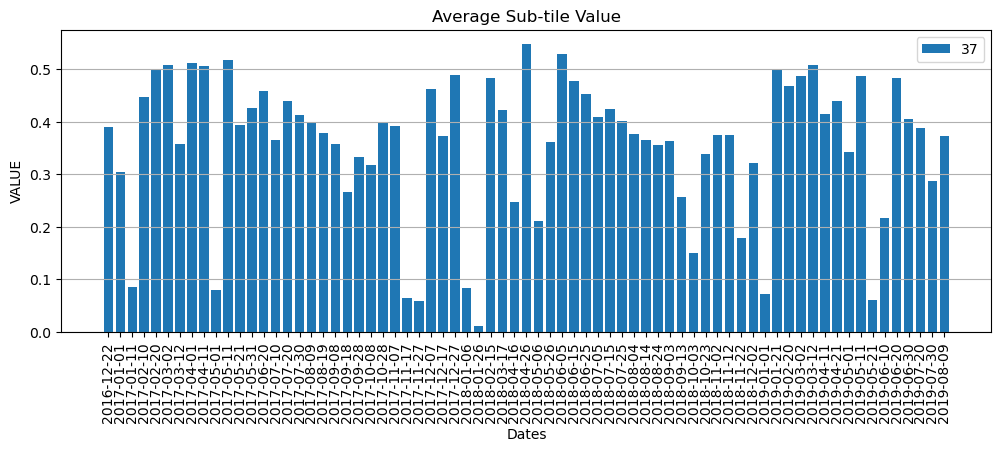

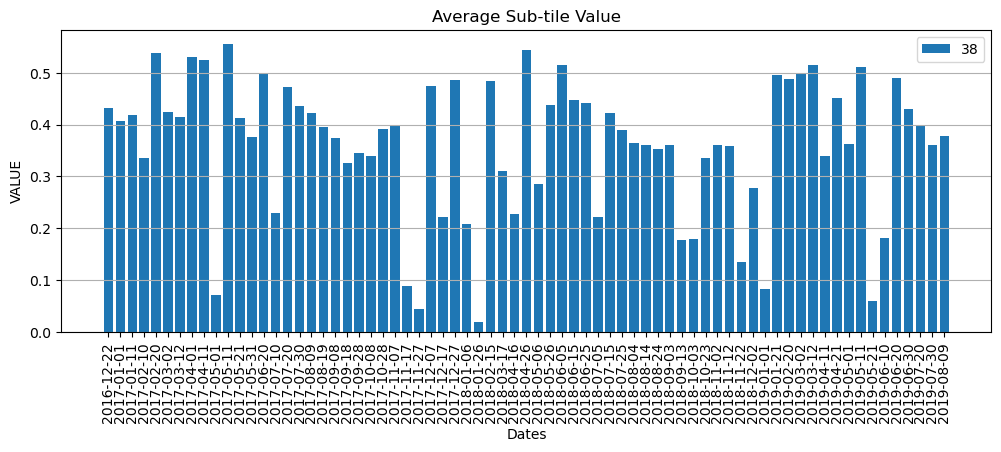

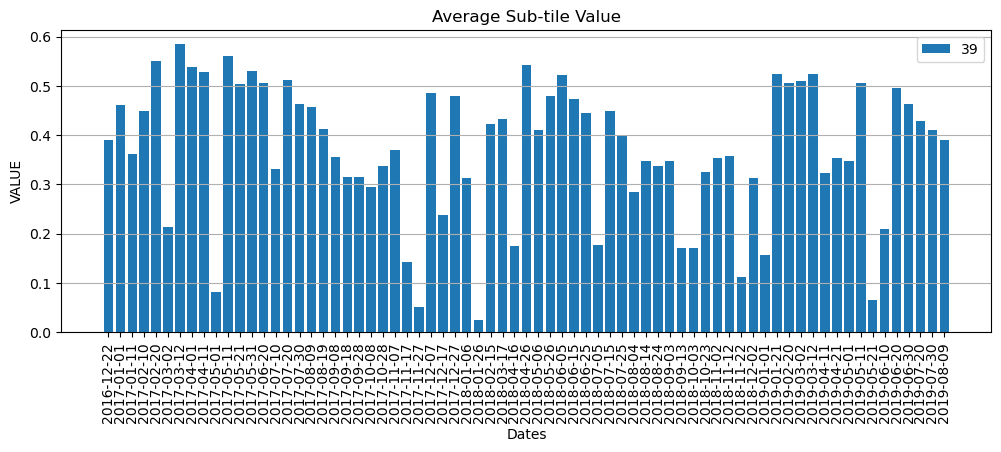

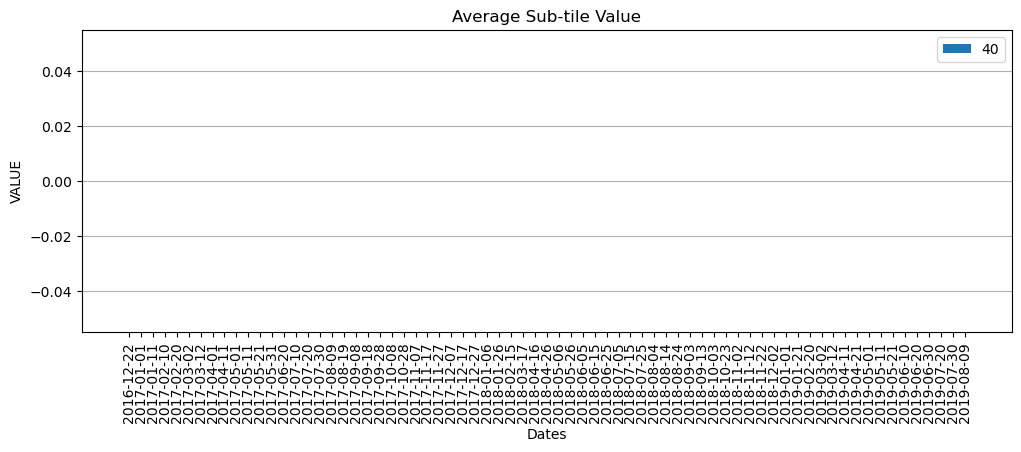

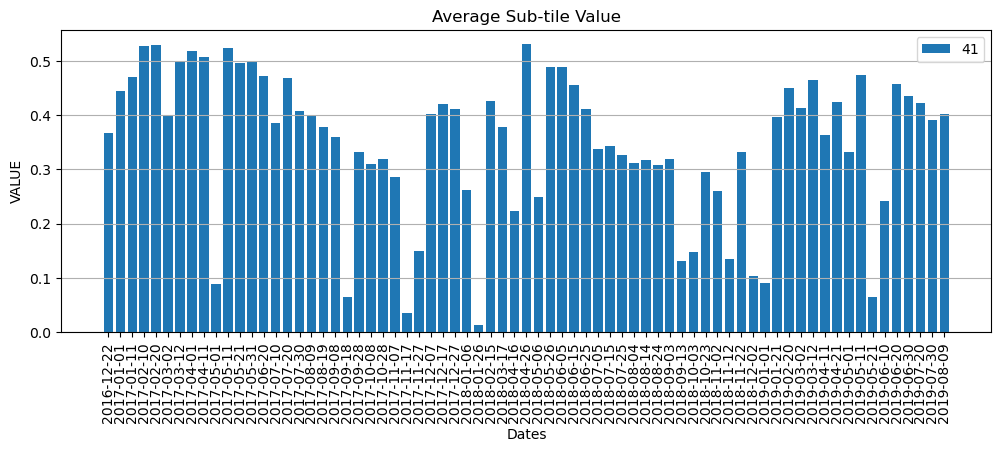

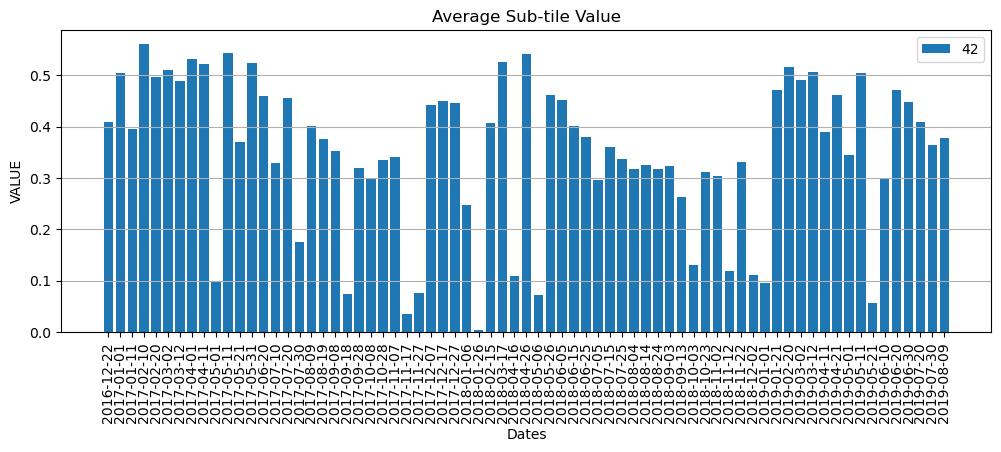

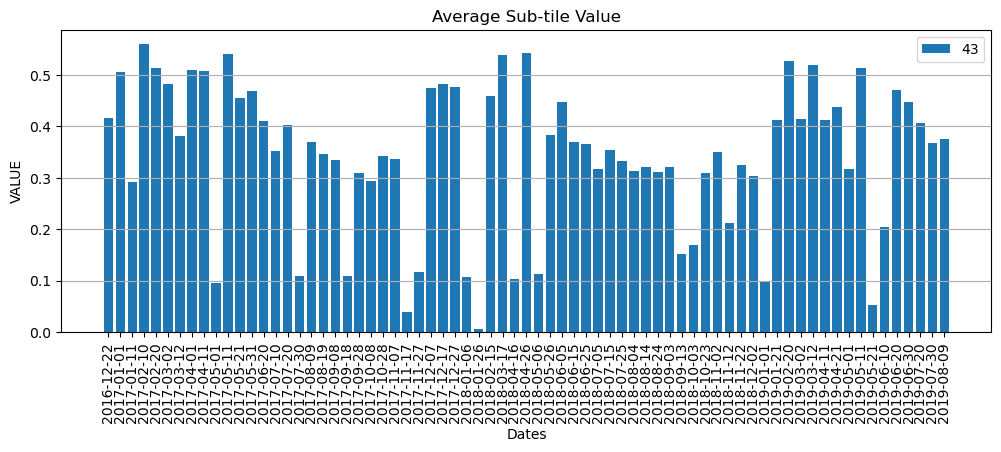

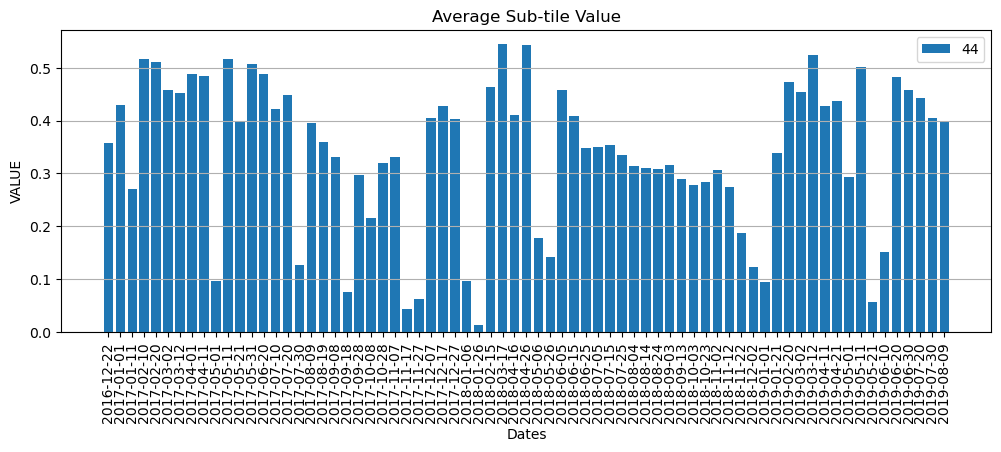

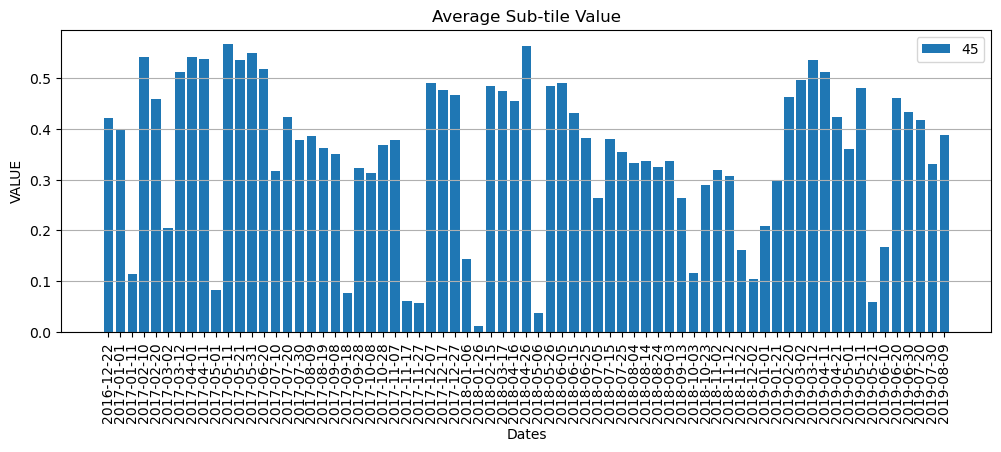

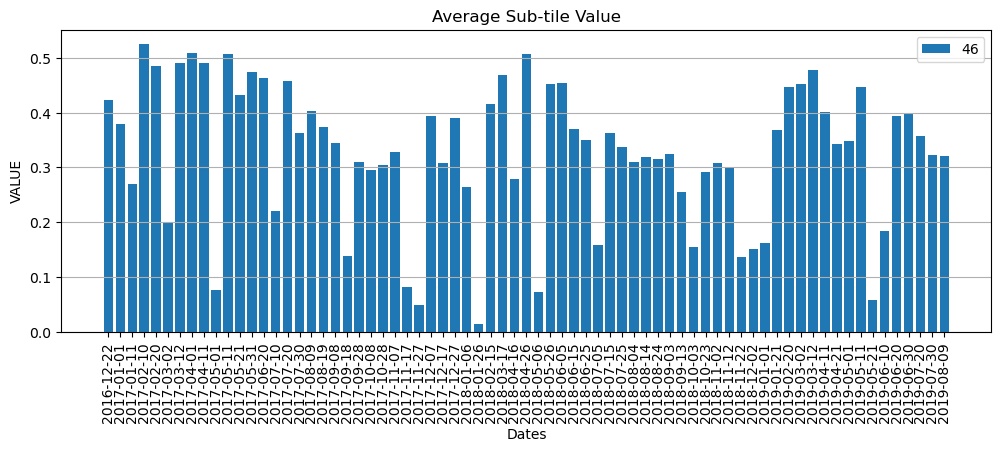

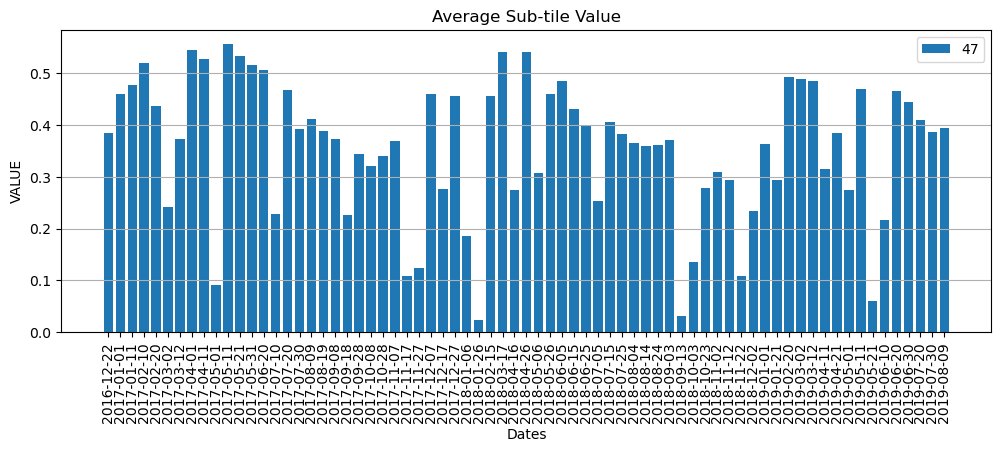

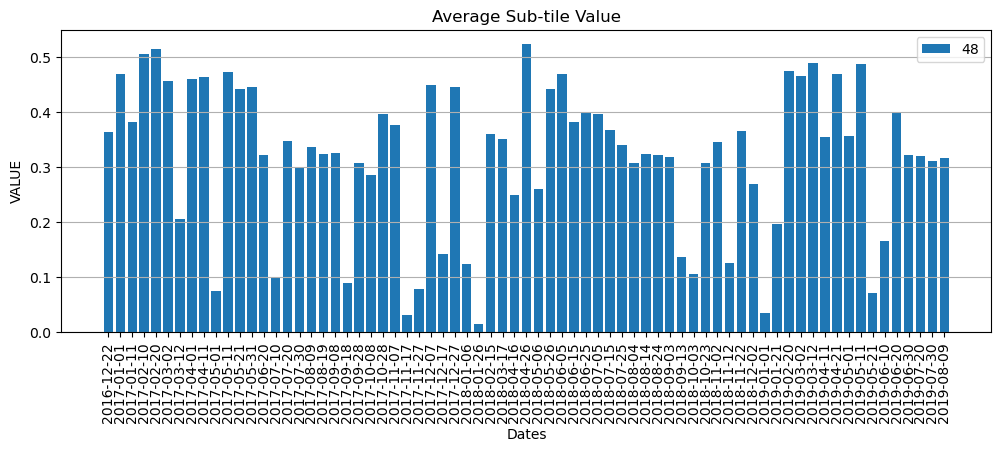

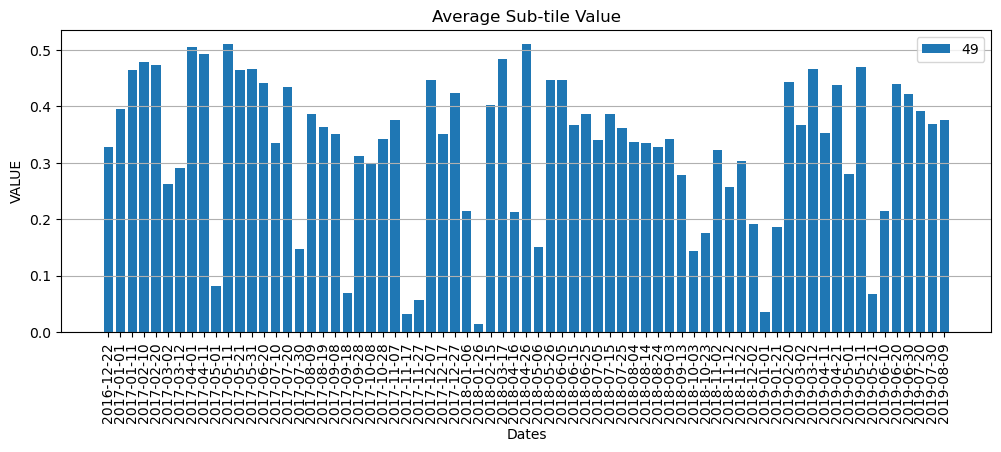

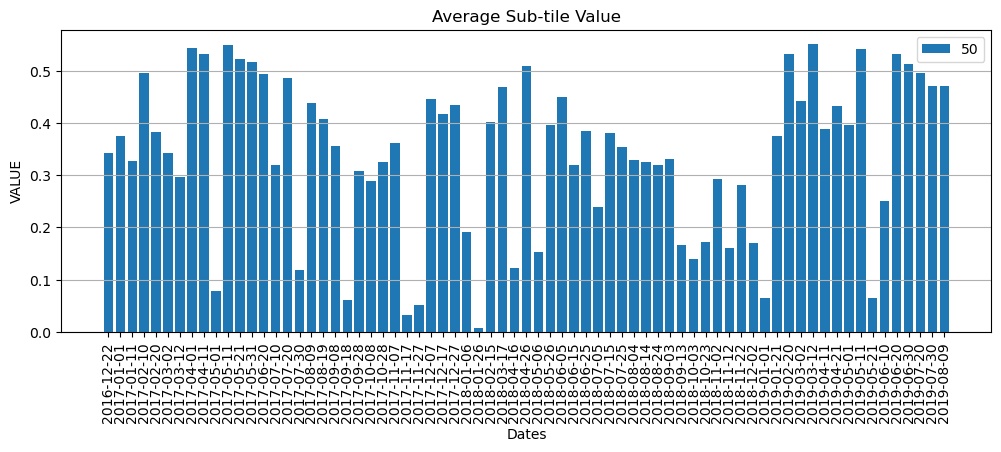

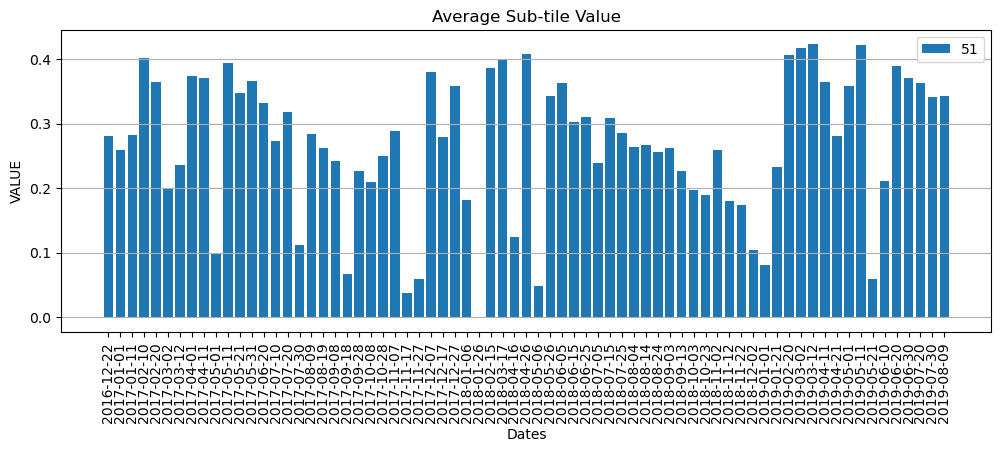

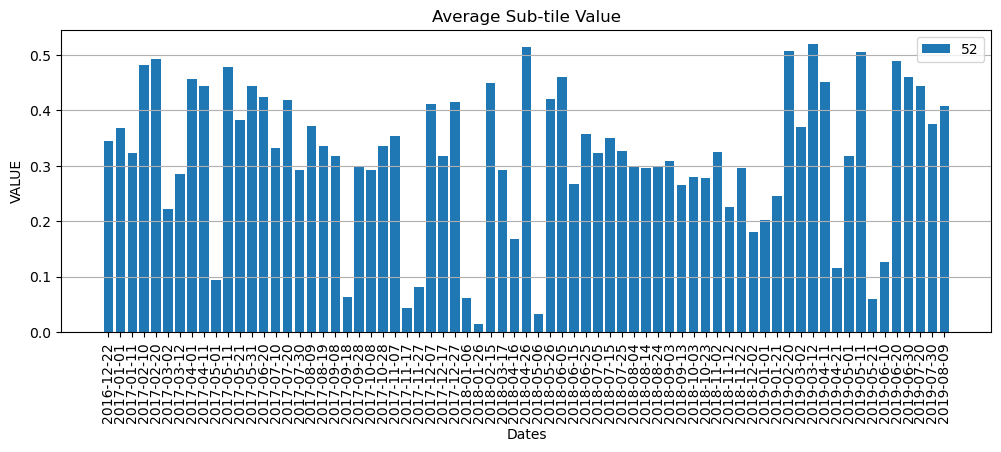

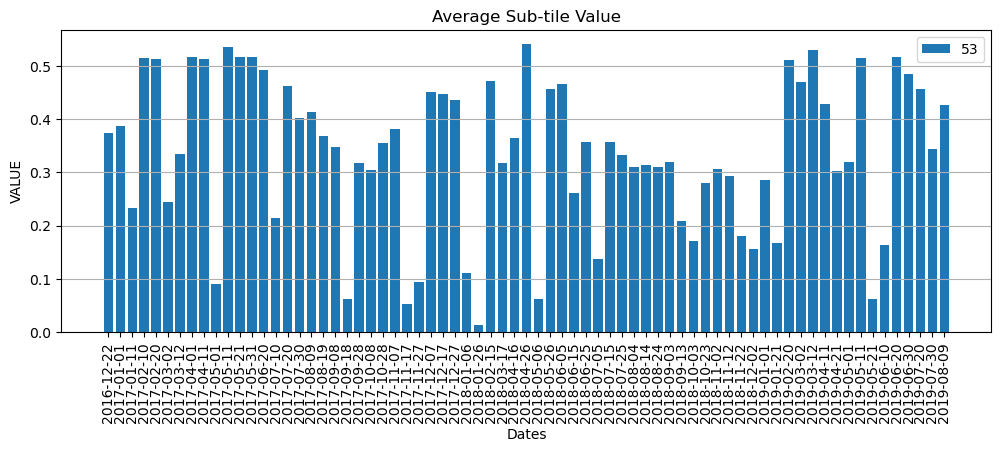

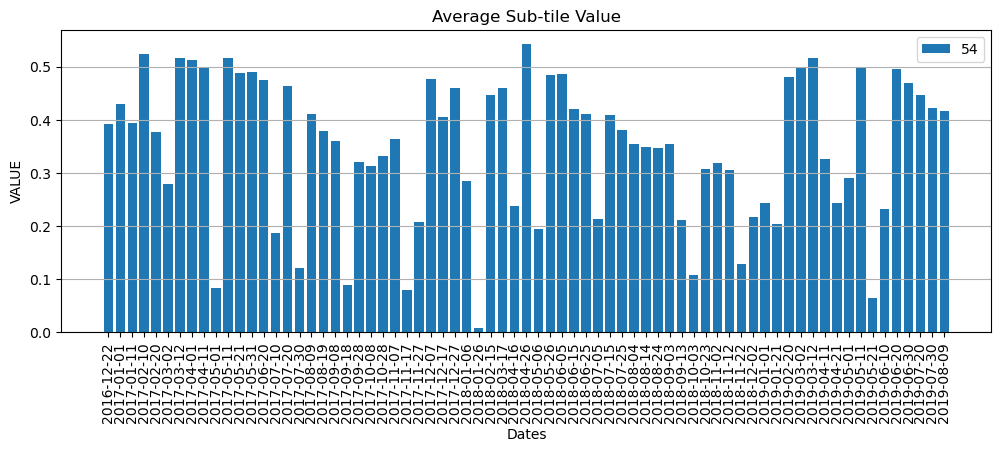

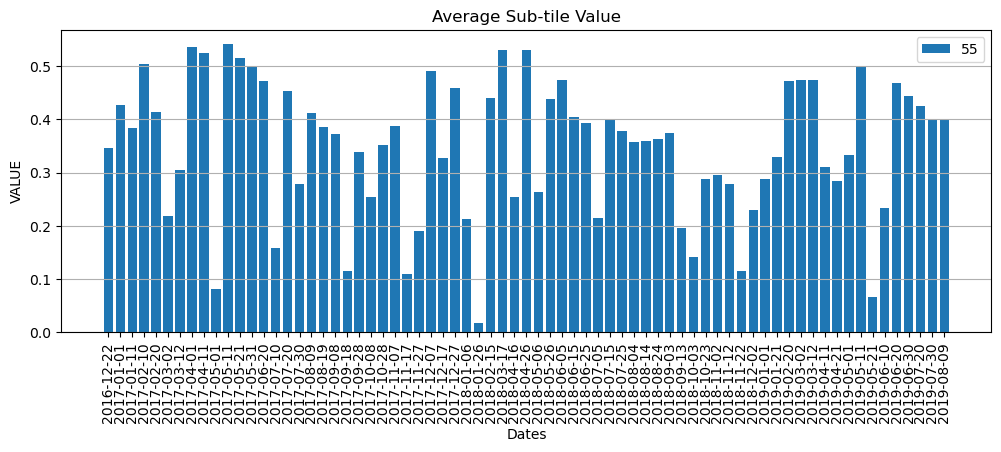

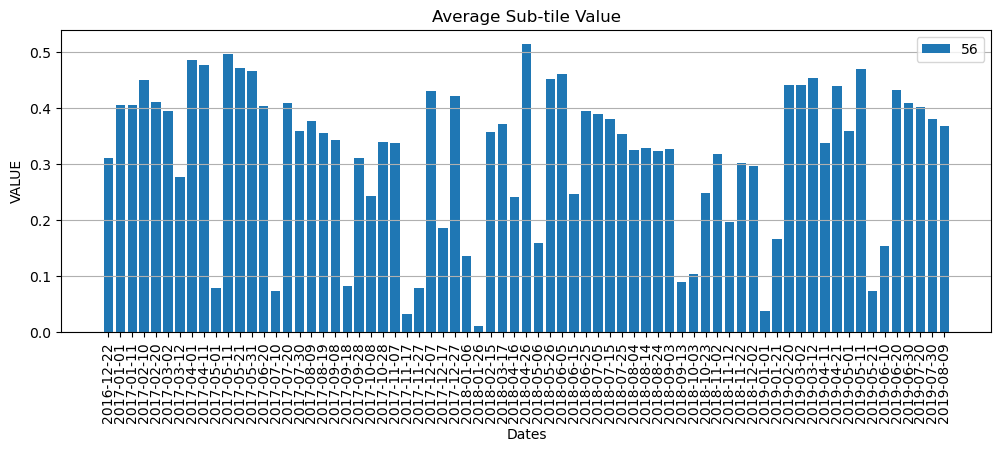

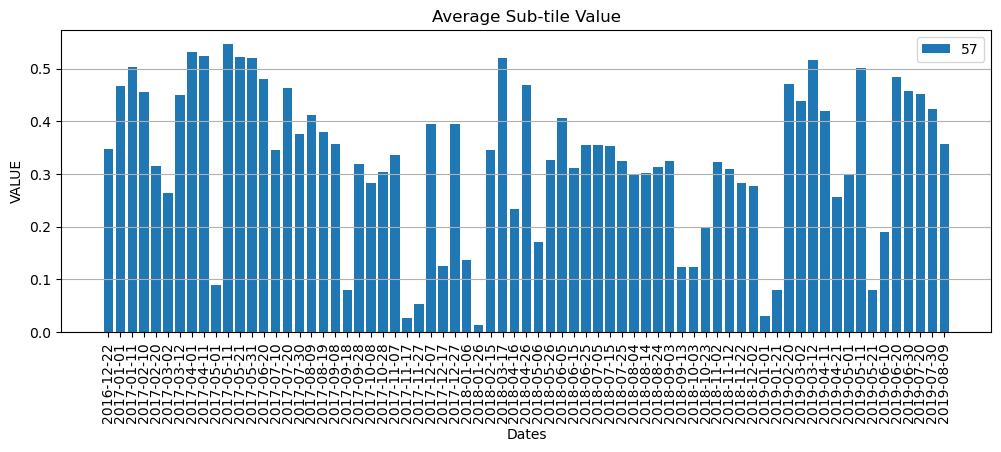

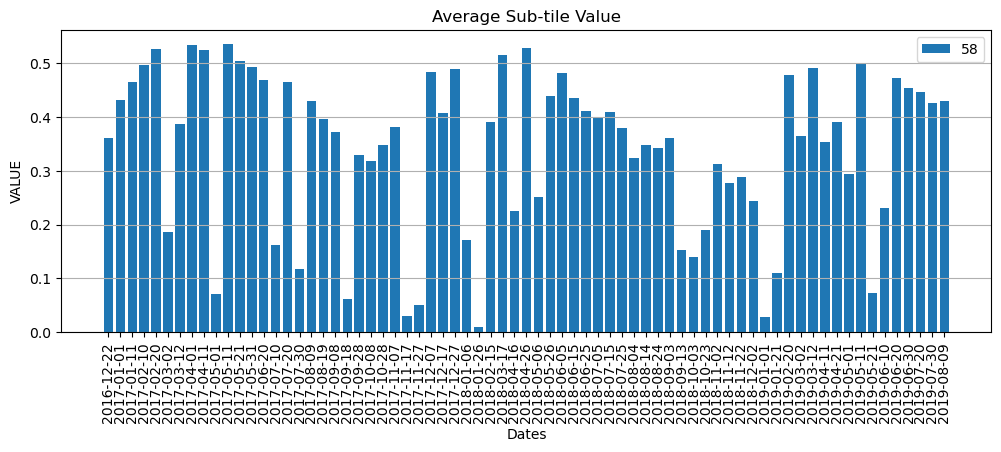

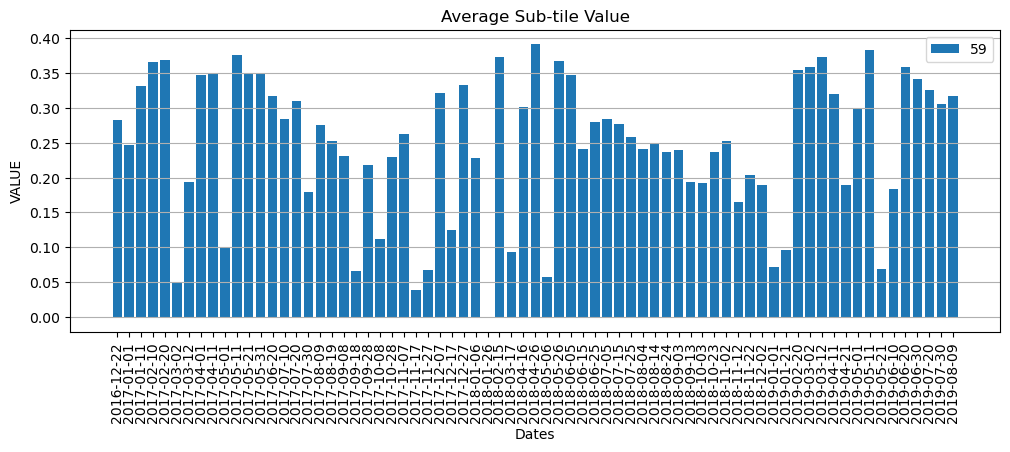

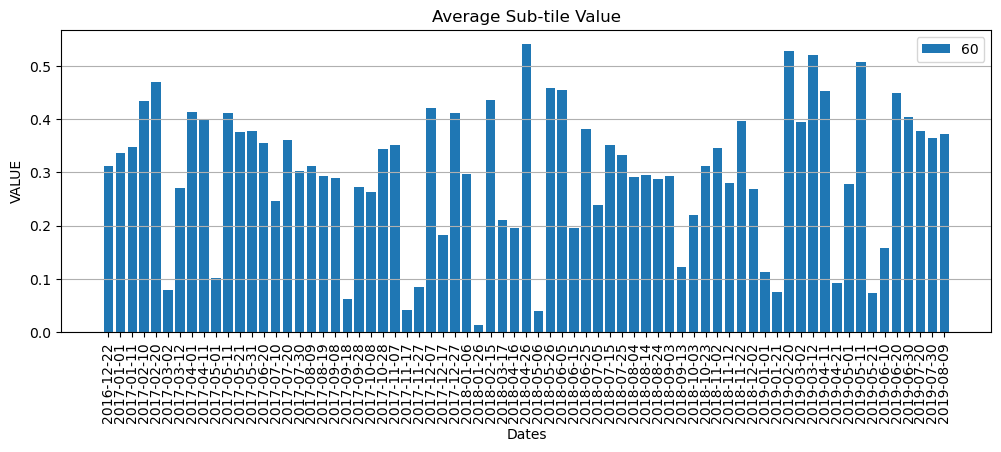

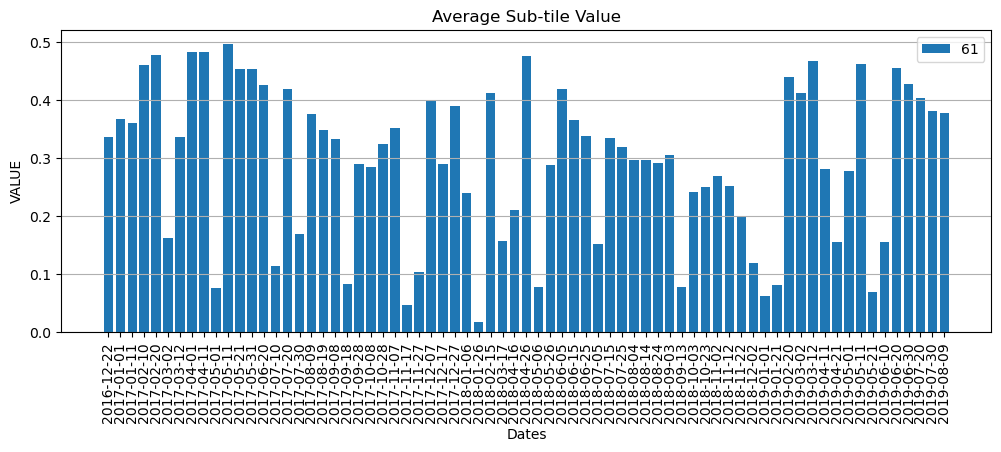

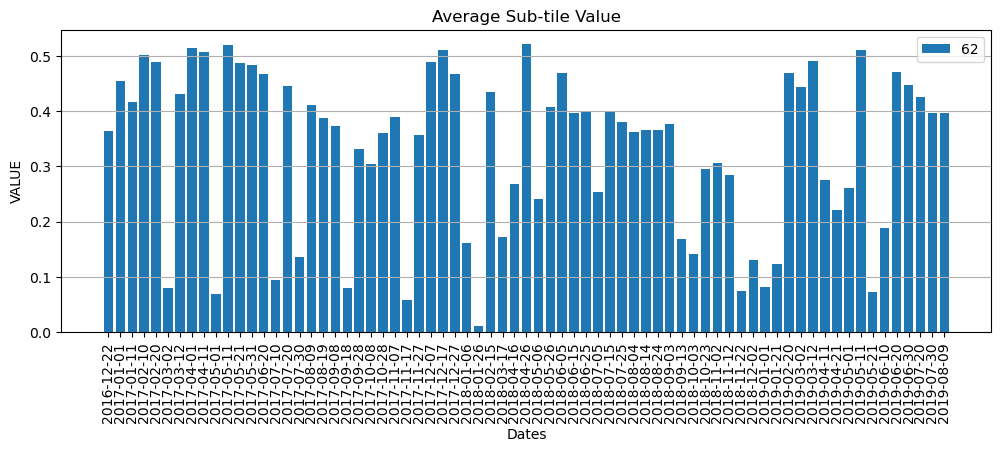

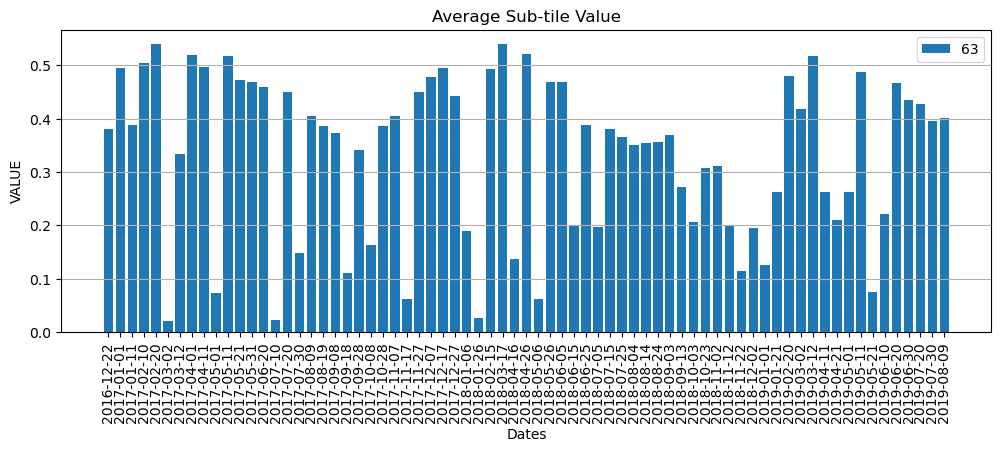

In [36]:
# ENVDIS
plot_field_average(gnvdis,4)

In [37]:
mask = np.ones((10,12))
mask[0,0] = 0
mask


array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [42]:
def get_partition(image, xStart, yStart, mask):
    result = [] 
    for y in range(0, len(mask)):
        for x in range(0, len(mask[0])):
            # check if the mask pixel is selected then add the img pixel to list
            if mask[y,x]==1:
                result.append(image[yStart+y, xStart+x])
    return np.array(result)

In [43]:
temp = get_wavelength('7680','10240',RED,'2016-12-22')
res = get_partition(temp, 0,0, mask)
print(len(res))

119


In [44]:
res

array([2724, 2464, 2438, 2396, 2340, 2356, 2334, 2402, 2516, 2608, 2598,
       2852, 2684, 2506, 2528, 2518, 2494, 2494, 2492, 2546, 2608, 2672,
       2662, 2848, 2608, 2546, 2562, 2578, 2560, 2548, 2578, 2618, 2654,
       2676, 2688, 2886, 2618, 2584, 2556, 2564, 2536, 2540, 2580, 2560,
       2610, 2634, 2650, 2872, 2620, 2562, 2524, 2552, 2554, 2592, 2642,
       2628, 2596, 2612, 2626, 2850, 2612, 2570, 2568, 2568, 2580, 2594,
       2566, 2620, 2634, 2612, 2616, 2770, 2622, 2570, 2582, 2610, 2564,
       2570, 2588, 2582, 2610, 2598, 2580, 2754, 2624, 2590, 2600, 2622,
       2564, 2520, 2548, 2574, 2578, 2588, 2596, 2810, 2620, 2628, 2588,
       2598, 2576, 2552, 2544, 2560, 2566, 2580, 2588, 2868, 2566, 2572,
       2588, 2592, 2602, 2574, 2522, 2546, 2590, 2606, 2618])

In [95]:


def get_avg_vegetation_index(vi, X, Y, xStart, yStart, mask):
    result = []
    avg = []
    upper = []
    lower = []
    for date in dates[0:12]:
        red = get_wavelength(X,Y,RED,date)
        blue = get_wavelength(X,Y,BLUE,date)
        green = get_wavelength(X,Y,GREEN,date)
        nir = get_wavelength(X,Y,NIR,date)
        
        if vi == 'NVDI':
            nvdi = calulcate_NVDI(nir, red)
            res = get_partition(nvdi, xStart, yStart, mask)
            average = np.average(res)
            sd = np.std(res)

            avg.append(average)
            upper.append(average+(2*sd))
            lower.append(average-(2*sd))
            result.append(res)
    dict = {}
    dict['result'] = result
    dict['avg'] = avg
    dict['upper'] = upper
    dict['lower'] = lower
    return dict

In [96]:
X = '7680'
Y = '10240'
xStart = 0
yStart = 0
mask = np.ones((20,20))

In [98]:
temp = get_avg_vegetation_index('NVDI', X, Y, xStart, yStart, mask)

In [68]:
temp

{'result': [array([0.27832898, 0.27726187, 0.30277306, 0.29517202, 0.26946721,
         0.28579031, 0.29784253, 0.29738744, 0.27880476, 0.30379071,
         0.2906102 , 0.29167819, 0.28793486, 0.3130412 , 0.29782609,
         0.29216284]),
  array([0.44667303, 0.45631699, 0.49364614, 0.49682593, 0.42558063,
         0.42153846, 0.46085165, 0.48445336, 0.43874059, 0.42867307,
         0.43633763, 0.43573668, 0.43878583, 0.45036573, 0.42618789,
         0.41580265]),
  array([0.37711578, 0.37969402, 0.39844303, 0.42739726, 0.38778312,
         0.3598862 , 0.36213103, 0.38600139, 0.38408304, 0.35021708,
         0.34844193, 0.34578147, 0.37360473, 0.35232801, 0.36490251,
         0.35      ]),
  array([0.06734496, 0.06958153, 0.05866711, 0.04030519, 0.067113  ,
         0.06780646, 0.04577992, 0.03286771, 0.05238533, 0.0552696 ,
         0.04080613, 0.03444906, 0.05432015, 0.06559066, 0.06289202,
         0.05252791]),
  array([0.34175824, 0.41244573, 0.51084128, 0.52255489, 0.32511556,
 

In [99]:
xlabels = [] 
result = []
xlabel2 = []
for i in range(0, len(temp['result'])):
    xlabel2.append(i)
    for res in temp['result'][i]:
        result.append(res)
        xlabels.append(i)

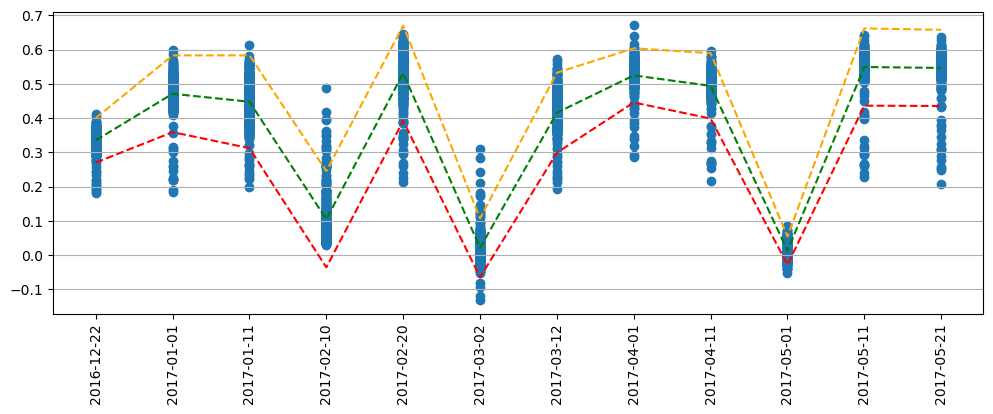

In [105]:
plt.figure(figsize=(12,4), dpi=100)

plt.scatter(xlabels, result, marker='o')

plt.xticks(xlabel2, dates[0:12])
plt.xticks(rotation=90)

# plt.title('Average Sub-tile Value')
plt.grid(axis='y')
plt.yticks(np.arange(-0.5, 1.5, step=0.1))
# plt.xlabel('Dates')
# plt.ylabel('VALUE')
plt.plot(xlabel2,temp['avg'], color='green', linestyle='dashed', label='Average')
plt.plot(xlabel2,temp['upper'], color='orange', linestyle='dashed', label='Upper')
plt.plot(xlabel2,temp['lower'], color='red', linestyle='dashed', label='Lower')
plt.show()